<a href="https://colab.research.google.com/github/gabipalacios/Python/blob/main/Arbol_20250620_Plat_Normalizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
import numpy as np
import pandas as pd
import datetime as dt
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
from google.colab import drive
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/PlataformaNorm/pa_otorgados.csv')
Financial = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/PlataformaNorm/dwh_vales.csv')
Origen = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/bbdd_sinpagos3.csv')
Marco = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/bbdd_PreMarcoBCU3.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
print(df.shape)
print(Financial.shape)
print(Origen.shape)
print(Marco.shape)

(3815, 112)
(7629, 37)
(2746, 34)
(2445, 20)


In [306]:
Financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               7629 non-null   int64  
 1   fecha_creacion                   7629 non-null   object 
 2   ult_fecha_update                 7629 non-null   object 
 3   monto_total                      7629 non-null   float64
 4   plazo                            7629 non-null   int64  
 5   cuota                            7629 non-null   float64
 6   tea                              7629 non-null   float64
 7   fecha_emision                    7629 non-null   object 
 8   fecha_primer_vto                 7629 non-null   object 
 9   fecha_ult_vto                    7629 non-null   object 
 10  solicitud                        7629 non-null   int64  
 11  tipo_desembolso                  7629 non-null   object 
 12  evaluacion_id       

In [307]:
Financial.head()

,id,fecha_creacion,ult_fecha_update,monto_total,plazo,cuota,tea,fecha_emision,fecha_primer_vto,fecha_ult_vto,solicitud,tipo_desembolso,evaluacion_id,monto_cancelacion,monto_cancelacion_fecha_calculo,saldo,dias_atraso_max,dias_atraso_hoy,cuotas_devengadas,fecha_ult_pago,meses_con_pagos,ingresos,estado,fecha_estado,tipo_de_vale,tipo_de_cancelacion,referencia_a_vale_anterior,indica_si_el_vale_fue_vendido,documento,nro_solic,monto,es_plataforma,dias_desde_primer_vto,mora,30@3,fpd,anio_mes_vale
0,60277,2025-06-11 08:58:38,2025-06-11 08:58:38,68316.00,12,5693.00,105.00,2024-01-02,2024-02-12,2025-01-11,60277,REDCOB,0,0.00,2025-06-11,0.00,353,0,12,2025-02-27,1,3506.17,P,2025-06-11,0,0,0,1,46658239,23480.00,41000.00,0,485,1.00,1.00,0.00,2024-01
1,60281,2025-06-11 08:58:38,2025-06-11 08:58:38,53136.00,24,2214.00,130.00,2024-01-02,2024-02-07,2026-01-07,60281,REDCOB,0,0.00,2025-06-11,0.00,189,0,17,2024-11-12,5,10282.34,P,2025-06-11,0,1,0,0,10950471,23483.00,20000.00,0,490,1.00,1.00,0.00,2024-01
2,60283,2025-06-11 08:58:38,2025-06-11 08:58:38,66864.00,21,3184.00,105.00,2024-01-02,2024-02-15,2025-10-15,60283,REDCOB,0,0.00,2025-06-11,0.00,318,0,16,2025-02-27,2,4582.49,P,2025-06-11,0,0,0,1,53580455,23484.00,30000.00,0,482,1.00,1.00,0.00,2024-01
3,60284,2025-06-11 08:58:38,2025-06-11 08:58:38,93276.00,18,5182.00,90.00,2024-01-03,2024-02-15,2025-07-15,60284,REDCOB,0,0.00,2025-06-11,0.00,257,0,16,2025-02-27,4,11695.22,P,2025-06-11,0,0,0,1,26445002,23485.00,49000.00,0,482,1.00,1.00,0.00,2024-01
4,60285,2025-06-11 08:58:38,2025-06-11 08:58:38,49395.00,15,3293.00,90.00,2024-01-03,2024-02-15,2025-04-15,60285,REDCOB,0,0.00,2025-06-11,0.00,4,0,15,2024-10-19,9,12579.55,C,2025-06-11,0,2,0,0,17534602,23486.00,28000.00,0,482,0.00,0.00,0.00,2024-01


In [308]:
df.head()

,id_solicitud,id_usuario,cedula,fecha_ymd,canal,status,status_usuario,no_ofertable,no_of_desc,rpf_alert,fecha_nacimiento,edad,genero,estado_cliente,meses_con_pagos,dias_atraso_max,tiene_vale_activo,deuda_pa,utm_source,utm_medium,utm_campaign,utm_content,utm_term,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,dispositivo_modelo,sist_op_familia,localidad,departamento,cdr_periodo,cdr_peor_calificacion,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_fecha,clr_score,clr_accion,clr_explicacion,clr_detalle_consultas,clr_detalle_cancelaciones,clr_detalle_incumplimientos,clr_bp_fecha,clr_score_if,clr_bp_accion,clr_mayor_dias_atraso,clr_compromiso_bp_tc,clr_compromiso_bp_pr,clr_compromiso_bp_s,clr_apose_open_total,clr_apose_pri_act,clr_apose_peor_estado_total,clr_apose_cant_atraso,clr_apose_dif_open_close_u12m,clr_apose_deuda_vencida_ult_act,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,id_vale,fecha_vale,monto,plazo,cuota,tasa,fecha_primer_vto,fecha_ultimo_vto,cargo_originacion,iva_cargo_originacion,tiene_cargo_adm,tiene_seguro,tipo_vale,id_financial,fpd4,fpd30,valor_ui,anio_mes_sol
0,LRA-204-425-362,USR-439-784-662,49581253,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1992-04-01,31,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31122.58,15.00,1.49,5640.25,30800.00,13.00,LVA-951-908-924,2024-02-21 11:16:50.275704,20000.00,12.00,2895.00,1.05,2024-03-11,2025-02-11,234.94,51.69,1.00,1.00,primary,60556.00,0.00,0.00,5.87,2024-01
1,LRA-952-655-967,USR-443-826-356,41106087,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1975-10-13,48,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Primaria,emp_privado,Otros,28487.35,25500.00,531.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,0.00,107.66,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36713.02,21.00,1.65,9116.23,36800.00,13.00,LVA-578-509-642,2024-02-21 11:53:51.132514,25000.00,21.00,2709.00,1.05,2024-03-11,2025-11-11,234.94,51.69,1.00,1.00,primary,60746.00,1.00,1.00,5.87,2024-01
2,LRA-380-663-655,USR-635-210-917,43441742,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1982-09-17,41,masculino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Google,Apple,iPhone,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,nov-2023,2a,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26454.19,15.00,0.91,9648.25,26500.00,13.00,LVA-700-106-570,2024-02-21 11:13:14.149029,26500.00,12.00,3780.00,1.05,2024-03-08,2025-02-05,234.94,51.69,1.00,1.00,primary,60557.00,1.00,1.00,5.87,2024-01
3,LRA-460-603-964,USR-773-661-186,47988417,2024-01-22,WA,voucher_issued,id_verified,0,con_ofer

In [309]:
# Select the desired columns from Financial
Financial_selected = Financial[['id', 'mora', '30@3', 'fpd', 'documento']].copy()

# Add the 'F_' prefix to the selected columns
# Financial_selected = Financial_selected.add_prefix('F_') # This line is not needed anymore

# Merge df with the selected Financial columns on 'cedula' and 'F_documento'
df = pd.merge(df, Financial_selected, left_on='id_financial', right_on='id', how='inner')

# Drop the duplicate 'F_documento' column from Financial_selected after the merge
df = df.drop(columns=['id'], errors='ignore')

print(f"Shape of the DataFrame after merging with Financial: {df.shape}")
print("New columns added from Financial:")
print([col for col in df.columns if col.startswith('F_')])
print("\nFirst 5 rows of the updated DataFrame with Financial columns:")
display(df.head())

Shape of the DataFrame after merging with Financial: (3799, 116)
New columns added from Financial:
[]

First 5 rows of the updated DataFrame with Financial columns:


,id_solicitud,id_usuario,cedula,fecha_ymd,canal,status,status_usuario,no_ofertable,no_of_desc,rpf_alert,fecha_nacimiento,edad,genero,estado_cliente,meses_con_pagos,dias_atraso_max,tiene_vale_activo,deuda_pa,utm_source,utm_medium,utm_campaign,utm_content,utm_term,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,dispositivo_modelo,sist_op_familia,localidad,departamento,cdr_periodo,cdr_peor_calificacion,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_cant_inst_dda,cdr_porc_dda_1c,cdr_sum_deudas_1c_ui,cdr_peorcatbcu1m,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,clr_fecha,clr_score,clr_accion,clr_explicacion,clr_detalle_consultas,clr_detalle_cancelaciones,clr_detalle_incumplimientos,clr_bp_fecha,clr_score_if,clr_bp_accion,clr_mayor_dias_atraso,clr_compromiso_bp_tc,clr_compromiso_bp_pr,clr_compromiso_bp_s,clr_apose_open_total,clr_apose_pri_act,clr_apose_peor_estado_total,clr_apose_cant_atraso,clr_apose_dif_open_close_u12m,clr_apose_deuda_vencida_ult_act,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,id_vale,fecha_vale,monto,plazo,cuota,tasa,fecha_primer_vto,fecha_ultimo_vto,cargo_originacion,iva_cargo_originacion,tiene_cargo_adm,tiene_seguro,tipo_vale,id_financial,fpd4,fpd30,valor_ui,anio_mes_sol,mora,30@3,fpd,documento
0,LRA-204-425-362,USR-439-784-662,49581253,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1992-04-01,31,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31122.58,15.00,1.49,5640.25,30800.00,13.00,LVA-951-908-924,2024-02-21 11:16:50.275704,20000.00,12.00,2895.00,1.05,2024-03-11,2025-02-11,234.94,51.69,1.00,1.00,primary,60556.00,0.00,0.00,5.87,2024-01,1.00,1.00,0.00,49581253
1,LRA-952-655-967,USR-443-826-356,41106087,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1975-10-13,48,femenino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Primaria,emp_privado,Otros,28487.35,25500.00,531.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,0.00,0.00,0.00,107.66,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36713.02,21.00,1.65,9116.23,36800.00,13.00,LVA-578-509-642,2024-02-21 11:53:51.132514,25000.00,21.00,2709.00,1.05,2024-03-11,2025-11-11,234.94,51.69,1.00,1.00,primary,60746.00,1.00,1.00,5.87,2024-01,1.00,1.00,1.00,41106087
2,LRA-380-663-655,USR-635-210-917,43441742,2024-01-21,WA,voucher_issued,id_verified,0,con_oferta,NaN,1982-09-17,41,masculino,S,0,0,0,0.00,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Google,Apple,iPhone,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,nov-2023,2a,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26454.19,15.00,0.91,9648.25,26500.00,13.00,LVA-700-106-570,2024-02-21 11:13:14.149029,26500.00,12.00,3780.00,1.05,2024-03-08,2025-02-05,234.94,51.69,1.00,1.00,primary,60557.00,1.00,1.00,5.87,2024-01,1.00,1.00,1.00,4344174

In [310]:
# Identificar en df, variables con faltantes > 30%, mostrar los % de faltantes y crear una lista con el resultado

# Identify columns with missing values > 30%
missing_percent = df.isnull().sum() / len(df) * 100
variables_to_drop = missing_percent[missing_percent > 30].index.tolist()

# Display the percentage of missing values for these variables
print("\nVariables with missing values > 30%:")
print(missing_percent[variables_to_drop].sort_values(ascending=False))

# Create a list with the identified variables
print("\nList of variables with missing values > 30%:")
variables_to_drop


Variables with missing values > 30%:
clr_mayor_dias_atraso             95.03
clr_apose_peor_estado_total       94.74
clr_apose_open_total              92.34
clr_compromiso_bp_pr              92.34
clr_apose_cant_atraso             92.34
clr_compromiso_bp_s               92.34
clr_compromiso_bp_tc              92.34
clr_apose_pri_act                 92.34
clr_apose_dif_open_close_u12m     92.34
clr_apose_deuda_vencida_ult_act   92.34
clr_bp_fecha                      92.26
clr_bp_accion                     92.26
clr_score_if                      92.26
cdr_cant_inst_dda                 58.30
cdr_porc_dda_1c                   58.30
cdr_sum_deudas_1c_ui              58.30
clr_detalle_consultas             48.96
clr_explicacion                   48.96
clr_accion                        48.07
clr_fecha                         48.07
clr_score                         48.07
clr_detalle_cancelaciones         48.07
clr_detalle_incumplimientos       48.07
mora                              36.43
30

['cdr_cant_inst_dda',
 'cdr_porc_dda_1c',
 'cdr_sum_deudas_1c_ui',
 'clr_fecha',
 'clr_score',
 'clr_accion',
 'clr_explicacion',
 'clr_detalle_consultas',
 'clr_detalle_cancelaciones',
 'clr_detalle_incumplimientos',
 'clr_bp_fecha',
 'clr_score_if',
 'clr_bp_accion',
 'clr_mayor_dias_atraso',
 'clr_compromiso_bp_tc',
 'clr_compromiso_bp_pr',
 'clr_compromiso_bp_s',
 'clr_apose_open_total',
 'clr_apose_pri_act',
 'clr_apose_peor_estado_total',
 'clr_apose_cant_atraso',
 'clr_apose_dif_open_close_u12m',
 'clr_apose_deuda_vencida_ult_act',
 'mora',
 '30@3']

In [311]:
columns_to_drop = ['cdr_cant_inst_dda',
 'cdr_porc_dda_1c',
 'cdr_sum_deudas_1c_ui',
 'clr_fecha',
 'clr_score',
 'clr_accion',
 'clr_explicacion',
 'clr_detalle_consultas',
 'clr_detalle_cancelaciones',
 'clr_detalle_incumplimientos',
 'clr_bp_fecha',
 'clr_score_if',
 'clr_bp_accion',
 'clr_mayor_dias_atraso',
 'clr_compromiso_bp_tc',
 'clr_compromiso_bp_pr',
 'clr_compromiso_bp_s',
 'clr_apose_open_total',
 'clr_apose_pri_act',
 'clr_apose_peor_estado_total',
 'clr_apose_cant_atraso',
 'clr_apose_dif_open_close_u12m',
 'clr_apose_deuda_vencida_ult_act',
  'fpd30',
                   'tea',
                   'M_Sin_Ficha'] # Remove 'fpd' from this list

# Drop the selected columns
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents errors if a column doesn't exist

print(f"Shape of the DataFrame after dropping columns: {df.shape}")
print(df.columns)

Shape of the DataFrame after dropping columns: (3799, 92)
Index(['id_solicitud', 'id_usuario', 'cedula', 'fecha_ymd', 'canal', 'status',
       'status_usuario', 'no_ofertable', 'no_of_desc', 'rpf_alert',
       'fecha_nacimiento', 'edad', 'genero', 'estado_cliente',
       'meses_con_pagos', 'dias_atraso_max', 'tiene_vale_activo', 'deuda_pa',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_content', 'utm_term',
       'nivel_educativo', 'relacion_laboral', 'cargo', 'ingreso_estimado',
       'ingreso_declarado', 'scoring', 'tiene_tel_fijo', 'cel_carrier',
       'email_dominio', 'navegador_familia', 'dispositivo_marca',
       'dispositivo_familia', 'dispositivo_modelo', 'sist_op_familia',
       'localidad', 'departamento', 'cdr_periodo', 'cdr_peor_calificacion',
       'cdr_tiene_quita', 'cdr_tiene_garantia', 'cdr_max_contingencia_ui',
       'cdr_sum_deudas_ui', 'cdr_tiene_brou', 'cdr_tiene_banco_privado',
       'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_peorcatbcu1m',


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 92 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_solicitud             3799 non-null   object 
 1   id_usuario               3799 non-null   object 
 2   cedula                   3799 non-null   int64  
 3   fecha_ymd                3799 non-null   object 
 4   canal                    3799 non-null   object 
 5   status                   3799 non-null   object 
 6   status_usuario           3799 non-null   object 
 7   no_ofertable             3799 non-null   int64  
 8   no_of_desc               3799 non-null   object 
 9   rpf_alert                2781 non-null   float64
 10  fecha_nacimiento         3799 non-null   object 
 11  edad                     3799 non-null   int64  
 12  genero                   3799 non-null   object 
 13  estado_cliente           3799 non-null   object 
 14  meses_con_pagos         

In [313]:
# Get a list of all columns in the DataFrame
all_columns = df.columns

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Create a subset DataFrame with only non-numeric columns
df_non_numeric = df[non_numeric_columns]

# Print the shape of the non-numeric subset
print(f"Shape of the non-numeric subset DataFrame: {df_non_numeric.shape}")

# Display the first few rows of the non-numeric subset
print("\nFirst 5 rows of the non-numeric subset:")
display(df_non_numeric.head())

# Print the list of non-numeric column names
print("\nNames of the non-numeric columns:")
non_numeric_columns

Shape of the non-numeric subset DataFrame: (3799, 36)

First 5 rows of the non-numeric subset:


,id_solicitud,id_usuario,fecha_ymd,canal,status,status_usuario,no_of_desc,fecha_nacimiento,genero,estado_cliente,utm_source,utm_medium,utm_campaign,utm_content,utm_term,nivel_educativo,relacion_laboral,cargo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,dispositivo_modelo,sist_op_familia,localidad,departamento,cdr_periodo,cdr_peor_calificacion,cdr_peorcatbcu1m,id_vale,fecha_vale,fecha_primer_vto,fecha_ultimo_vto,tipo_vale,anio_mes_sol
0,LRA-204-425-362,USR-439-784-662,2024-01-21,WA,voucher_issued,id_verified,con_oferta,1992-04-01,femenino,S,SD,SD,SD,SD,SD,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,NaN,LVA-951-908-924,2024-02-21 11:16:50.275704,2024-03-11,2025-02-11,primary,2024-01
1,LRA-952-655-967,USR-443-826-356,2024-01-21,WA,voucher_issued,id_verified,con_oferta,1975-10-13,femenino,S,SD,SD,SD,SD,SD,Primaria,emp_privado,Otros,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,NaN,LVA-578-509-642,2024-02-21 11:53:51.132514,2024-03-11,2025-11-11,primary,2024-01
2,LRA-380-663-655,USR-635-210-917,2024-01-21,WA,voucher_issued,id_verified,con_oferta,1982-09-17,masculino,S,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,ANTEL,gmail.com,Google,Apple,iPhone,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,nov-2023,2a,NaN,LVA-700-106-570,2024-02-21 11:13:14.149029,2024-03-08,2025-02-05,primary,2024-01
3,LRA-460-603-964,USR-773-661-186,2024-01-22,WA,voucher_issued,id_verified,con_oferta,1998-04-12,femenino,S,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,ANTEL,gmail.com,Chrome Mobile,Generic_Android,K,K,Android,CARMELO,COLONIA,nov-2023,1c,NaN,LVA-713-477-556,2024-02-20 19:42:08.909857,2024-03-11,2025-08-11,primary,2024-01
4,LRA-675-270-933,USR-566-598-437,2024-01-22,WA,voucher_issued,id_verified,con_oferta,1984-10-07,femenino,S,SD,SD,SD,SD,SD,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,MOVISTAR,gmail.com,Chrome Mobile,Motorola,Motorola e13 Build/TLAS33.105-257-3,e13 Build/TLAS33.105-257-3,Android,MONTEVIDEO,MONTEVIDEO,nov-2023,1c,NaN,LVA-374-790-520,2024-02-21 12:04:52.320524,2024-03-06,2025-11-06,primary,2024-01



Names of the non-numeric columns:


['id_solicitud',
 'id_usuario',
 'fecha_ymd',
 'canal',
 'status',
 'status_usuario',
 'no_of_desc',
 'fecha_nacimiento',
 'genero',
 'estado_cliente',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_content',
 'utm_term',
 'nivel_educativo',
 'relacion_laboral',
 'cargo',
 'cel_carrier',
 'email_dominio',
 'navegador_familia',
 'dispositivo_marca',
 'dispositivo_familia',
 'dispositivo_modelo',
 'sist_op_familia',
 'localidad',
 'departamento',
 'cdr_periodo',
 'cdr_peor_calificacion',
 'cdr_peorcatbcu1m',
 'id_vale',
 'fecha_vale',
 'fecha_primer_vto',
 'fecha_ultimo_vto',
 'tipo_vale',
 'anio_mes_sol']

In [314]:
#Quitamos variables nominales que no suman al análisis
columns_to_drop = ['id_solicitud',
 'id_usuario',
  'status',
 'status_usuario',
 'no_of_desc',
 'fecha_nacimiento',
  'utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_content',
 'utm_term',
  'cdr_periodo',
 'cdr_peor_calificacion',
 'cdr_peorcatbcu1m',
 'id_vale',
 'fecha_vale',
 'fecha_primer_vto',
 'fecha_ultimo_vto',
 'tipo_vale',
 'anio_mes_sol']

# Drop the selected columns
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents errors if a column doesn't exist

print(f"Shape of the DataFrame after dropping columns: {df.shape}")
print(df.columns)

Shape of the DataFrame after dropping columns: (3799, 72)
Index(['cedula', 'fecha_ymd', 'canal', 'no_ofertable', 'rpf_alert', 'edad',
       'genero', 'estado_cliente', 'meses_con_pagos', 'dias_atraso_max',
       'tiene_vale_activo', 'deuda_pa', 'nivel_educativo', 'relacion_laboral',
       'cargo', 'ingreso_estimado', 'ingreso_declarado', 'scoring',
       'tiene_tel_fijo', 'cel_carrier', 'email_dominio', 'navegador_familia',
       'dispositivo_marca', 'dispositivo_familia', 'dispositivo_modelo',
       'sist_op_familia', 'localidad', 'departamento', 'cdr_tiene_quita',
       'cdr_tiene_garantia', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui',
       'cdr_tiene_brou', 'cdr_tiene_banco_privado', 'cdr_tiene_oca',
       'cdr_tiene_financiera', 'cdr_ult_3m_1c', 'cdr_ult_3m_no_info',
       'cdr_ult_3m_malo', 'cdr_ult_3m_irregular', 'cdr_ult_6m_1c',
       'cdr_ult_6m_no_info', 'cdr_ult_6m_malo', 'cdr_ult_6m_irregular',
       'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_ult_12m_no_inf

In [315]:
df.describe()

,cedula,no_ofertable,rpf_alert,edad,meses_con_pagos,dias_atraso_max,tiene_vale_activo,deuda_pa,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,monto_hasta,plazo_hasta,exposicion_maxima,cuota_maxima,monto_maximo,mejor_esquema_pricing,monto,plazo,cuota,tasa,cargo_originacion,iva_cargo_originacion,tiene_cargo_adm,tiene_seguro,id_financial,fpd4,valor_ui,mora,30@3,fpd,documento
count,3799.00,3799.00,2781.00,3799.00,3799.00,3799.00,3799.00,3799.00,3796.00,3796.00,3796.00,3796.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3270.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3799.00,3182.00,3799.00,2415.00,2415.00,2732.00,3799.00
mean,40051986.98,0.00,0.04,43.29,0.34,0.00,0.01,142.50,31344.84,39134.31,511.86,0.11,0.00,0.00,4734.18,24445.61,0.38,0.61,0.27,0.64,2.63,0.16,0.02,0.19,5.13,0.27,0.10,0.38,2.64,10.05,0.86,0.36,0.73,3.85,5.00,62885.54,20.02,1.45,7467.87,38093.08,7.17,31693.29,15.36,3524.69,0.89,137.61,30.27,1.00,0.27,65789.50,0.35,6.19,0.47,0.54,0.26,40051986.98
std,10949331.45,0.00,0.19,12.81,2.62,0.00,0.08,2972.87,17223.37,30790.81,99.55,0.31,0.00,0.00,7461.86,28710.80,0.48,0.49,0.44,0.48,0.65,0.40,0.21,0.53,1.34,0.78,0.56,0.95,3.95,2.84,2.04,1.56,1.71,4.31,2.14,25130.42,2.36,0.40,4419.79,21924.90,1.68,18455.95,4.87,1761.22,0.22,121.61,26.75,0.04,0.45,2456.70,0.48,0.12,0.50,0.50,0.44,10949331.45
min,9284774.00,0.00,0.00,18.00,0.00,0.00,0.00,0.00,7175.00,20.00,284.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,-1.00,1.00,15185.53,15.00,0.52,727.42,6600.00,2.00,5000.00,6.00,777.00,0.32,0.00,0.00,0.00,0.00,60552.00,0.00,5.87,0.00,0.00,0.00,9284774.00
25%,33634508.50,0.00,0.00,32.00,0.00,0.00,0.00,0.00,19567.09,25000.00,429.00,0.00,0.00,0.00,82.92,4428.02,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.04,10.00,0.00,0.00,0.00,0.22,4.00,44001.26,19.00,1.19,4629.82,22600.00,6.00,19600.00,12.00,2335.00,0.68,0.00,0.00,1.00,0.00,64050.50,0.00,6.11,0.00,0.00,0.00,33634508.50
50%,42927551.00,0.00,0.00,42.00,0.00,0.00,0.00,0.00,25788.95,32000.00,508.00,0.00,0.00,0.00,1599.91,14353.57,0.00,1.00,0.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.47,11.00,0.00,0.00,0.00,1.32,5.00,60516.20,19.00,1.50,6269.94,32000.00,7.00,26800.00,15.00,3131.00,0.90,239.74,52.74,1.00,0.00,66048.00,0.00,6.18,0.00,1.00,0.00,42927551.00
75%,48460029.00,0.00,0.00,53.00,0.00,0.00,0.00,0.00,37824.95,45000.00,587.00,0.00,0.00,0.00,6318.17,34001.10,1.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,3.39,12.00,0.00,0.00,1.00,10.00,7.00,76450.00,20.00,1.65,9035.06,47600.00,9.00,40000.00,19.00,4262.00,1.05,246.02,54.12,1.00,1.00,67978.50,1.00,6.32,1.00,1.00,1.00,48460029.00
max,59910674.00,0.00,1.00,82.00,49.00,0.00,1.00,159276.00,143284.07,560000.00,795.00,1.00,0.00,0.00,62091.34,243862.94,1.00,1.00,1.00,1.00,3.00,3.00,3.00,3.00,6.00,6.00,6.00,6.00,10.00,12.00,12.00,12.00,12.00,10.00,10.00,199615.36,29.00,4.59,36316.84,199700.00,14.00,190900.00,28.00,21856.00,1.44,251.74,55.38,1.00,1.00,69397.00,1.00,6.36,1.00,1.00,1.00,59910674.00


In [316]:
# prompt: LIstar variables numéricas de df

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Print the list of numeric column names
print("\nNames of the numeric columns:")
numeric_columns


Names of the numeric columns:


['cedula',
 'no_ofertable',
 'rpf_alert',
 'edad',
 'meses_con_pagos',
 'dias_atraso_max',
 'tiene_vale_activo',
 'deuda_pa',
 'ingreso_estimado',
 'ingreso_declarado',
 'scoring',
 'tiene_tel_fijo',
 'cdr_tiene_quita',
 'cdr_tiene_garantia',
 'cdr_max_contingencia_ui',
 'cdr_sum_deudas_ui',
 'cdr_tiene_brou',
 'cdr_tiene_banco_privado',
 'cdr_tiene_oca',
 'cdr_tiene_financiera',
 'cdr_ult_3m_1c',
 'cdr_ult_3m_no_info',
 'cdr_ult_3m_malo',
 'cdr_ult_3m_irregular',
 'cdr_ult_6m_1c',
 'cdr_ult_6m_no_info',
 'cdr_ult_6m_malo',
 'cdr_ult_6m_irregular',
 'cdr_var_dda_ult_6m',
 'cdr_ult_12m_1c',
 'cdr_ult_12m_no_info',
 'cdr_ult_12m_malo',
 'cdr_ult_12m_irregular',
 'cdr_var_dda_ult_12m',
 'cdr_segmento',
 'monto_hasta',
 'plazo_hasta',
 'exposicion_maxima',
 'cuota_maxima',
 'monto_maximo',
 'mejor_esquema_pricing',
 'monto',
 'plazo',
 'cuota',
 'tasa',
 'cargo_originacion',
 'iva_cargo_originacion',
 'tiene_cargo_adm',
 'tiene_seguro',
 'id_financial',
 'fpd4',
 'valor_ui',
 'mora',
 '30@

In [317]:
#Quitamos variables numéricas que no suman al análisis
#Quitamos campos que no suman al análisis
columns_to_drop = [
'rpf_alert',
'meses_con_pagos',
 'dias_atraso_max',
 'tiene_vale_activo',
 'deuda_pa',
 'monto_hasta',
 'plazo_hasta',
 'cuota_maxima',
 'monto_maximo',
 'monto',
 'plazo',
 'cuota',
 'cargo_originacion',
 'iva_cargo_originacion',
 'tiene_cargo_adm',
 'tiene_seguro',
 'id_financial',
 'dispositivo_modelo'#mucha variabilidad de modelos

 ]

# Drop the selected columns
df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents errors if a column doesn't exist

print(f"Shape of the DataFrame after dropping columns: {df.shape}")
print(df.columns)

Shape of the DataFrame after dropping columns: (3799, 54)
Index(['cedula', 'fecha_ymd', 'canal', 'no_ofertable', 'edad', 'genero',
       'estado_cliente', 'nivel_educativo', 'relacion_laboral', 'cargo',
       'ingreso_estimado', 'ingreso_declarado', 'scoring', 'tiene_tel_fijo',
       'cel_carrier', 'email_dominio', 'navegador_familia',
       'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia',
       'localidad', 'departamento', 'cdr_tiene_quita', 'cdr_tiene_garantia',
       'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_tiene_brou',
       'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera',
       'cdr_ult_3m_1c', 'cdr_ult_3m_no_info', 'cdr_ult_3m_malo',
       'cdr_ult_3m_irregular', 'cdr_ult_6m_1c', 'cdr_ult_6m_no_info',
       'cdr_ult_6m_malo', 'cdr_ult_6m_irregular', 'cdr_var_dda_ult_6m',
       'cdr_ult_12m_1c', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo',
       'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m', 'cdr_segmento',
       'exposicion

In [318]:
df.shape

(3799, 54)

In [319]:
#df.to_excel('/content/drive/MyDrive/df_exported_excelA.xlsx')
#print("DataFrame exported successfully to df_exported_excel.xlsx in your Google Drive.")

In [320]:
df.head()

,cedula,fecha_ymd,canal,no_ofertable,edad,genero,estado_cliente,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,localidad,departamento,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,tasa,fpd4,valor_ui,mora,30@3,fpd,documento
0,49581253,2024-01-21,WA,0,31,femenino,S,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,49581253
1,41106087,2024-01-21,WA,0,48,femenino,S,Primaria,emp_privado,Otros,28487.35,25500.00,531.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Generic_Android,K,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,0.00,107.66,0.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,1.65,13.00,1.05,1.00,5.87,1.00,1.00,1.00,41106087
2,43441742,2024-01-21,WA,0,41,masculino,S,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Google,Apple,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.91,13.00,1.05,1.00,5.87,1.00,1.00,1.00,43441742
3,47988417,2024-01-22,WA,0,25,femenino,S,Secundaria - Ciclo Básico,indep_con_local,Empleo doméstico / Limpiador,24683.14,27000.00,448.00,0.00,ANTEL,gmail.com,Chrome Mobile,Generic_Android,K,Android,CARMELO,COLONIA,0.00,0.00,1396.67,29710.70,1.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.74,13.00,1.05,1.00,5.87,1.00,1.00,1.00,47988417
4,45628455,2024-01-22,WA,0,39,femenino,S,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,23254.00,30000.00,402.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Motorola,Motorola e13 Build/TLAS33.105-257-3,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,1156.08,7679.82,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,45628455


In [321]:
Marco.head()

,Documento,Deuda,DeudaPrincipal,DeudaSec_Prom,Entidades,TieneBco,TieneFin,Rel_Deuda_Fin,Rel_DeudaPrincipal,Rel_Contingencia,Var_dueda_6M,Deuda_Var-6,Rel_VarDeuda_Deuda,1PEORCATBCU6M,Sin_Ficha,Malos,Grupo_b,Grupo_i,Q_irregular_12m,Situacion-6CDR
0,16540595,107111,43924,15797,5,1,1,0.25,0.41,0.11,0.09,9204.00,0.09,2A,0,0,M,C,12,Peor
1,17400815,345098,320624,8158,4,1,1,0.04,0.93,0.14,-0.16,-67541.00,-0.20,2A,0,0,M,C,12,Peor
2,27414129,343013,193712,49767,4,1,1,0.02,0.56,0.20,0.18,52486.00,0.15,2A,0,0,M,C,12,Peor
3,33072090,43408,28748,4887,4,1,1,0.77,0.66,0.76,0.53,15052.00,0.35,2A,0,0,M,C,12,Peor
4,40006692,51041,46509,4532,2,0,1,1.00,0.91,1.75,-0.61,-79993.00,-1.57,2A,0,0,M,C,12,Peor


In [322]:
Marco = pd.read_csv('/content/drive/MyDrive/1Empleos/VALOR/1bbddPhyton/bbdd_PreMarcoBCU3.csv')
Marco = Marco.add_prefix('M_')

#join de las dos tablas
df = pd.merge(df, Marco, left_on='cedula', right_on='M_Documento', how='inner')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cedula                   1982 non-null   int64  
 1   fecha_ymd                1982 non-null   object 
 2   canal                    1982 non-null   object 
 3   no_ofertable             1982 non-null   int64  
 4   edad                     1982 non-null   int64  
 5   genero                   1982 non-null   object 
 6   estado_cliente           1982 non-null   object 
 7   nivel_educativo          1982 non-null   object 
 8   relacion_laboral         1982 non-null   object 
 9   cargo                    1982 non-null   object 
 10  ingreso_estimado         1982 non-null   float64
 11  ingreso_declarado        1982 non-null   float64
 12  scoring                  1982 non-null   float64
 13  tiene_tel_fijo           1982 non-null   float64
 14  cel_carrier             

In [324]:
#Agregar a df las siguientes variables de Origen: clr_Score3 clr_Cancelaciones clr_Consultas clr_Incumplimientos, relacionadas con ide df[cedula] y Origen[Documento] incluirles el prefigo O_

# Select the desired columns from Origen and add the 'O_' prefix
origen_selected = Origen[['Documento', 'clr_Score3', 'clr_Cancelaciones', 'clr_Consultas', 'clr_Incumplimientos','quincena','Hora','Num_Dia_Sem']].copy()
origen_selected = origen_selected.rename(columns={
    'clr_Score3': 'O_clr_Score3',
    'clr_Cancelaciones': 'O_clr_Cancelaciones',
    'clr_Consultas': 'O_clr_Consultas',
    'clr_Incumplimientos': 'O_clr_Incumplimientos',
    'quincena': 'O_quincena',
    'Hora': 'O_Hora',
    'Num_Dia_Sem': 'Num_Dia_Sem'
})

# Merge df with the selected Origen columns on 'cedula' and 'Documento'
df = pd.merge(df, origen_selected, left_on='cedula', right_on='Documento', how='left')

# Drop the duplicate 'Documento' column from Origen after the merge
df = df.drop(columns=['Documento'], errors='ignore')

print(f"Shape of the DataFrame after merging with Origen: {df.shape}")
print("New columns added from Origen:")
print([col for col in df.columns if col.startswith('O_')])
print("\nFirst 5 rows of the updated DataFrame with Origen columns:")
display(df.head())

Shape of the DataFrame after merging with Origen: (1982, 81)
New columns added from Origen:
['O_clr_Score3', 'O_clr_Cancelaciones', 'O_clr_Consultas', 'O_clr_Incumplimientos', 'O_quincena', 'O_Hora']

First 5 rows of the updated DataFrame with Origen columns:


,cedula,fecha_ymd,canal,no_ofertable,edad,genero,estado_cliente,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,localidad,departamento,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,tasa,fpd4,valor_ui,mora,30@3,fpd,documento,M_Documento,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_TieneBco,M_TieneFin,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_1PEORCATBCU6M,M_Sin_Ficha,M_Malos,M_Grupo_b,M_Grupo_i,M_Q_irregular_12m,M_Situacion-6CDR,O_clr_Score3,O_clr_Cancelaciones,O_clr_Consultas,O_clr_Incumplimientos,O_quincena,O_Hora,Num_Dia_Sem
0,49581253,2024-01-21,WA,0,31,femenino,S,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Chrome Mobile,Generic_Android,K,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,49581253,49581253,142563,51240,11415,9,1,1,0.48,0.36,0.19,0.37,38419.00,0.27,1C,0,0,R,C,0,Buena,198.00,0.00,3.00,0.00,2.00,11.00,4.00
1,43441742,2024-01-21,WA,0,41,masculino,S,Secundaria - Ciclo Básico,emp_publico,Enfermero / Personal Salud,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Google,Apple,iPhone,iOS,MONTEVIDEO,MONTEVIDEO,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.91,13.00,1.05,1.00,5.87,1.00,1.00,1.00,43441742,43441742,1252932,676209,72090,9,1,1,0.32,0.54,0.08,0.38,347019.00,0.28,2A,0,0,R,C,2,Mejor,211.00,0.00,3.00,0.00,2.00,11.00,4.00
2,45628455,2024-01-22,WA,0,39,femenino,S,Secundaria - Ciclo Básico,indep_sin_local,Cocinero,23254.00,30000.00,402.00,0.00,MOVISTAR,gmail.com,Chrome Mobile,Motorola,Motorola e13 Build/TLAS33.105-257-3,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,1156.08,7679.82,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,45628455,45628455,50778,34831,15947,2,1,1,0.69,0.69,0.10,1.00,25389.00,0.50,1C,3,1,R,C,0,Buena,611.00,0.00,2.00,0.00,2.00,12.00,4.00
3,43883035,2024-01-23,WA,0,44,femenino,S,Secundaria - Ciclo Básico,emp_privado,Comerciante,35844.25,12500.00,414.00,0.00,ANTEL,gmail.com,Chrome Mobile,Generic_Android,K,Android,SALTO,SALTO,0.00,0.00,1701.14,17631.10,1.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.88,13.00,1.05,1.00,5.87,1.00,1.00,0.00,43883035,43883035,124884,95915,9656,4,1,1,0.23,0.77,0.09,5.89,106753.00,0.85,5,0,2,R,C,0,Mejor,132.00,0.00,3.00,1.00,2.00,12.00,4.00
4,48159542,2024-01-23,WA,0,33,femenino,S,Secundaria - Ciclo Básico,emp_publico,Empleo doméstico / Limpiador,34020.21,13000.00,431.00,0.00,MOVISTAR,gmail.com,Facebook,Generic_Android,2201117TG,Android,MONTEVIDEO,MONTEVIDEO,0.00,0.00,1058.09,2544.85,1.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.61,13.00,1.05,0.00,5.87,1.00,1.00,0.00,48159542,48159542,35647,15694,9977,3,1,1,0.72,0.44,0.00,7.34,31371.00,0.88,1C,1,0,R,C,0,Buena,237.00,0.00,3.00,1.00,2.00,13.00,4.00


In [325]:
df.shape

(1982, 81)

In [326]:
# Reorganizar valores de variables categóricas con criterio lógico (analizados previamente)
df.loc[~df['dispositivo_marca'].isin(['Apple']), 'dispositivo_marca'] = 'Android'
df.loc[df['sist_op_familia'] != 'iOS', 'sist_op_familia'] = 'Android'
df.loc[df['dispositivo_marca'] != 'Apple', 'dispositivo_marca'] = 'Android'
df.loc[~df['navegador_familia'].isin(['Facebook', 'Instagram']), 'navegador_familia'] = 'Web'
df.loc[~df['departamento'].isin(['MONTEVIDEO']), 'departamento'] = 'INTERIOR'
df.loc[df['M_Grupo_b'].isin(['RR']), 'M_Grupo_b'] = 'R'

In [327]:
#  'M_Grupo_b'#No le veo el sentido, clasificación en base a variables existentes en el dataset. dedf

columns_to_drop = [
 'M_Grupo_i', #No le veo el sentido, clasificación en base a variables existentes en el dataset.
 'M_Grupo_b' #No le veo el sentido, clasificación en base a variables existentes en el dataset.
]

# Drop the selected columns
df = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Shape of the DataFrame after dropping columns: {df.shape}")
df.columns

Shape of the DataFrame after dropping columns: (1982, 79)


Index(['cedula', 'fecha_ymd', 'canal', 'no_ofertable', 'edad', 'genero',
       'estado_cliente', 'nivel_educativo', 'relacion_laboral', 'cargo',
       'ingreso_estimado', 'ingreso_declarado', 'scoring', 'tiene_tel_fijo',
       'cel_carrier', 'email_dominio', 'navegador_familia',
       'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia',
       'localidad', 'departamento', 'cdr_tiene_quita', 'cdr_tiene_garantia',
       'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_tiene_brou',
       'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera',
       'cdr_ult_3m_1c', 'cdr_ult_3m_no_info', 'cdr_ult_3m_malo',
       'cdr_ult_3m_irregular', 'cdr_ult_6m_1c', 'cdr_ult_6m_no_info',
       'cdr_ult_6m_malo', 'cdr_ult_6m_irregular', 'cdr_var_dda_ult_6m',
       'cdr_ult_12m_1c', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo',
       'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m', 'cdr_segmento',
       'exposicion_maxima', 'mejor_esquema_pricing', 'tasa', 'fpd4',
       

In [328]:
#Agrupar los registros de df['hora'] en 4 grupos, Matutino(8a13), Vespertino1(14a19), Vespertino2(20a24), Nocturno(0a8)

def get_hora_group(hora):
  if 8 <= hora < 13:
    return 'Matutino'
  elif 13 <= hora < 19:
    return 'Vespertino1'
  elif 19 <= hora < 23:
    return 'Vespertino2'
  else:
    return 'Nocturno' # Handle any hours outside the defined ranges

df['O_Hora'] = df['O_Hora'].apply(get_hora_group)

print("\nValue counts for the new 'grupo_hora' column:")
print(df['O_Hora'].value_counts())

print("\nDataFrame head with the grouped 'O_Hora' column:")
print(df[['O_Hora']].head())


Value counts for the new 'grupo_hora' column:
O_Hora
Vespertino1    865
Nocturno       503
Vespertino2    444
Matutino       170
Name: count, dtype: int64

DataFrame head with the grouped 'O_Hora' column:
        O_Hora
0     Matutino
1     Matutino
2     Matutino
3     Matutino
4  Vespertino1


In [329]:
#Múltples categorias de regisetros, dejo sólo los 3 primeros caracteres de un campo

if 'dispositivo_familia' in df.columns:
  df['dispositivo_familia'] = df['dispositivo_familia'].astype(str).str[:3]
  print(f"Unique values for dispositivo_familia after truncation: {df['dispositivo_familia'].unique()}")
else:
  print("Column 'dispositivo_familia' not found in DataFrame.")

if 'dispositivo_familia' in df.columns:
  # Get value counts
  value_counts = df['dispositivo_familia'].value_counts()

  # Identify categories with less than 50 records
  categories_to_group = value_counts[value_counts < 50].index.tolist()

  # Replace these categories with 'NUM'
  df['dispositivo_familia'] = df['dispositivo_familia'].replace(categories_to_group, 'NUM')

  print(f"Unique values for dispositivo_familia after grouping: {df['dispositivo_familia'].unique()}")
  print(f"\nValue counts for dispositivo_familia after grouping:")
  print(df['dispositivo_familia'].value_counts())
else:
  print("Column 'dispositivo_familia' not found in DataFrame.")

Unique values for dispositivo_familia after truncation: ['K' 'iPh' 'Mot' '220' 'Sam' 'Mac' 'NCO' 'L62' 'M20' 'Nok' 'ZTE' '230'
 'Hua' 'nan' 'Xia' 'Oth' 'VOG' '221' '211' 'YAL' 'FRL' 'M21' '503' 'NAM'
 'MED' '231' 'BNE' 'Eli' '210' 'BOL' 'G63' 'Opp' 'iPa' 'LM-' '240' 'TEC'
 '510' '513' 'E60' 'MP0' 'STK' 'MGA' 'Z23' 'CTR' 'Gen' 'T77' 'JKM' 'BV9'
 'DUB']
Unique values for dispositivo_familia after grouping: ['K' 'iPh' 'Mot' '220' 'Sam' 'NUM' '230' 'Oth' '231']

Value counts for dispositivo_familia after grouping:
dispositivo_familia
K      529
Sam    417
Oth    302
iPh    250
NUM    235
231     78
Mot     68
220     52
230     51
Name: count, dtype: int64


In [330]:
# Agrupamos registros muy abiertos, categorías con +100registros.

# Convert 'o_cargo' to object dtype for flexible replacement
df['cargo'] = df['cargo'].astype('object')

cargo_counts = df['cargo'].value_counts()
categories_to_group_cargo = cargo_counts[cargo_counts <= 100].index.tolist()

# Replace these categories with 'Otros'
df['cargo'] = df['cargo'].replace(categories_to_group_cargo, 'Otros')

# Convert 'o_cargo' back to category dtype
df['cargo'] = df['cargo'].astype('category')


print("\nValue counts for o_cargo after grouping categories with count <= 100 into 'Otros':")
print(df['cargo'].value_counts())
print("\nUnique values for Cargo after grouping:")
print(df['cargo'].unique())


Value counts for o_cargo after grouping categories with count <= 100 into 'Otros':
cargo
Otros                                       1175
Empleo doméstico / Limpiador                 186
Comerciante                                  180
BPS / AFAP                                   174
Vendedor / Auxiliar Comercio o Servicios     136
Administrativo / Contable / Oficinista       131
Name: count, dtype: int64

Unique values for Cargo after grouping:
['Vendedor / Auxiliar Comercio o Servicios', 'Otros', 'Comerciante', 'Empleo doméstico / Limpiador', 'BPS / AFAP', 'Administrativo / Contable / Oficinista']
Categories (6, object): ['Administrativo / Contable / Oficinista', 'BPS / AFAP', 'Comerciante',
                         'Empleo doméstico / Limpiador', 'Otros', 'Vendedor / Auxiliar Comercio o Servicios']


In [331]:
# Group specific categories in 'o_cargo'
df['cargo'] = df['cargo'].replace(['Militar / Policía / Bombero', 'Caja Militar / Policial','Profesional Universitario','Guardias Seguridad'], 'Seguridad&ProfUniv')
df['cargo'] = df['cargo'].replace(['Albañil / Obrero Construcción', 'Obrero / Peon'], 'Construccion')
print(df.cargo.unique())
print(df.cargo.value_counts())

['Vendedor / Auxiliar Comercio o Servicios', 'Otros', 'Comerciante', 'Empleo doméstico / Limpiador', 'BPS / AFAP', 'Administrativo / Contable / Oficinista']
Categories (6, object): ['Administrativo / Contable / Oficinista', 'BPS / AFAP', 'Comerciante',
                         'Empleo doméstico / Limpiador', 'Otros', 'Vendedor / Auxiliar Comercio o Servicios']
cargo
Otros                                       1175
Empleo doméstico / Limpiador                 186
Comerciante                                  180
BPS / AFAP                                   174
Vendedor / Auxiliar Comercio o Servicios     136
Administrativo / Contable / Oficinista       131
Name: count, dtype: int64


In [332]:
#Dropeamos variables con poca varianza
columns_to_drop_low_variance = ['no_ofertable','canal', 'status_usuario','localidad']
df = df.drop(columns=columns_to_drop_low_variance, errors='ignore')

In [333]:
# Group specific categories in 'm_1PEORCATBCU6M'
# Convert 'm_1PEORCATBCU6M' to object dtype for flexible replacement
df['M_1PEORCATBCU6M'] = df['M_1PEORCATBCU6M'].astype('object')

categories_to_replace = ['2B','3','4','5','00']
df['M_1PEORCATBCU6M'] = df['M_1PEORCATBCU6M'].replace(categories_to_replace, 'No1C2A')

# Convert 'm_1PEORCATBCU6M' back to category dtype
df['M_1PEORCATBCU6M'] = df['M_1PEORCATBCU6M'].astype('category')

print("\nValue counts for M_1PEORCATBCU6M after grouping:")
print(df['M_1PEORCATBCU6M'].value_counts())

# Group categories in 'o_email'
# Convert 'o_email' to object dtype for flexible replacement
df['email_dominio'] = df['email_dominio'].astype('object')

df['email_dominio'] = df['email_dominio'].apply(lambda x: 'hotmail.com' if 'outlook.com' in str(x).lower() else ('gmail.com' if 'gmail.com' in str(x).lower() else 'varios.com'))

# Convert 'o_email' back to category dtype after replacement
df['email_dominio'] = df['email_dominio'].astype('category')

print("\nValue counts for o_email after grouping:")
print(df['email_dominio'].value_counts())


Value counts for M_1PEORCATBCU6M after grouping:
M_1PEORCATBCU6M
1C        1454
2A         316
No1C2A     212
Name: count, dtype: int64

Value counts for o_email after grouping:
email_dominio
gmail.com      1539
varios.com      428
hotmail.com      15
Name: count, dtype: int64


In [334]:
df.head()

,cedula,fecha_ymd,edad,genero,estado_cliente,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,tasa,fpd4,valor_ui,mora,30@3,fpd,documento,M_Documento,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_TieneBco,M_TieneFin,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_1PEORCATBCU6M,M_Sin_Ficha,M_Malos,M_Q_irregular_12m,M_Situacion-6CDR,O_clr_Score3,O_clr_Cancelaciones,O_clr_Consultas,O_clr_Incumplimientos,O_quincena,O_Hora,Num_Dia_Sem
0,49581253,2024-01-21,31,femenino,S,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,49581253,49581253,142563,51240,11415,9,1,1,0.48,0.36,0.19,0.37,38419.00,0.27,1C,0,0,0,Buena,198.00,0.00,3.00,0.00,2.00,Matutino,4.00
1,43441742,2024-01-21,41,masculino,S,Secundaria - Ciclo Básico,emp_publico,Otros,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.91,13.00,1.05,1.00,5.87,1.00,1.00,1.00,43441742,43441742,1252932,676209,72090,9,1,1,0.32,0.54,0.08,0.38,347019.00,0.28,2A,0,0,2,Mejor,211.00,0.00,3.00,0.00,2.00,Matutino,4.00
2,45628455,2024-01-22,39,femenino,S,Secundaria - Ciclo Básico,indep_sin_local,Otros,23254.00,30000.00,402.00,0.00,MOVISTAR,gmail.com,Web,Android,Mot,Android,MONTEVIDEO,0.00,0.00,1156.08,7679.82,0.00,1.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,45628455,45628455,50778,34831,15947,2,1,1,0.69,0.69,0.10,1.00,25389.00,0.50,1C,3,1,0,Buena,611.00,0.00,2.00,0.00,2.00,Matutino,4.00
3,43883035,2024-01-23,44,femenino,S,Secundaria - Ciclo Básico,emp_privado,Comerciante,35844.25,12500.00,414.00,0.00,ANTEL,gmail.com,Web,Android,K,Android,INTERIOR,0.00,0.00,1701.14,17631.10,1.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.88,13.00,1.05,1.00,5.87,1.00,1.00,0.00,43883035,43883035,124884,95915,9656,4,1,1,0.23,0.77,0.09,5.89,106753.00,0.85,No1C2A,0,2,0,Mejor,132.00,0.00,3.00,1.00,2.00,Matutino,4.00
4,48159542,2024-01-23,33,femenino,S,Secundaria - Ciclo Básico,emp_publico,Empleo doméstico / Limpiador,34020.21,13000.00,431.00,0.00,MOVISTAR,gmail.com,Facebook,Android,220,Android,MONTEVIDEO,0.00,0.00,1058.09,2544.85,1.00,0.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,1.61,13.00,1.05,0.00,5.87,1.00,1.00,0.00,48159542,48159542,35647,15694,9977,3,1,1,0.72,0.44,0.00,7.34,31371.00,0.88,1C,1,0,0,Buena,237.00,0.00,3.00,1.00,2.00,Vespertino1,4.00


In [335]:
# Agrupar los registros de df['o_edad'] en 4 grupos: Joven(hasta35), Joven2(36a45), Adulto(46a60), Jubilado(mayor a 60) y reemplazar las originales con el resultado.

def agrupar_edad(edad):
  if edad <= 35:
    return 'Joven'
  elif 36 <= edad <= 45:
    return 'Joven2'
  elif 46 <= edad <= 60:
    return 'Adulto'
  elif edad > 60:
    return 'Jubilado'
  else:
    return None # O algún otro valor para edades desconocidas

df['edad_grouped'] = df['edad'].apply(agrupar_edad)

print("\nConteo de valores para la columna 'edad' agrupada:")
print(df['edad_grouped'].value_counts())

print("\nPrimeras filas del DataFrame con la columna 'edad' agrupada:")
print(df[['edad_grouped']].head())


Conteo de valores para la columna 'edad' agrupada:
edad_grouped
Adulto      628
Joven       593
Joven2      524
Jubilado    237
Name: count, dtype: int64

Primeras filas del DataFrame con la columna 'edad' agrupada:
  edad_grouped
0        Joven
1       Joven2
2       Joven2
3       Joven2
4        Joven


In [336]:
print(df['M_Situacion-6CDR'].value_counts())

M_Situacion-6CDR
Buena    1313
Mejor     380
Peor      289
Name: count, dtype: int64


In [337]:
# prompt: para la variable M_Situacion-6CDR, si el registro es 'buena' cambiar a 'estable', de lo contrario 'inestable'

df['M_Situacion-6CDR'] = df['M_Situacion-6CDR'].apply(lambda x: 'Estable' if x == 'Buena' else 'Inestable')

print("\nValue counts for M_Situacion-6CDR after transformation:")
print(df['M_Situacion-6CDR'].value_counts())
print("\nFirst 5 rows of the DataFrame with transformed M_Situacion-6CDR:")
display(df[['M_Situacion-6CDR']].head())



Value counts for M_Situacion-6CDR after transformation:
M_Situacion-6CDR
Estable      1313
Inestable     669
Name: count, dtype: int64

First 5 rows of the DataFrame with transformed M_Situacion-6CDR:


,M_Situacion-6CDR
0,Estable
1,Inestable
2,Estable
3,Inestable
4,Estable


In [338]:
'''#Mostrar variables nominales de df

# Identify nominal variables (object or category dtype)
nominal_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of nominal variable names
print("\nNombres de las variables nominales:")
print(nominal_variables)

# Display information about these columns (dtype and first few values)
print("\nInformación sobre las variables nominales:")
for col in nominal_variables:
    print(f"\nColumna: {col}")
    print(f"  Dtype: {df[col].dtype}")
    display(df[col].head())
    if df[col].nunique() < 20: # Show value counts if there are not too many unique values
        print("  Conteo de valores:")
        display(df[col].value_counts())
    else:
        print(f"  ({df[col].nunique()} valores únicos, value_counts omitido)")'''

'#Mostrar variables nominales de df\n\n# Identify nominal variables (object or category dtype)\nnominal_variables = df.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\n\n# Print the list of nominal variable names\nprint("\nNombres de las variables nominales:")\nprint(nominal_variables)\n\n# Display information about these columns (dtype and first few values)\nprint("\nInformación sobre las variables nominales:")\nfor col in nominal_variables:\n    print(f"\nColumna: {col}")\n    print(f"  Dtype: {df[col].dtype}")\n    display(df[col].head())\n    if df[col].nunique() < 20: # Show value counts if there are not too many unique values\n        print("  Conteo de valores:")\n        display(df[col].value_counts())\n    else:\n        print(f"  ({df[col].nunique()} valores únicos, value_counts omitido)")'

In [339]:
#df.to_excel('/content/drive/MyDrive/df_exported_excelB.xlsx')
#print("DataFrame exported successfully to df_exported_excel.xlsx in your Google Drive.")

---
---
---
---


In [340]:
#identificar en df, variables con faltantes > 30%, mostrar los % de faltantes y crear una lista con el resultado

# Identify columns with missing values > 20%
missing_percent = df.isnull().sum() / len(df) * 100
variables_to_drop = missing_percent[missing_percent > 20].index.tolist()

# Display the percentage of missing values for these variables
print("\nVariables with missing values > 20%:")
print(missing_percent[variables_to_drop].sort_values(ascending=False))

# Create a list with the identified variables
print("\nList of variables with missing values > 20%:")
variables_to_drop


Variables with missing values > 20%:
cdr_ult_3m_1c           21.39
cdr_ult_3m_no_info      21.39
cdr_ult_3m_malo         21.39
cdr_ult_3m_irregular    21.39
cdr_ult_6m_1c           21.39
cdr_ult_6m_no_info      21.39
cdr_ult_6m_malo         21.39
cdr_ult_6m_irregular    21.39
cdr_var_dda_ult_6m      21.39
cdr_ult_12m_1c          21.39
cdr_ult_12m_no_info     21.39
cdr_ult_12m_malo        21.39
cdr_ult_12m_irregular   21.39
cdr_var_dda_ult_12m     21.39
dtype: float64

List of variables with missing values > 20%:


['cdr_ult_3m_1c',
 'cdr_ult_3m_no_info',
 'cdr_ult_3m_malo',
 'cdr_ult_3m_irregular',
 'cdr_ult_6m_1c',
 'cdr_ult_6m_no_info',
 'cdr_ult_6m_malo',
 'cdr_ult_6m_irregular',
 'cdr_var_dda_ult_6m',
 'cdr_ult_12m_1c',
 'cdr_ult_12m_no_info',
 'cdr_ult_12m_malo',
 'cdr_ult_12m_irregular',
 'cdr_var_dda_ult_12m']

In [341]:
faltantes = ['cdr_ult_3m_1c',
 'cdr_ult_3m_no_info',
 'cdr_ult_3m_malo',
 'cdr_ult_3m_irregular',
 'cdr_ult_6m_1c',
 'cdr_ult_6m_no_info',
 'cdr_ult_6m_malo',
 'cdr_ult_6m_irregular',
 'cdr_var_dda_ult_6m',
 'cdr_ult_12m_1c',
 'cdr_ult_12m_no_info',
 'cdr_ult_12m_malo',
 'cdr_ult_12m_irregular',
 'cdr_var_dda_ult_12m',
 'M_Rel_VarDeuda_Deuda',
 'O_clr_Score3',
 'O_clr_Cancelaciones',
 'O_clr_Consultas',
 'O_clr_Incumplimientos',
 'O_quincena',
 'Num_Dia_Sem',
 'M_Deuda_Var-6']

df[faltantes].describe()

,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,M_Rel_VarDeuda_Deuda,O_clr_Score3,O_clr_Cancelaciones,O_clr_Consultas,O_clr_Incumplimientos,O_quincena,Num_Dia_Sem,M_Deuda_Var-6
count,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1558.00,1958.00,1843.00,1843.00,1843.00,1843.00,1843.00,1843.00,1981.00
mean,2.71,0.09,0.02,0.17,5.24,0.23,0.09,0.39,2.00,10.01,0.83,0.37,0.79,3.27,0.29,595.54,0.04,1.18,0.35,1.50,4.07,70867.55
std,0.62,0.35,0.19,0.51,1.34,0.84,0.52,0.97,3.49,2.99,2.22,1.55,1.79,4.09,0.52,199.99,0.18,1.25,0.48,0.50,1.79,142420.90
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.82,0.00,0.00,0.00,0.00,-1.00,-7.61,41.00,0.00,0.00,0.00,1.00,1.00,-245439.00
25%,3.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.15,0.07,475.00,0.00,0.00,0.00,1.00,3.00,5201.00
50%,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,0.32,612.00,0.00,1.00,0.00,2.00,4.00,36533.00
75%,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,1.69,12.00,0.00,0.00,1.00,7.73,0.55,747.00,0.00,3.00,1.00,2.00,6.00,93202.00
max,3.00,3.00,3.00,3.00,6.00,6.00,6.00,6.00,10.00,12.00,12.00,12.00,12.00,10.00,0.91,942.00,1.00,3.00,1.00,2.00,7.00,2899726.00


In [342]:
# Completar registros del grupo 'faltantes' con la mediana de ese campo

for col in faltantes:
    if col in df.columns:
        # Calculate the median for the current column, excluding NaN values
        median_value = df[col].median()

        # Fill missing values in the current column with the calculated median
        df[col] = df[col].fillna(median_value)
        print(f"Filled missing values in column '{col}' with median ({median_value:.2f})")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Verify that missing values in the 'faltantes' columns are now filled
print("\nChecking for missing values in the 'faltantes' columns after imputation:")
print(df[faltantes].isnull().sum())


Filled missing values in column 'cdr_ult_3m_1c' with median (3.00)
Filled missing values in column 'cdr_ult_3m_no_info' with median (0.00)
Filled missing values in column 'cdr_ult_3m_malo' with median (0.00)
Filled missing values in column 'cdr_ult_3m_irregular' with median (0.00)
Filled missing values in column 'cdr_ult_6m_1c' with median (6.00)
Filled missing values in column 'cdr_ult_6m_no_info' with median (0.00)
Filled missing values in column 'cdr_ult_6m_malo' with median (0.00)
Filled missing values in column 'cdr_ult_6m_irregular' with median (0.00)
Filled missing values in column 'cdr_var_dda_ult_6m' with median (0.32)
Filled missing values in column 'cdr_ult_12m_1c' with median (11.00)
Filled missing values in column 'cdr_ult_12m_no_info' with median (0.00)
Filled missing values in column 'cdr_ult_12m_malo' with median (0.00)
Filled missing values in column 'cdr_ult_12m_irregular' with median (0.00)
Filled missing values in column 'cdr_var_dda_ult_12m' with median (0.97)
Fill

In [343]:
# Completar registros vacíos de fpd con valor=0

col_to_fill_zero = 'fpd'

if col_to_fill_zero in df.columns:
    df[col_to_fill_zero] = df[col_to_fill_zero].fillna(0)
    print(f"Filled missing values in column '{col_to_fill_zero}' with 0")
    print(f"\nChecking for missing values in the '{col_to_fill_zero}' column after filling with 0:")
    print(df[col_to_fill_zero].isnull().sum())
else:
    print(f"Column '{col_to_fill_zero}' not found in the DataFrame.")

Filled missing values in column 'fpd' with 0

Checking for missing values in the 'fpd' column after filling with 0:
0


In [344]:
#identificar en df, variables con faltantes > 30%, mostrar los % de faltantes y crear una lista con el resultado

# Identify columns with missing values > 0%
missing_percent = df.isnull().sum() / len(df) * 100
variables_to_drop = missing_percent[missing_percent > 0].index.tolist()

# Display the percentage of missing values for these variables
print("\nVariables with missing values > 0%:")
print(missing_percent[variables_to_drop].sort_values(ascending=False))

# Create a list with the identified variables
print("\nList of variables with missing values > 0%:")
variables_to_drop


Variables with missing values > 0%:
mora   14.08
30@3   14.08
fpd4    0.35
dtype: float64

List of variables with missing values > 0%:


['fpd4', 'mora', '30@3']

In [345]:
#df.to_excel('/content/drive/MyDrive/df_exported_excelC.xlsx')
#print("DataFrame exported successfully to df_exported_excel.xlsx in your Google Drive.")

In [346]:
df.head()

,cedula,fecha_ymd,edad,genero,estado_cliente,nivel_educativo,relacion_laboral,cargo,ingreso_estimado,ingreso_declarado,scoring,tiene_tel_fijo,cel_carrier,email_dominio,navegador_familia,dispositivo_marca,dispositivo_familia,sist_op_familia,departamento,cdr_tiene_quita,cdr_tiene_garantia,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_tiene_brou,cdr_tiene_banco_privado,cdr_tiene_oca,cdr_tiene_financiera,cdr_ult_3m_1c,cdr_ult_3m_no_info,cdr_ult_3m_malo,cdr_ult_3m_irregular,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,tasa,fpd4,valor_ui,mora,30@3,fpd,documento,M_Documento,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_TieneBco,M_TieneFin,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_1PEORCATBCU6M,M_Sin_Ficha,M_Malos,M_Q_irregular_12m,M_Situacion-6CDR,O_clr_Score3,O_clr_Cancelaciones,O_clr_Consultas,O_clr_Incumplimientos,O_quincena,O_Hora,Num_Dia_Sem,edad_grouped
0,49581253,2024-01-21,31,femenino,S,Secundaria - Bachillerato,indep_sin_local,Vendedor / Auxiliar Comercio o Servicios,20712.77,20000.00,402.00,0.00,CLARO,gmail.com,Web,Android,K,Android,MONTEVIDEO,0.00,0.00,857.17,17199.45,0.00,1.00,0.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,49581253,49581253,142563,51240,11415,9,1,1,0.48,0.36,0.19,0.37,38419.00,0.27,1C,0,0,0,Estable,198.00,0.00,3.00,0.00,2.00,Matutino,4.00,Joven
1,43441742,2024-01-21,41,masculino,S,Secundaria - Ciclo Básico,emp_publico,Otros,46713.24,60000.00,508.00,0.00,ANTEL,gmail.com,Web,Apple,iPh,iOS,MONTEVIDEO,0.00,0.00,5611.65,100232.16,1.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,7.00,0.91,13.00,1.05,1.00,5.87,1.00,1.00,1.00,43441742,43441742,1252932,676209,72090,9,1,1,0.32,0.54,0.08,0.38,347019.00,0.28,2A,0,0,2,Inestable,211.00,0.00,3.00,0.00,2.00,Matutino,4.00,Joven2
2,45628455,2024-01-22,39,femenino,S,Secundaria - Ciclo Básico,indep_sin_local,Otros,23254.00,30000.00,402.00,0.00,MOVISTAR,gmail.com,Web,Android,Mot,Android,MONTEVIDEO,0.00,0.00,1156.08,7679.82,0.00,1.00,0.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,6.00,1.49,13.00,1.05,0.00,5.87,1.00,1.00,0.00,45628455,45628455,50778,34831,15947,2,1,1,0.69,0.69,0.10,1.00,25389.00,0.50,1C,3,1,0,Estable,611.00,0.00,2.00,0.00,2.00,Matutino,4.00,Joven2
3,43883035,2024-01-23,44,femenino,S,Secundaria - Ciclo Básico,emp_privado,Comerciante,35844.25,12500.00,414.00,0.00,ANTEL,gmail.com,Web,Android,K,Android,INTERIOR,0.00,0.00,1701.14,17631.10,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,6.00,1.88,13.00,1.05,1.00,5.87,1.00,1.00,0.00,43883035,43883035,124884,95915,9656,4,1,1,0.23,0.77,0.09,5.89,106753.00,0.85,No1C2A,0,2,0,Inestable,132.00,0.00,3.00,1.00,2.00,Matutino,4.00,Joven2
4,48159542,2024-01-23,33,femenino,S,Secundaria - Ciclo Básico,emp_publico,Empleo doméstico / Limpiador,34020.21,13000.00,431.00,0.00,MOVISTAR,gmail.com,Facebook,Android,220,Android,MONTEVIDEO,0.00,0.00,1058.09,2544.85,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,6.00,1.61,13.00,1.05,0.00,5.87,1.00,1.00,0.00,48159542,48159542,35647,15694,9977,3,1,1,0.72,0.44,0.00,7.34,31371.00,0.88,1C,1,0,0,Estable,237.00,0.00,3.00,1.00,2.00,Vespertino1,4.00,Joven


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   cedula                   1982 non-null   int64   
 1   fecha_ymd                1982 non-null   object  
 2   edad                     1982 non-null   int64   
 3   genero                   1982 non-null   object  
 4   estado_cliente           1982 non-null   object  
 5   nivel_educativo          1982 non-null   object  
 6   relacion_laboral         1982 non-null   object  
 7   cargo                    1982 non-null   category
 8   ingreso_estimado         1982 non-null   float64 
 9   ingreso_declarado        1982 non-null   float64 
 10  scoring                  1982 non-null   float64 
 11  tiene_tel_fijo           1982 non-null   float64 
 12  cel_carrier              1982 non-null   object  
 13  email_dominio            1982 non-null   category
 14  navegado

In [348]:
# df.to_excel('/content/drive/MyDrive/df_exported_excelD.xlsx')
# print("DataFrame exported successfully to df_exported_excel.xlsx in your Google Drive.")


In [349]:
# Quitarun conjunto de campos del dataset df

# Lista de columnas a quitar
columns_to_drop_final = [
    'M_Documento', # Esta columna se agregó en el merge y es duplicada de 'cedula'
    'email_dominio', # Se creó una columna agrupada 'email_dominio'
    'edad', # Se creó una columna agrupada 'edad_grouped'
    'Num_Dia_Sem', # Se creó una columna agrupada 'O_Hora'
    'cargo' # Se creó una columna agrupada 'cargo'
    'id_financial',
    'fpd4',
    'valor_ui',
    'mora',
    '30@3',
    'cedula',
    'fecha_ymd',
    'documento',
    'M_Documento',
    'estado_cliente',
    'tasa', #sesgado
    'M_Sin_Ficha' #sesgado
]

# Quitar las columnas del DataFrame
df = df.drop(columns=columns_to_drop_final, errors='ignore')

print(f"Shape of the DataFrame after dropping final columns: {df.shape}")



Shape of the DataFrame after dropping final columns: (1982, 63)


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   genero                   1982 non-null   object  
 1   nivel_educativo          1982 non-null   object  
 2   relacion_laboral         1982 non-null   object  
 3   cargo                    1982 non-null   category
 4   ingreso_estimado         1982 non-null   float64 
 5   ingreso_declarado        1982 non-null   float64 
 6   scoring                  1982 non-null   float64 
 7   tiene_tel_fijo           1982 non-null   float64 
 8   cel_carrier              1982 non-null   object  
 9   navegador_familia        1982 non-null   object  
 10  dispositivo_marca        1982 non-null   object  
 11  dispositivo_familia      1982 non-null   object  
 12  sist_op_familia          1982 non-null   object  
 13  departamento             1982 non-null   object  
 14  cdr_tien

In [351]:
# prompt: formatear el campo 'fpd' a numero entero

df['fpd'] = df['fpd'].astype(int)

print("\n'fpd' column after converting to integer:")
print(df['fpd'].head())
print("\nInfo about 'fpd' column after conversion:")
df['fpd'].info()



'fpd' column after converting to integer:
0    0
1    1
2    0
3    0
4    0
Name: fpd, dtype: int64

Info about 'fpd' column after conversion:
<class 'pandas.core.series.Series'>
RangeIndex: 1982 entries, 0 to 1981
Series name: fpd
Non-Null Count  Dtype
--------------  -----
1982 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [352]:
'''# prompt: separar el campo 'fpd' del dataset df,  para usar como variable objetivo en un modelo predictivo

# Separar la variable objetivo 'fpd' del resto de las características
target = df['fpd']
df = df.drop('fpd', axis=1)

print("Variable objetivo (fpd):")
print(target.head())'''

'# prompt: separar el campo \'fpd\' del dataset df,  para usar como variable objetivo en un modelo predictivo\n\n# Separar la variable objetivo \'fpd\' del resto de las características\ntarget = df[\'fpd\']\ndf = df.drop(\'fpd\', axis=1)\n\nprint("Variable objetivo (fpd):")\nprint(target.head())'

In [353]:
# prompt: identificar los campos que tengo hasta 4 registros distintos (inclusive) y clasificarlos como categóricos

# Identify categorical columns with 4 or fewer unique values
# low_cardinality_cols = []
# for col in df.columns:
#   if df[col].dtype == 'object' or df[col].dtype == 'category':
#     if df[col].nunique() <= 4:
#       low_cardinality_cols.append(col)

# print("\nCategorical columns with 4 or fewer unique values:")
# print(low_cardinality_cols)

# # Display value counts for these columns to verify
# print("\nValue counts for identified low-cardinality categorical columns:")
# for col in low_cardinality_cols:
#     print(f"\n--- {col} ---")
#     print(df[col].value_counts())

# Identify all columns with 'object' dtype
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Convert identified object columns to 'category' dtype
print("Converting the following 'object' columns to 'category':")
print(object_columns)
for col in object_columns:
    df[col] = df[col].astype('category')
    print(f"'{col}' convertido a tipo 'category'")

print("\nTipos de datos de las columnas convertidas:")
print(df[object_columns].dtypes)

Converting the following 'object' columns to 'category':
['genero', 'nivel_educativo', 'relacion_laboral', 'cel_carrier', 'navegador_familia', 'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia', 'departamento', 'M_Situacion-6CDR', 'O_Hora', 'edad_grouped']
'genero' convertido a tipo 'category'
'nivel_educativo' convertido a tipo 'category'
'relacion_laboral' convertido a tipo 'category'
'cel_carrier' convertido a tipo 'category'
'navegador_familia' convertido a tipo 'category'
'dispositivo_marca' convertido a tipo 'category'
'dispositivo_familia' convertido a tipo 'category'
'sist_op_familia' convertido a tipo 'category'
'departamento' convertido a tipo 'category'
'M_Situacion-6CDR' convertido a tipo 'category'
'O_Hora' convertido a tipo 'category'
'edad_grouped' convertido a tipo 'category'

Tipos de datos de las columnas convertidas:
genero                 category
nivel_educativo        category
relacion_laboral       category
cel_carrier            category
navegador_fam

In [354]:
print(df['cdr_tiene_quita'].value_counts())

cdr_tiene_quita
0.00    1982
Name: count, dtype: int64


In [355]:
# Identify columns with only one unique value
columns_to_drop_single_value = []
for col in df.columns:
    if df[col].nunique() == 1:
        columns_to_drop_single_value.append(col)

print("Columnas con un único valor:")
for col in columns_to_drop_single_value:
    print(f"- '{col}': {df[col].unique()[0]}")

Columnas con un único valor:
- 'cdr_tiene_quita': 0.0
- 'cdr_tiene_garantia': 0.0


In [356]:
# Drop the columns with a single unique value
columns_to_drop_single_value = ['cdr_tiene_quita', 'cdr_tiene_garantia']
df = df.drop(columns=columns_to_drop_single_value, errors='ignore')

print(f"Shape of the DataFrame after dropping columns with a single unique value: {df.shape}")

Shape of the DataFrame after dropping columns with a single unique value: (1982, 61)


In [357]:
# Identify columns with 4 or fewer unique values
low_cardinality_cols = []
for col in df.columns:
    if df[col].nunique() <= 4:
        low_cardinality_cols.append(col)

print("Columnas identificadas con 4 o menos valores únicos:")
print(low_cardinality_cols)

# Convert identified columns to 'category' dtype
for col in low_cardinality_cols:
    df[col] = df[col].astype('category')
    print(f"'{col}' convertido a tipo 'category'")

print("\nTipos de datos de las columnas convertidas:")
print(df[low_cardinality_cols].dtypes)

# Re-categorize specified columns into two categories (0 and 1 for values 1, 2, 3)
columns_to_recategorize = [
    'O_clr_Consultas',
    'M_Malos',
    'M_Sin_Ficha',
    'cdr_ult_3m_irregular',
    'cdr_ult_3m_malo',
    'cdr_ult_3m_no_info',
    'cdr_ult_3m_1c'
]

for col in columns_to_recategorize:
    if col in df.columns:
        # Convert to numeric temporarily to apply the condition
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)
        df[col] = df[col].astype('category') # Convert back to category
        print(f"Recategorized column '{col}' into 0 and 1.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Columnas identificadas con 4 o menos valores únicos:
['genero', 'tiene_tel_fijo', 'cel_carrier', 'navegador_familia', 'dispositivo_marca', 'sist_op_familia', 'departamento', 'cdr_tiene_brou', 'cdr_tiene_banco_privado', 'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_ult_3m_1c', 'cdr_ult_3m_no_info', 'cdr_ult_3m_malo', 'cdr_ult_3m_irregular', 'fpd', 'M_TieneBco', 'M_TieneFin', 'M_1PEORCATBCU6M', 'M_Malos', 'M_Situacion-6CDR', 'O_clr_Cancelaciones', 'O_clr_Consultas', 'O_clr_Incumplimientos', 'O_quincena', 'O_Hora', 'edad_grouped']
'genero' convertido a tipo 'category'
'tiene_tel_fijo' convertido a tipo 'category'
'cel_carrier' convertido a tipo 'category'
'navegador_familia' convertido a tipo 'category'
'dispositivo_marca' convertido a tipo 'category'
'sist_op_familia' convertido a tipo 'category'
'departamento' convertido a tipo 'category'
'cdr_tiene_brou' convertido a tipo 'category'
'cdr_tiene_banco_privado' convertido a tipo 'category'
'cdr_tiene_oca' convertido a tipo 'category'
'cdr

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   genero                   1982 non-null   category
 1   nivel_educativo          1982 non-null   category
 2   relacion_laboral         1982 non-null   category
 3   cargo                    1982 non-null   category
 4   ingreso_estimado         1982 non-null   float64 
 5   ingreso_declarado        1982 non-null   float64 
 6   scoring                  1982 non-null   float64 
 7   tiene_tel_fijo           1982 non-null   category
 8   cel_carrier              1982 non-null   category
 9   navegador_familia        1982 non-null   category
 10  dispositivo_marca        1982 non-null   category
 11  dispositivo_familia      1982 non-null   category
 12  sist_op_familia          1982 non-null   category
 13  departamento             1982 non-null   category
 14  cdr_max_

Variables categóricas:
Index(['genero', 'nivel_educativo', 'relacion_laboral', 'cargo',
       'tiene_tel_fijo', 'cel_carrier', 'navegador_familia',
       'dispositivo_marca', 'dispositivo_familia', 'sist_op_familia',
       'departamento', 'cdr_tiene_brou', 'cdr_tiene_banco_privado',
       'cdr_tiene_oca', 'cdr_tiene_financiera', 'cdr_ult_3m_1c',
       'cdr_ult_3m_no_info', 'cdr_ult_3m_malo', 'cdr_ult_3m_irregular', 'fpd',
       'M_TieneBco', 'M_TieneFin', 'M_1PEORCATBCU6M', 'M_Malos',
       'M_Situacion-6CDR', 'O_clr_Cancelaciones', 'O_clr_Consultas',
       'O_clr_Incumplimientos', 'O_quincena', 'O_Hora', 'edad_grouped'],
      dtype='object')


/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


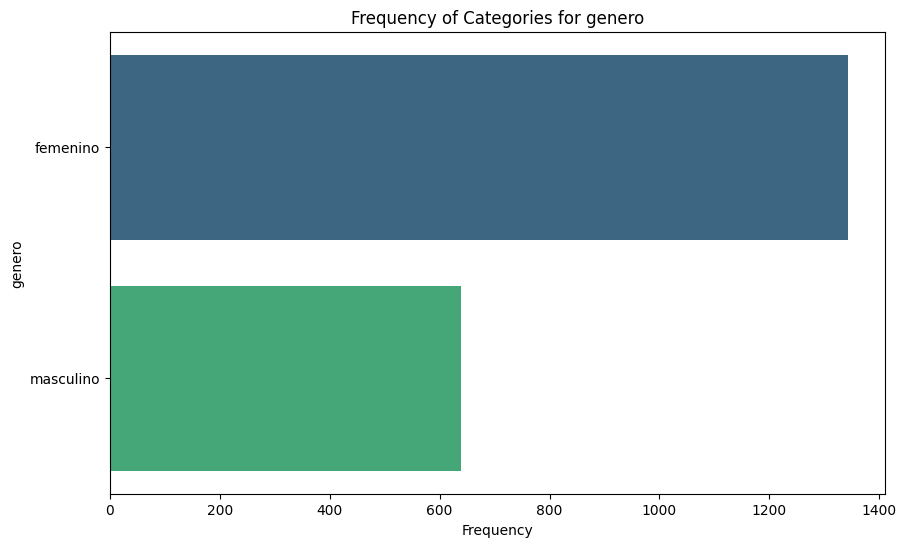

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


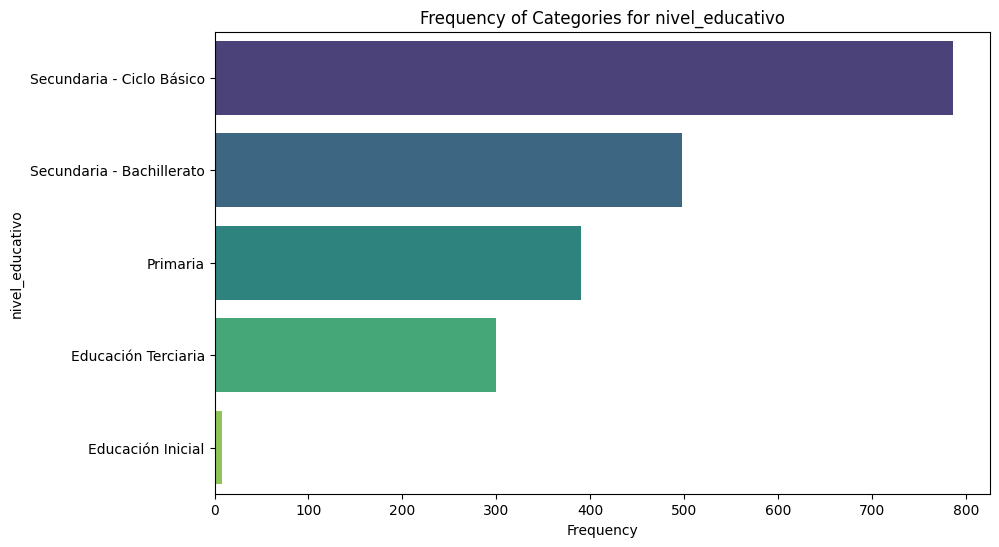

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


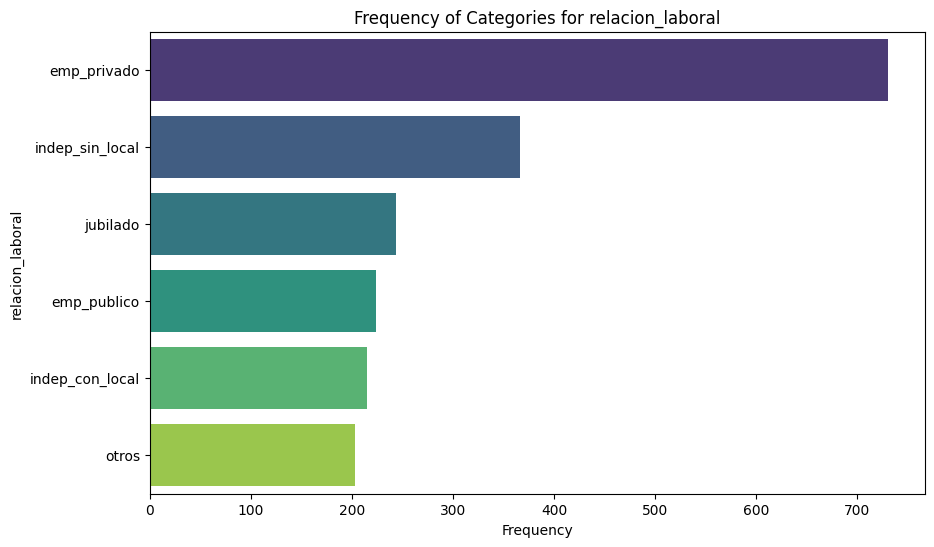

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


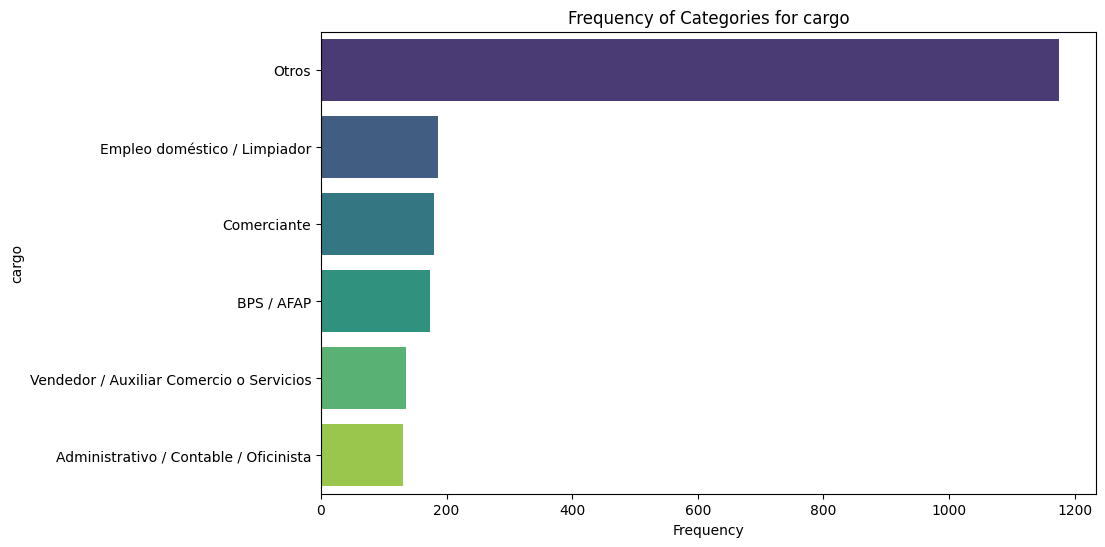

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


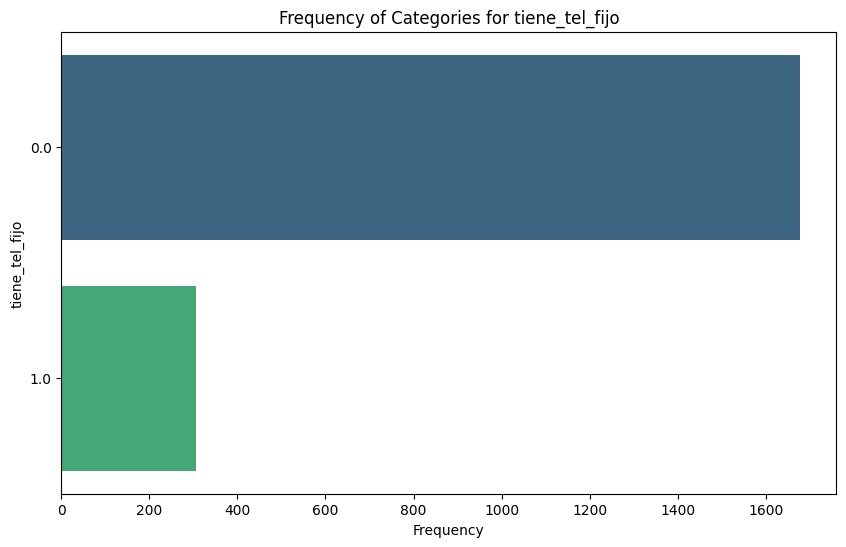

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


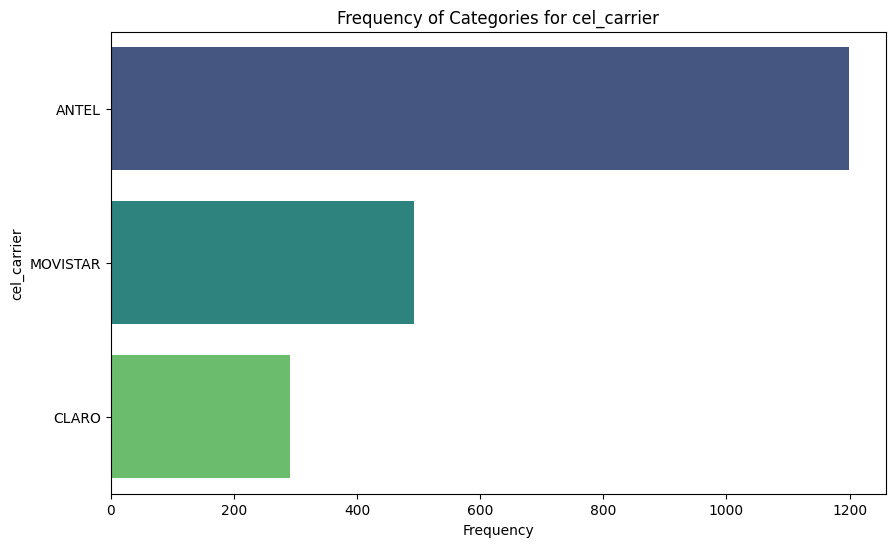

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


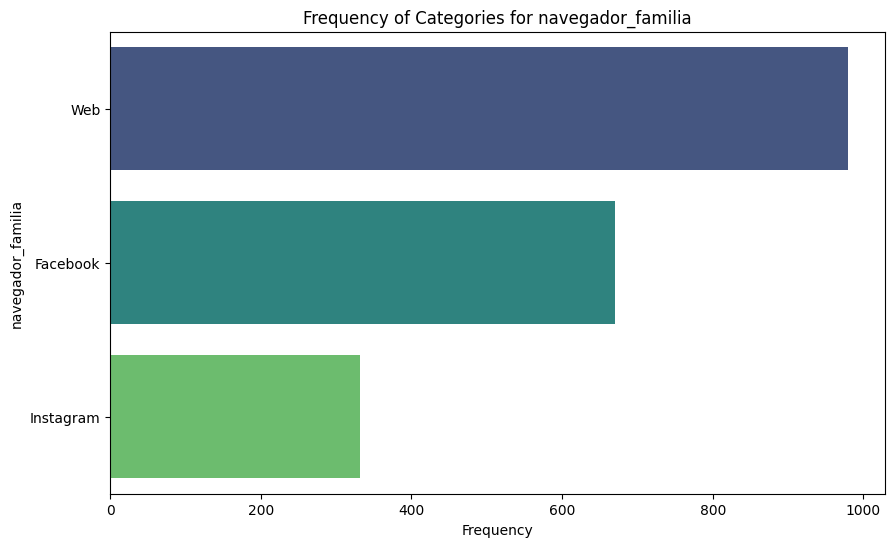

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


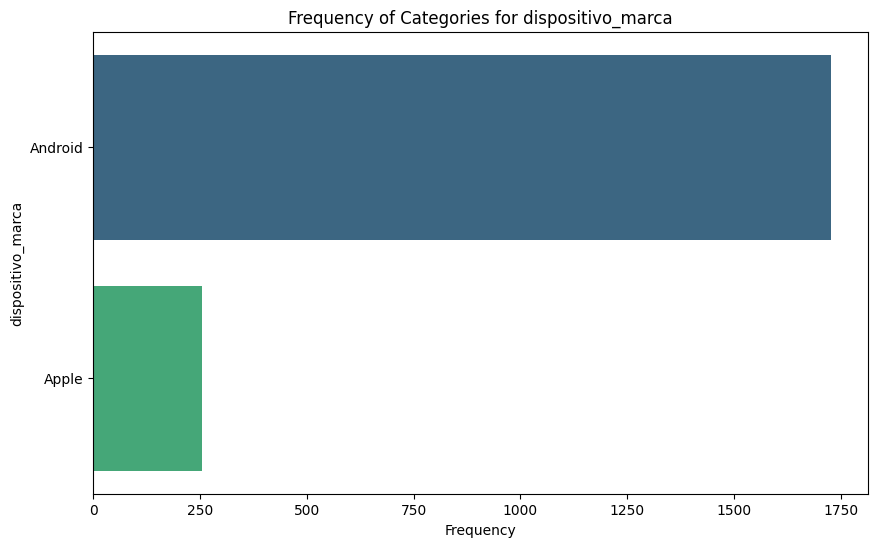

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


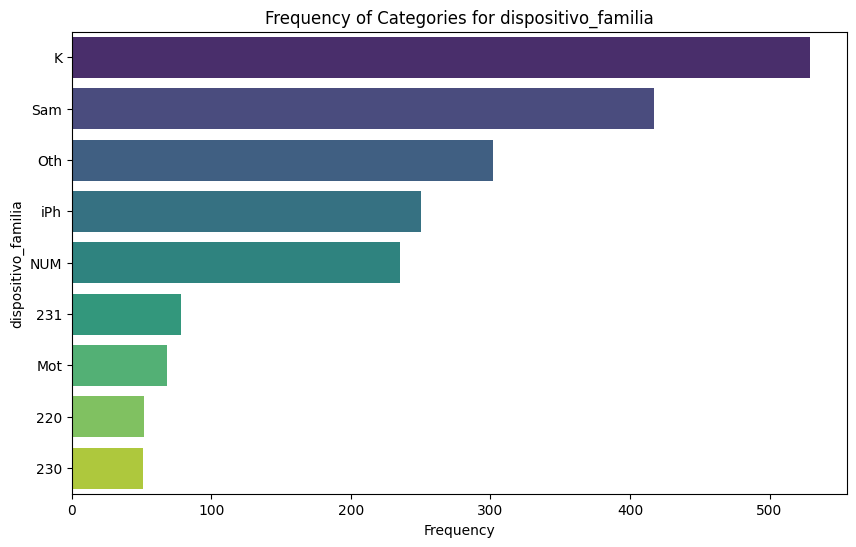

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


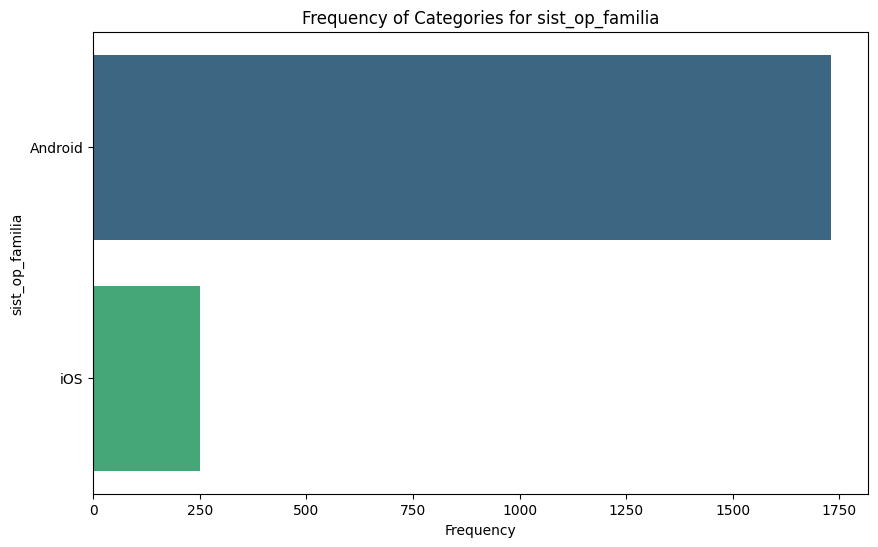

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


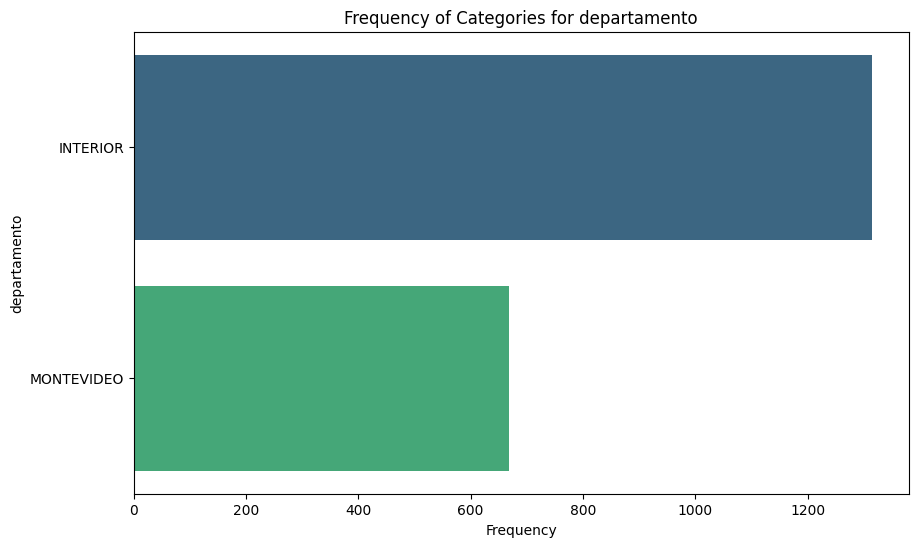

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


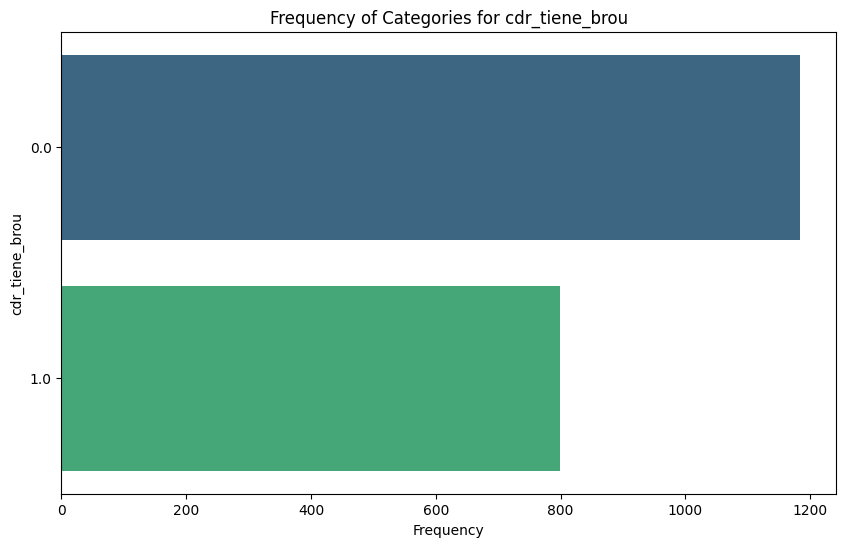

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


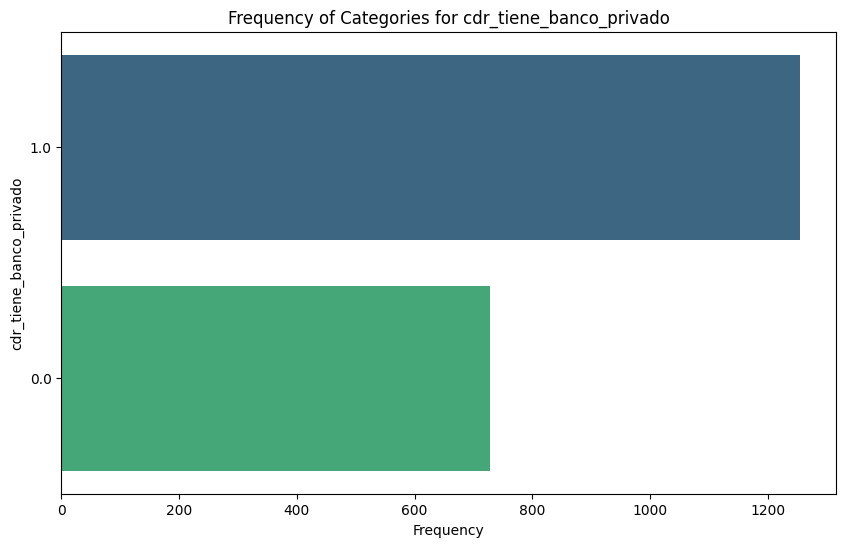

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


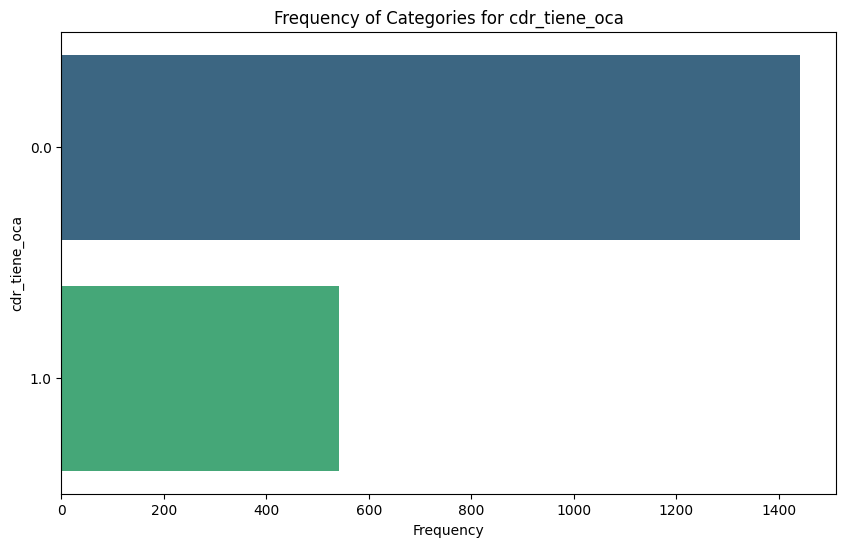

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


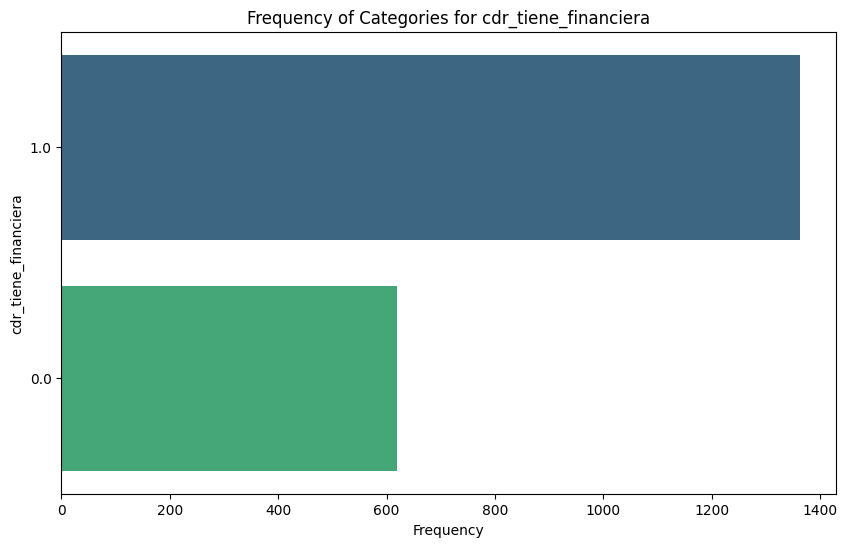

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


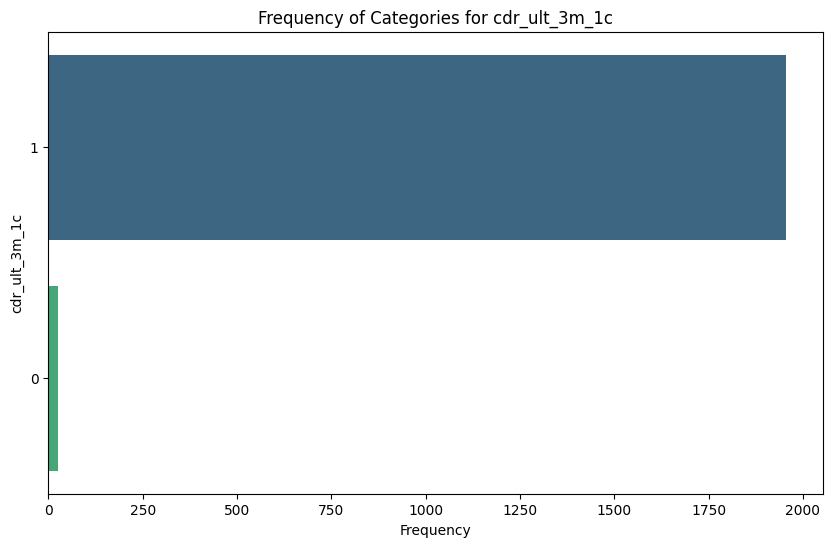

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


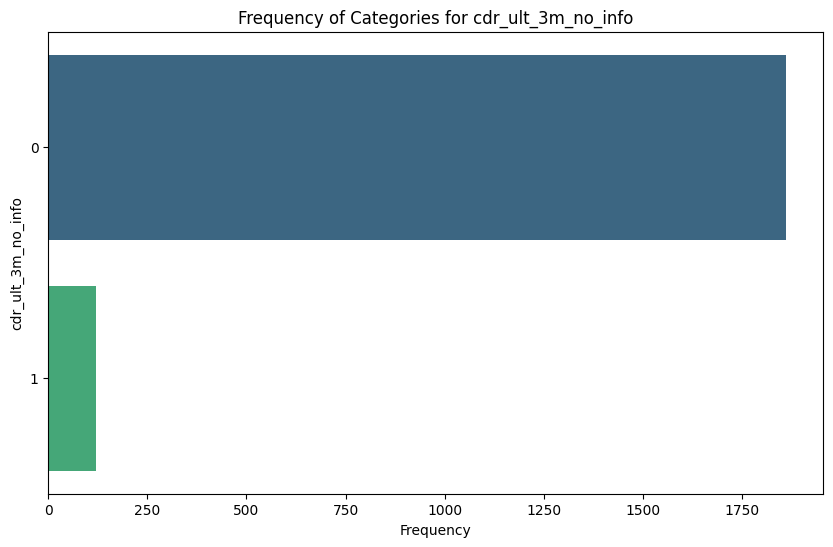

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


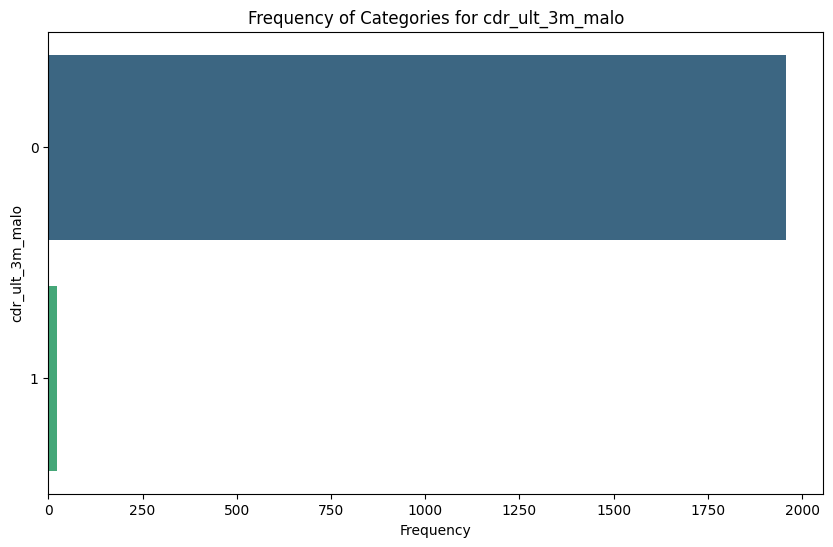

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


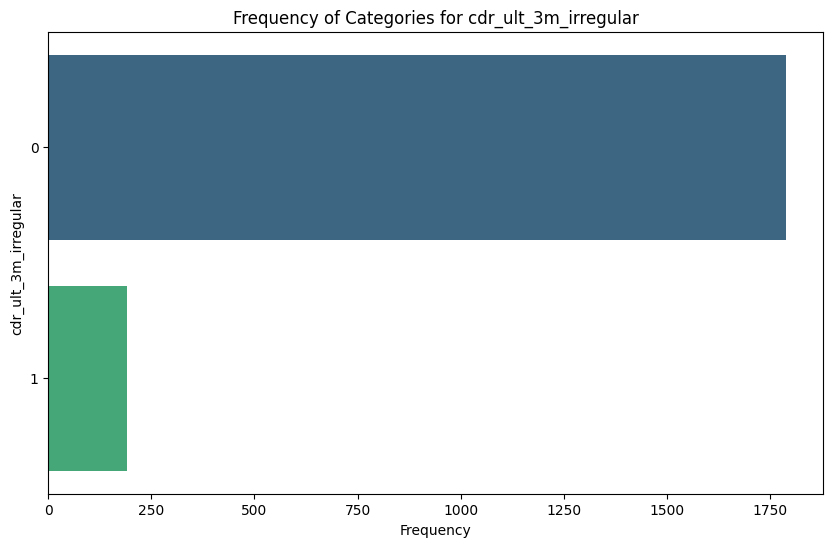

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


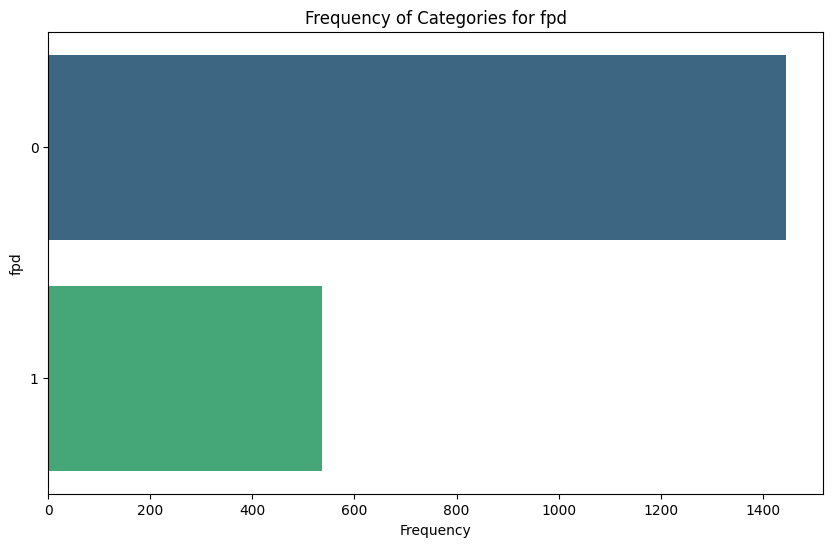

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


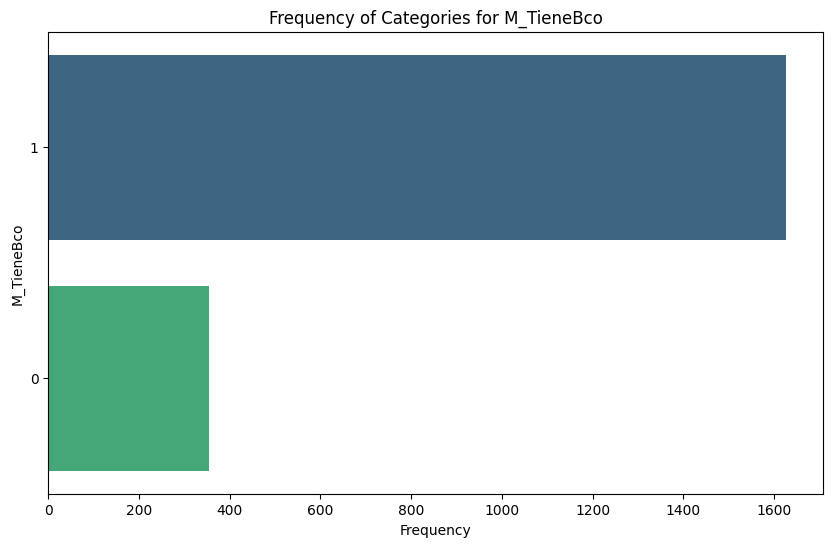

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


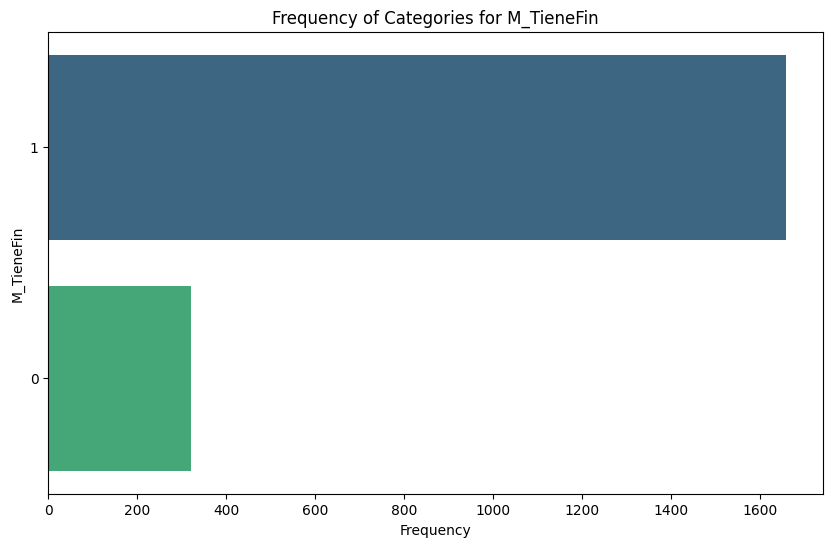

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


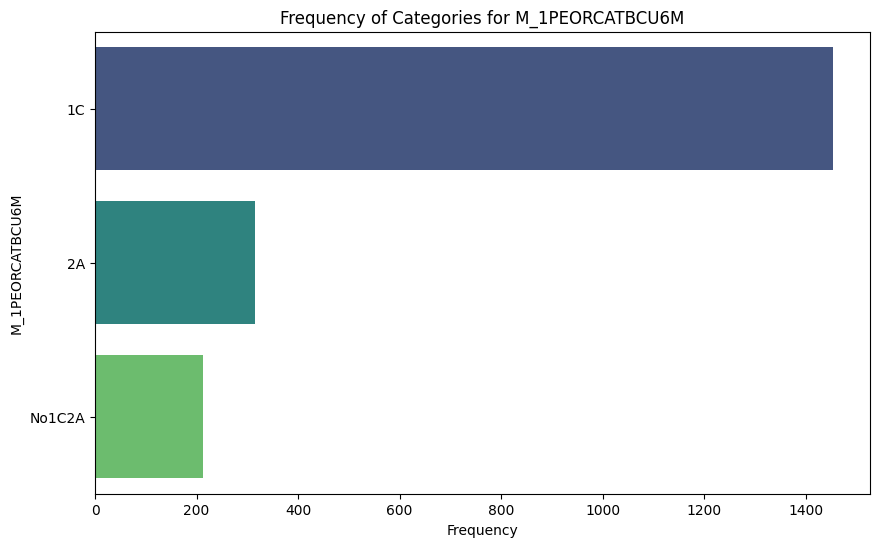

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


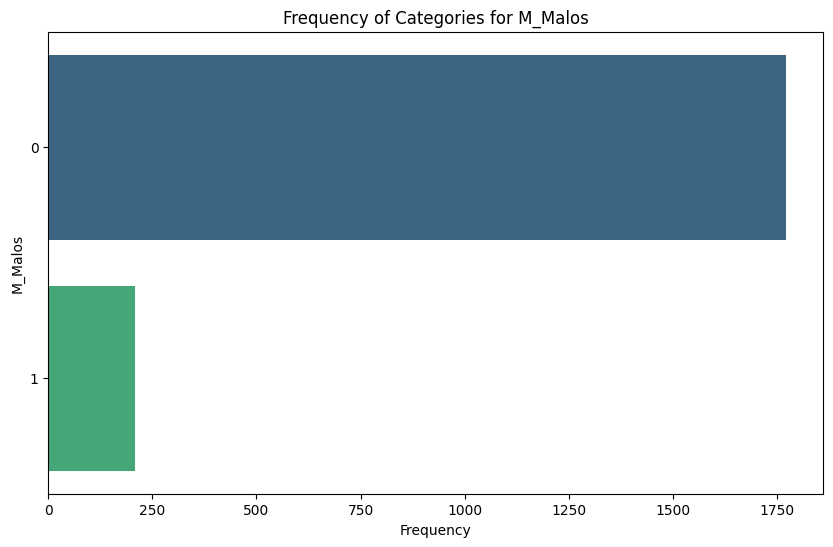

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


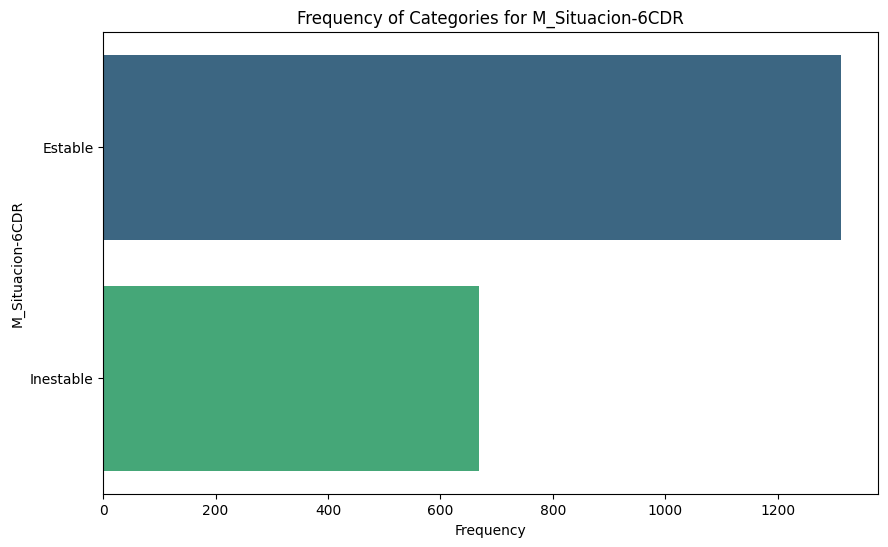

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


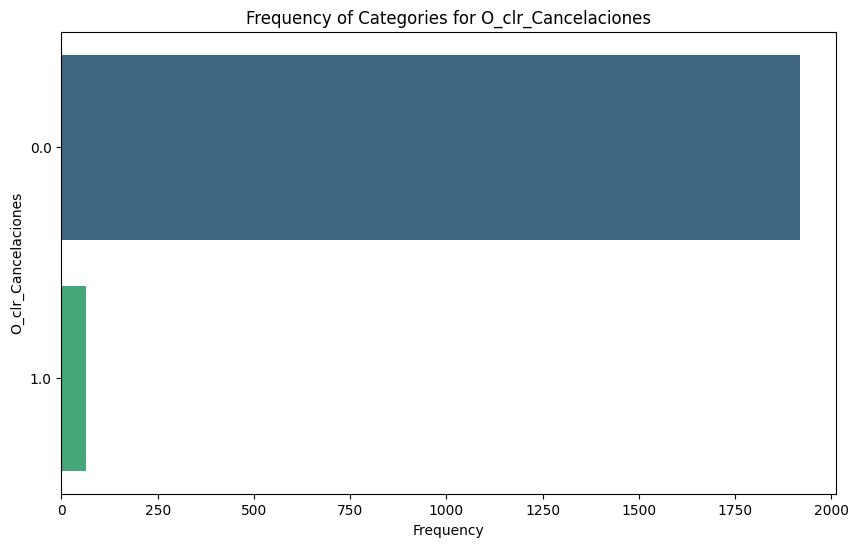

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


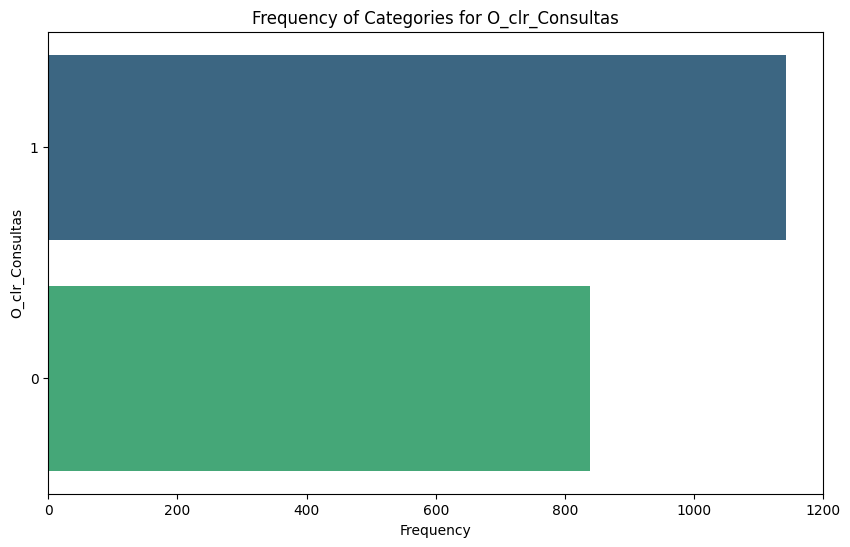

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


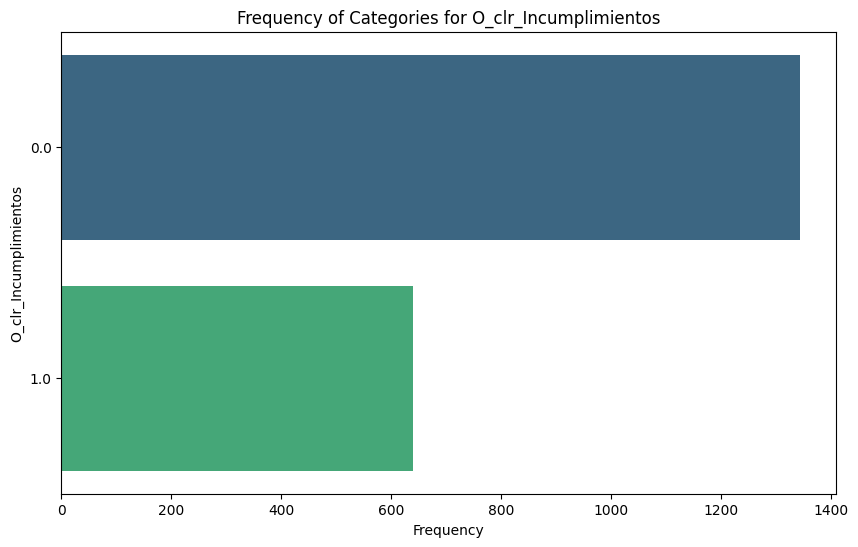

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


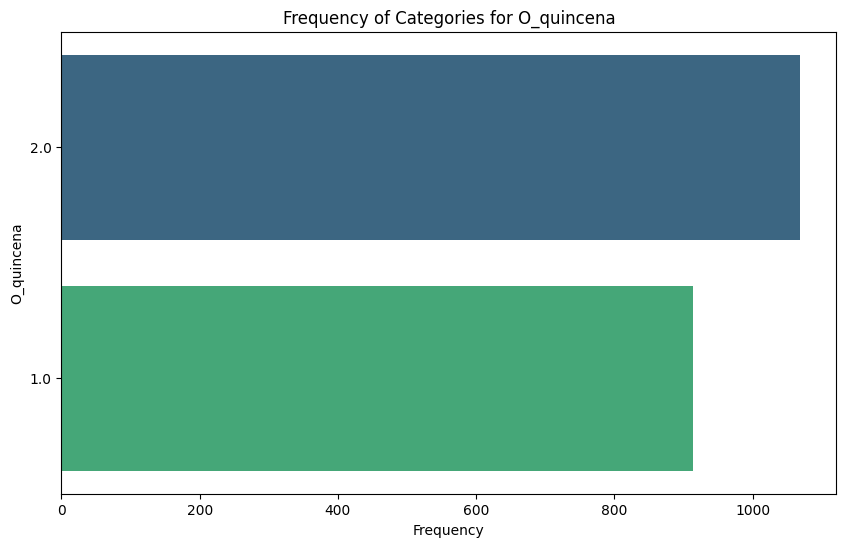

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


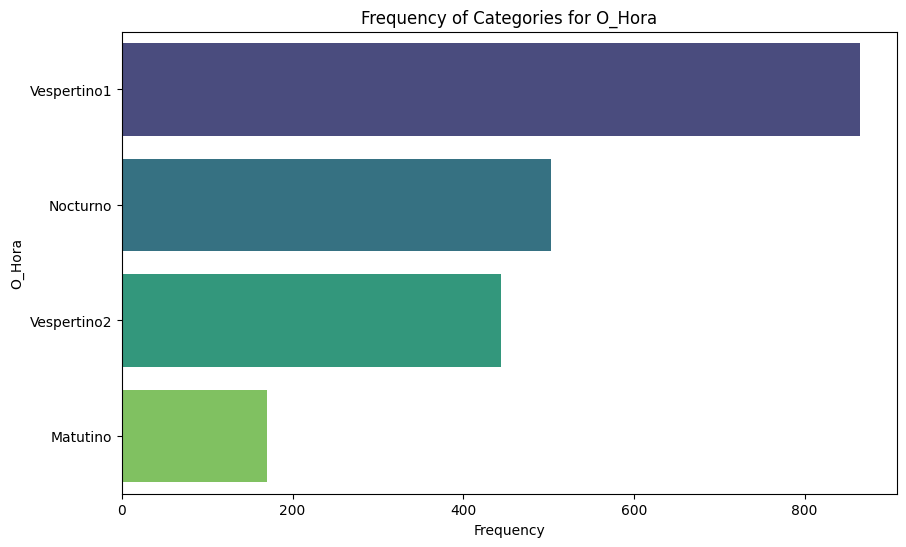

/tmp/ipython-input-359-3381806035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


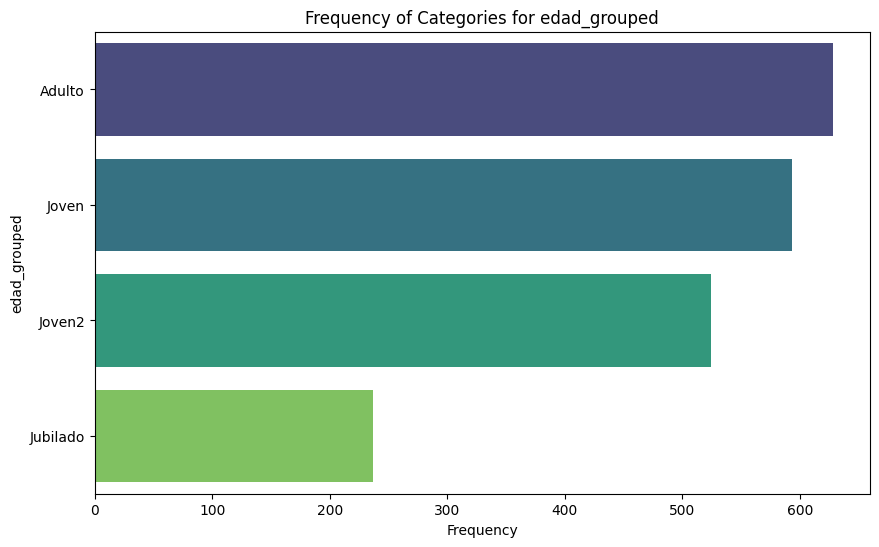

In [359]:
#Seleccionar las variables categoricas y graficarlas de manera de observar la frecuencia de las categorias

# Select categorical variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables categóricas:")
print(categorical_cols)

# Plot frequency distribution for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of Categories for {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()


In [360]:
# Create a new combined variable by concatenating the values of 'relacion_laboral' and 'nivel_educativo'
df['relacion_educacion_combinada'] = df['relacion_laboral'].astype(str) + '_' + df['nivel_educativo'].astype(str)

print("\nPrimeras filas del DataFrame con la nueva columna combinada:")
display(df[['relacion_laboral', 'nivel_educativo', 'relacion_educacion_combinada']].head())

print("\nConteo de valores para la nueva columna combinada:")
print(df['relacion_educacion_combinada'].value_counts())


Primeras filas del DataFrame con la nueva columna combinada:


,relacion_laboral,nivel_educativo,relacion_educacion_combinada
0,indep_sin_local,Secundaria - Bachillerato,indep_sin_local_Secundaria - Bachillerato
1,emp_publico,Secundaria - Ciclo Básico,emp_publico_Secundaria - Ciclo Básico
2,indep_sin_local,Secundaria - Ciclo Básico,indep_sin_local_Secundaria - Ciclo Básico
3,emp_privado,Secundaria - Ciclo Básico,emp_privado_Secundaria - Ciclo Básico
4,emp_publico,Secundaria - Ciclo Básico,emp_publico_Secundaria - Ciclo Básico



Conteo de valores para la nueva columna combinada:
relacion_educacion_combinada
emp_privado_Secundaria - Ciclo Básico        312
emp_privado_Secundaria - Bachillerato        210
indep_sin_local_Secundaria - Ciclo Básico    154
emp_privado_Primaria                         108
emp_privado_Educación Terciaria              100
otros_Secundaria - Ciclo Básico               89
indep_con_local_Secundaria - Ciclo Básico     85
jubilado_Primaria                             83
indep_sin_local_Primaria                      83
jubilado_Secundaria - Ciclo Básico            81
indep_sin_local_Secundaria - Bachillerato     80
emp_publico_Educación Terciaria               76
emp_publico_Secundaria - Ciclo Básico         65
indep_con_local_Secundaria - Bachillerato     60
emp_publico_Secundaria - Bachillerato         60
jubilado_Secundaria - Bachillerato            51
otros_Primaria                                51
indep_sin_local_Educación Terciaria           48
indep_con_local_Primaria             

In [361]:
# Get value counts for the combined column
combined_counts = df['relacion_educacion_combinada'].value_counts()

# Identify categories with less than 50 records
categories_to_group = combined_counts[combined_counts < 50].index.tolist()

# Replace these categories with 'Otros'
df['relacion_educacion_combinada'] = df['relacion_educacion_combinada'].replace(categories_to_group, 'Otros')

print("\nConteo de valores para 'relacion_educacion_combinada' después de agrupar:")
print(df['relacion_educacion_combinada'].value_counts())


Conteo de valores para 'relacion_educacion_combinada' después de agrupar:
relacion_educacion_combinada
emp_privado_Secundaria - Ciclo Básico        312
Otros                                        234
emp_privado_Secundaria - Bachillerato        210
indep_sin_local_Secundaria - Ciclo Básico    154
emp_privado_Primaria                         108
emp_privado_Educación Terciaria              100
otros_Secundaria - Ciclo Básico               89
indep_con_local_Secundaria - Ciclo Básico     85
indep_sin_local_Primaria                      83
jubilado_Primaria                             83
jubilado_Secundaria - Ciclo Básico            81
indep_sin_local_Secundaria - Bachillerato     80
emp_publico_Educación Terciaria               76
emp_publico_Secundaria - Ciclo Básico         65
emp_publico_Secundaria - Bachillerato         60
indep_con_local_Secundaria - Bachillerato     60
jubilado_Secundaria - Bachillerato            51
otros_Primaria                                51
Name: count, d

In [362]:
df['relacion_educacion_combinada'] = df['relacion_educacion_combinada'].astype('category')


In [363]:
df.info('fpd')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   genero                        1982 non-null   category
 1   nivel_educativo               1982 non-null   category
 2   relacion_laboral              1982 non-null   category
 3   cargo                         1982 non-null   category
 4   ingreso_estimado              1982 non-null   float64 
 5   ingreso_declarado             1982 non-null   float64 
 6   scoring                       1982 non-null   float64 
 7   tiene_tel_fijo                1982 non-null   category
 8   cel_carrier                   1982 non-null   category
 9   navegador_familia             1982 non-null   category
 10  dispositivo_marca             1982 non-null   category
 11  dispositivo_familia           1982 non-null   category
 12  sist_op_familia               1982 non-null   ca

In [364]:
# prompt: separar la variable fdp del dataset df, para usarla posteriormente en un modelo predictivo

# Separar la variable objetivo 'fpd' del resto de las características
target = df['fpd']
df = df.drop('fpd', axis=1)


In [365]:
# Select categorical columns for One-Hot Encoding
categorical_cols = df.select_dtypes(include=['category']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

print("Shape of the DataFrame after One-Hot Encoding:", df_encoded.shape)
print("\nFirst 5 rows of the encoded DataFrame:")
display(df_encoded.head())

Shape of the DataFrame after One-Hot Encoding: (1982, 102)

First 5 rows of the encoded DataFrame:


,ingreso_estimado,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_Q_irregular_12m,O_clr_Score3,genero_masculino,nivel_educativo_Educación Terciaria,nivel_educativo_Primaria,nivel_educativo_Secundaria - Bachillerato,nivel_educativo_Secundaria - Ciclo Básico,relacion_laboral_emp_publico,relacion_laboral_indep_con_local,relacion_laboral_indep_sin_local,relacion_laboral_jubilado,relacion_laboral_otros,cargo_BPS / AFAP,cargo_Comerciante,cargo_Empleo doméstico / Limpiador,cargo_Otros,cargo_Vendedor / Auxiliar Comercio o Servicios,tiene_tel_fijo_1.0,cel_carrier_CLARO,cel_carrier_MOVISTAR,navegador_familia_Instagram,navegador_familia_Web,dispositivo_marca_Apple,dispositivo_familia_230,dispositivo_familia_231,dispositivo_familia_K,dispositivo_familia_Mot,dispositivo_familia_NUM,dispositivo_familia_Oth,dispositivo_familia_Sam,dispositivo_familia_iPh,sist_op_familia_iOS,departamento_MONTEVIDEO,cdr_tiene_brou_1.0,cdr_tiene_banco_privado_1.0,cdr_tiene_oca_1.0,cdr_tiene_financiera_1.0,cdr_ult_3m_1c_1,cdr_ult_3m_no_info_1,cdr_ult_3m_malo_1,cdr_ult_3m_irregular_1,M_TieneBco_1,M_TieneFin_1,M_1PEORCATBCU6M_2A,M_1PEORCATBCU6M_No1C2A,M_Malos_1,M_Situacion-6CDR_Inestable,O_clr_Cancelaciones_1.0,O_clr_Consultas_1,O_clr_Incumplimientos_1.0,O_quincena_2.0,O_Hora_Nocturno,O_Hora_Vespertino1,O_Hora_Vespertino2,edad_grouped_Joven,edad_grouped_Joven2,edad_grouped_Jubilado,relacion_educacion_combinada_emp_privado_Educación Terciaria,relacion_educacion_combinada_emp_privado_Primaria,relacion_educacion_combinada_emp_privado_Secundaria - Bachillerato,relacion_educacion_combinada_emp_privado_Secundaria - Ciclo Básico,relacion_educacion_combinada_emp_publico_Educación Terciaria,relacion_educacion_combinada_emp_publico_Secundaria - Bachillerato,relacion_educacion_combinada_emp_publico_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_con_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_con_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_sin_local_Primaria,relacion_educacion_combinada_indep_sin_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_sin_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_jubilado_Primaria,relacion_educacion_combinada_jubilado_Secundaria - Bachillerato,relacion_educacion_combinada_jubilado_Secundaria - Ciclo Básico,relacion_educacion_combinada_otros_Primaria,relacion_educacion_combinada_otros_Secundaria - Ciclo Básico
0,20712.77,20000.00,402.00,857.17,17199.45,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,6.00,1.49,13.00,142563,51240,11415,9,0.48,0.36,0.19,0.37,38419.00,0.27,0,198.00,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,46713.24,60000.00,508.00,5611.65,100232.16,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,7.00,0.91,13.00,1252932,676209,72090,9,0.32,0.54,0.08,0.38,347019.00,0.28,2,211.00,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fal

In [366]:
# Identify numeric columns in the encoded DataFrame
numeric_cols_encoded = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

print("Variables numéricas en el DataFrame codificado:")
print(numeric_cols_encoded)

print("\nEstadísticas descriptivas de las variables numéricas:")
display(df_encoded[numeric_cols_encoded].describe())

Variables numéricas en el DataFrame codificado:
['ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_ult_6m_1c', 'cdr_ult_6m_no_info', 'cdr_ult_6m_malo', 'cdr_ult_6m_irregular', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo', 'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m', 'cdr_segmento', 'exposicion_maxima', 'mejor_esquema_pricing', 'M_Deuda', 'M_DeudaPrincipal', 'M_DeudaSec_Prom', 'M_Entidades', 'M_Rel_Deuda_Fin', 'M_Rel_DeudaPrincipal', 'M_Rel_Contingencia', 'M_Var_dueda_6M', 'M_Deuda_Var-6', 'M_Rel_VarDeuda_Deuda', 'M_Q_irregular_12m', 'O_clr_Score3']

Estadísticas descriptivas de las variables numéricas:


,ingreso_estimado,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_Q_irregular_12m,O_clr_Score3
count,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00
mean,32212.18,40063.43,502.04,4910.07,25643.25,5.40,0.18,0.07,0.31,1.64,10.22,0.65,0.29,0.62,2.78,5.03,1.52,7.22,285329.54,183662.35,30744.17,3.45,0.44,0.66,inf,1.45,70850.23,0.29,0.91,596.69
std,17192.19,34069.37,98.68,7569.08,29011.57,1.23,0.75,0.47,0.88,3.17,2.68,2.00,1.38,1.62,3.75,1.94,0.40,1.57,488142.99,385257.55,43248.78,1.98,0.37,0.24,NaN,2.61,142387.04,0.52,1.79,192.89
min,9684.01,30.00,290.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.82,0.00,0.00,0.00,0.00,-1.00,1.00,0.52,2.00,0.00,0.00,0.00,1.00,-0.00,0.00,0.00,-1.00,-245439.00,-7.61,0.00,41.00
25%,20438.97,24069.50,423.00,223.91,6115.75,5.00,0.00,0.00,0.00,0.07,10.00,0.00,0.00,0.00,0.30,4.00,1.32,6.00,53248.00,32236.25,5927.25,2.00,0.10,0.48,0.01,0.07,5211.50,0.08,0.00,483.00
50%,26809.72,32000.00,492.00,1808.31,15883.69,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,5.00,1.50,7.00,126796.50,75318.50,17077.50,3.00,0.37,0.64,0.09,0.47,36533.00,0.32,0.00,612.00
75%,38534.79,46000.00,571.00,6408.65,34703.96,6.00,0.00,0.00,0.00,1.00,12.00,0.00,0.00,0.00,3.54,6.00,1.67,8.00,311363.50,170912.25,38614.00,5.00,0.78,0.87,0.27,1.19,93186.00,0.54,1.00,736.00
max,143284.07,560000.00,792.00,60405.89,243862.94,6.00,6.00,6.00,6.00,10.00,12.00,12.00,12.00,12.00,10.00,9.00,4.48,14.00,9180499.00,8878233.00,490136.00,13.00,1.00,1.00,inf,10.00,2899726.00,0.91,12.00,942.00


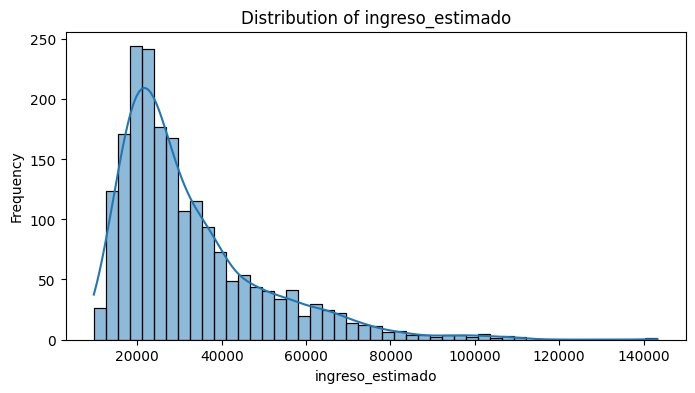

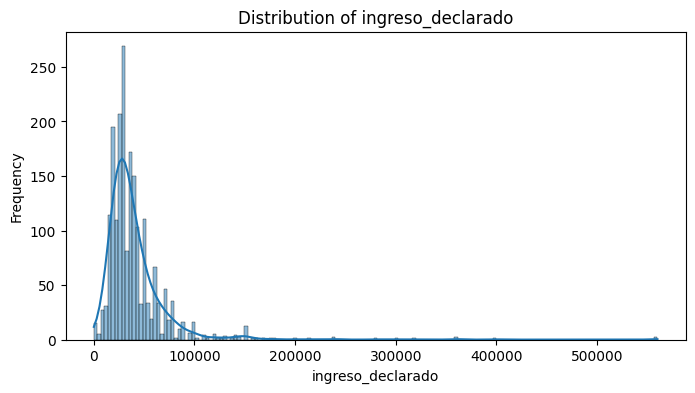

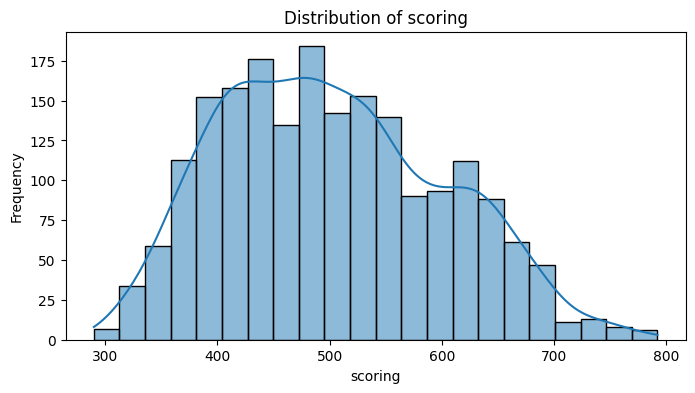

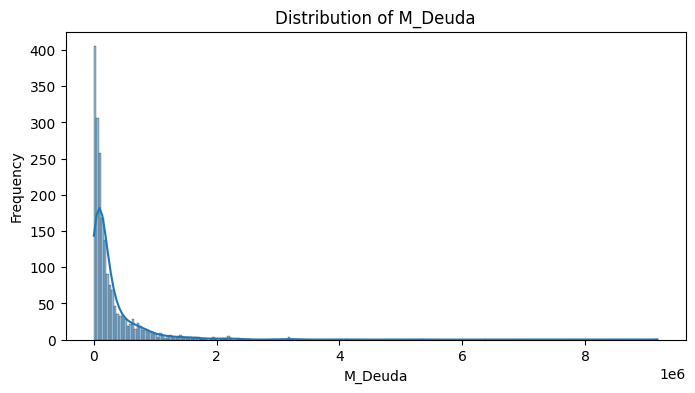

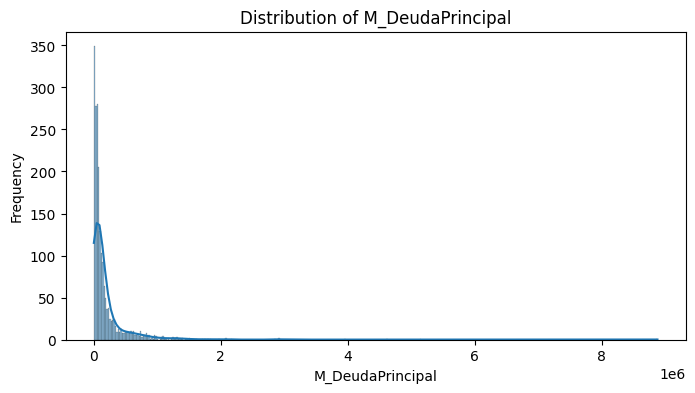

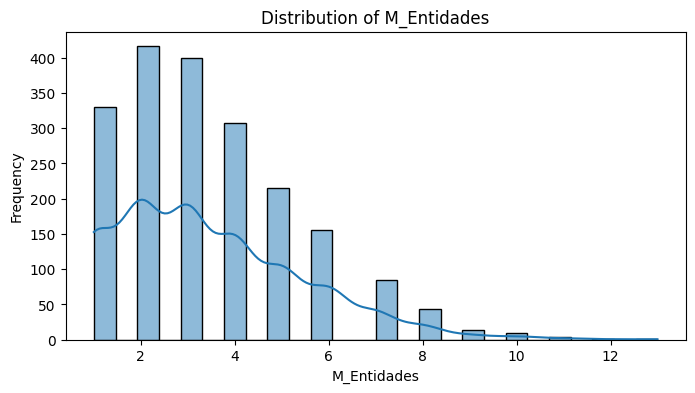

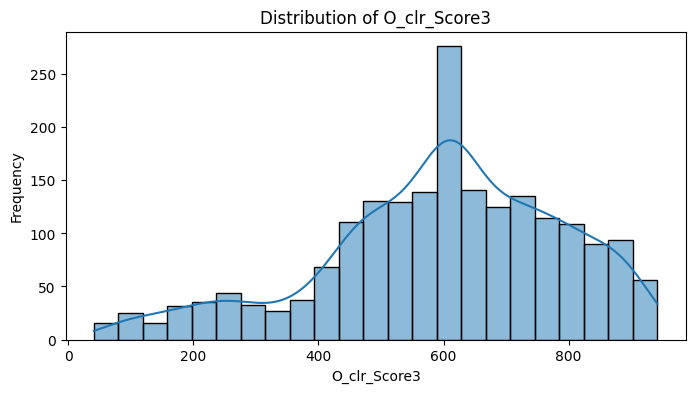

In [367]:
# Select a subset of numerical columns to visualize (you can adjust this list)
numerical_cols_to_visualize = ['ingreso_estimado', 'ingreso_declarado', 'scoring', 'M_Deuda', 'M_DeudaPrincipal', 'M_Entidades', 'O_clr_Score3']

# Plot histograms for the selected numerical columns
for col in numerical_cols_to_visualize:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_encoded, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [368]:
import numpy as np

# Select numerical columns in df_encoded, EXCLUDING 'fpd'
numerical_cols_encoded = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'fpd' in numerical_cols_encoded:
    numerical_cols_encoded.remove('fpd')


# Apply IQR-based capping to numerical columns in df_encoded
for col in numerical_cols_encoded:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_encoded[col] = np.where(df_encoded[col] < lower_bound, lower_bound, df_encoded[col])
    df_encoded[col] = np.where(df_encoded[col] > upper_bound, upper_bound, df_encoded[col])

print("IQR-based capping applied to numerical columns (excluding 'fpd') in df_encoded.")

IQR-based capping applied to numerical columns (excluding 'fpd') in df_encoded.


In [369]:
# Paso 1: Identificar las variables numéricas
# Seleccionar las columnas con tipos de datos numéricos (int64 y float64)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas numéricas identificadas:")
print(numeric_cols)

Columnas numéricas identificadas:
['ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui', 'cdr_sum_deudas_ui', 'cdr_ult_6m_1c', 'cdr_ult_6m_no_info', 'cdr_ult_6m_malo', 'cdr_ult_6m_irregular', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_ult_12m_no_info', 'cdr_ult_12m_malo', 'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m', 'cdr_segmento', 'exposicion_maxima', 'mejor_esquema_pricing', 'M_Deuda', 'M_DeudaPrincipal', 'M_DeudaSec_Prom', 'M_Entidades', 'M_Rel_Deuda_Fin', 'M_Rel_DeudaPrincipal', 'M_Rel_Contingencia', 'M_Var_dueda_6M', 'M_Deuda_Var-6', 'M_Rel_VarDeuda_Deuda', 'M_Q_irregular_12m', 'O_clr_Score3']


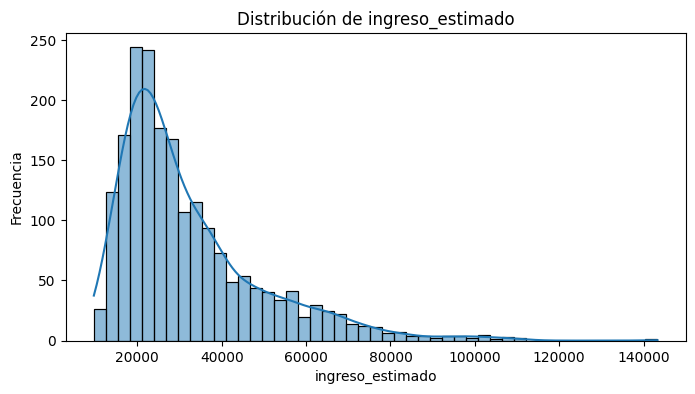

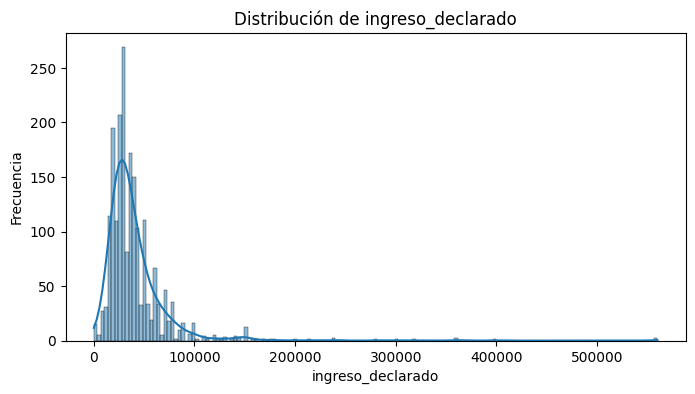

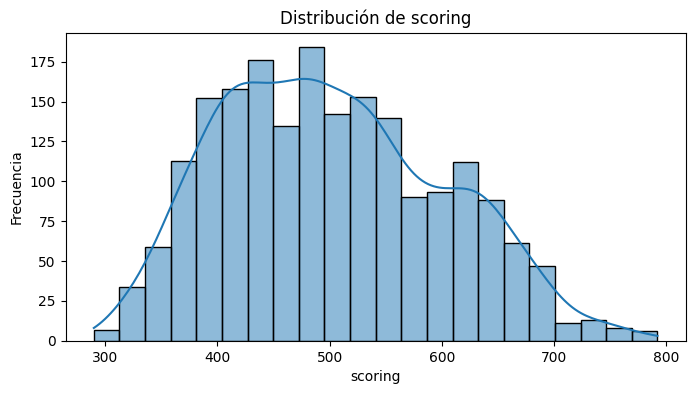

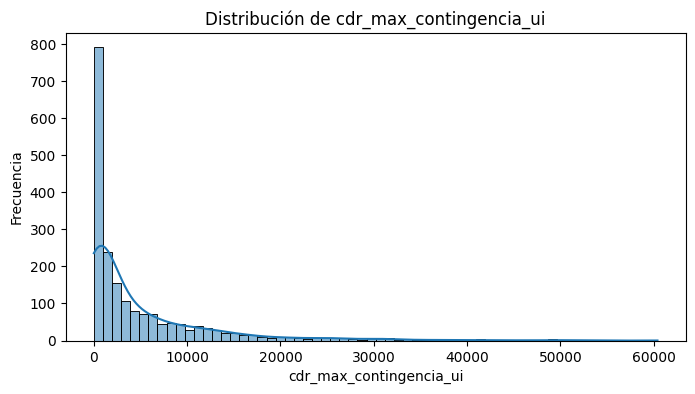

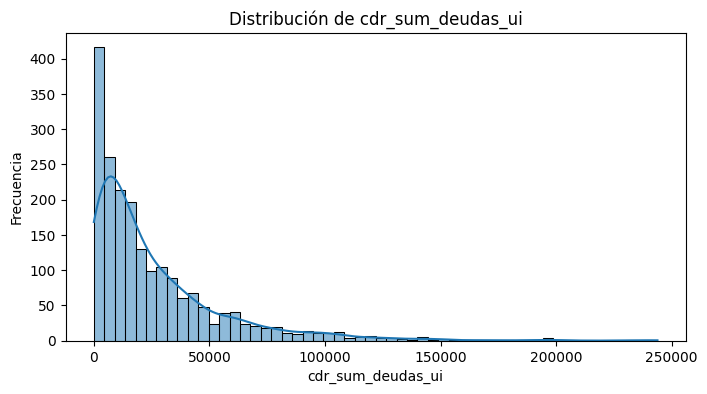

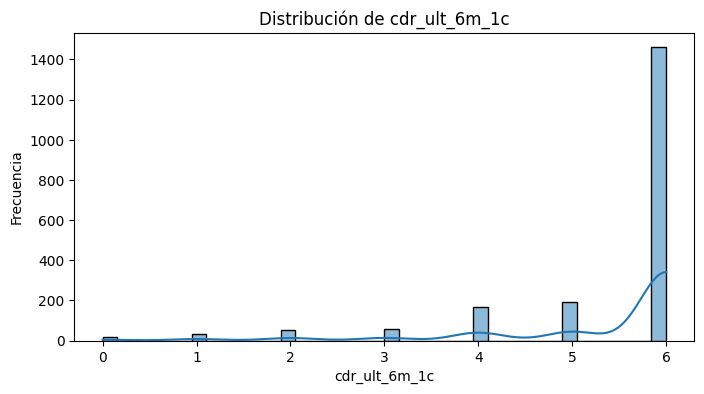

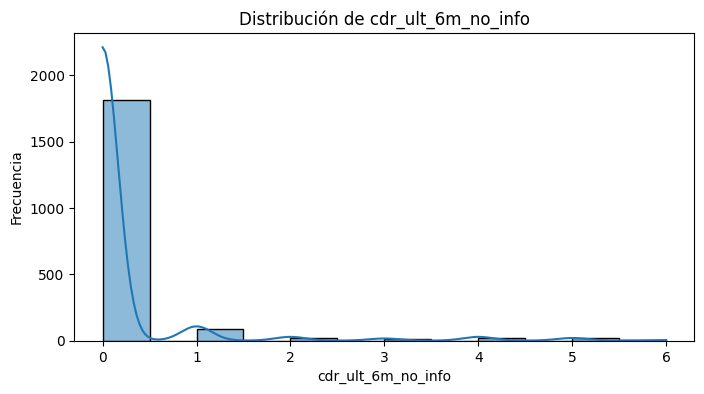

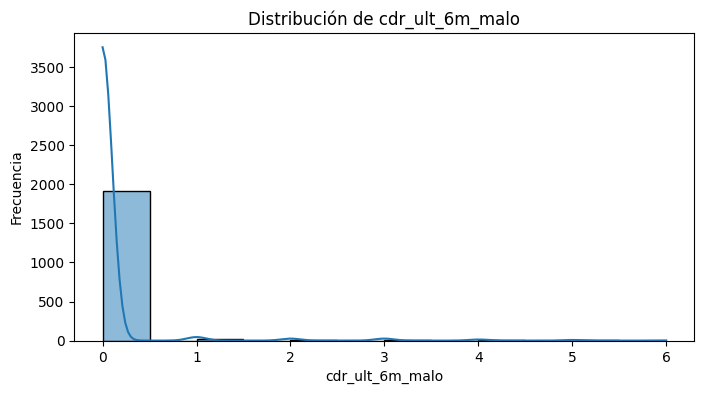

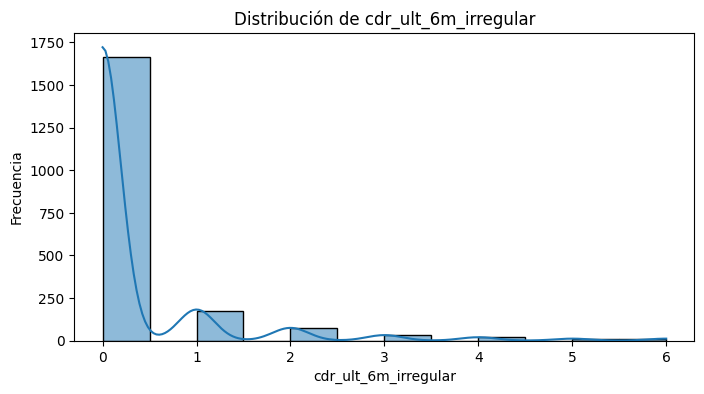

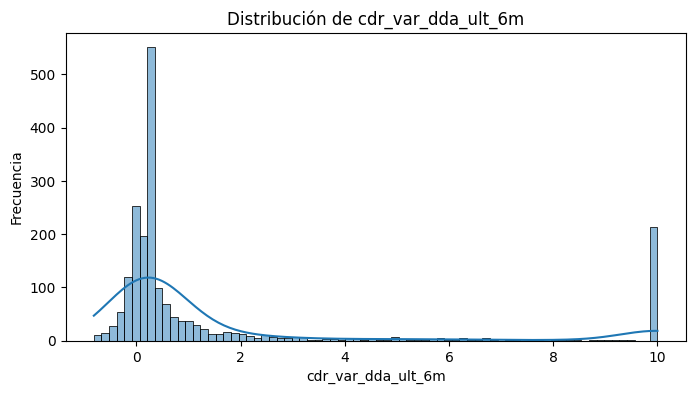

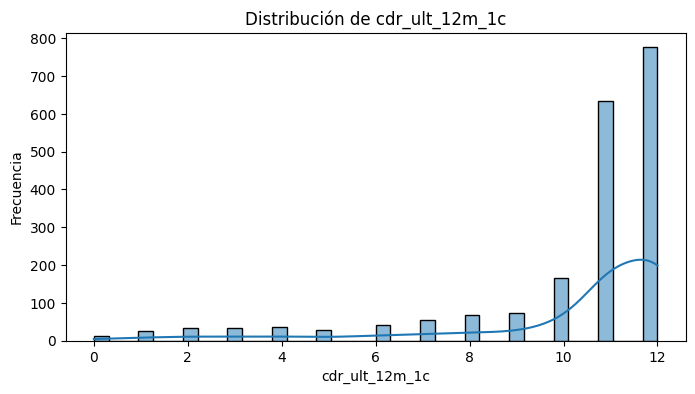

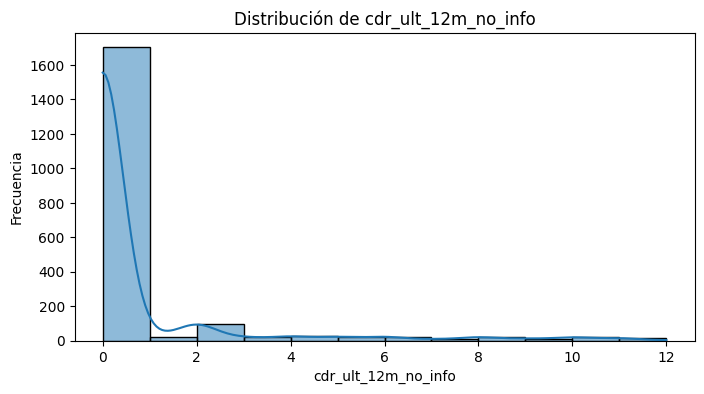

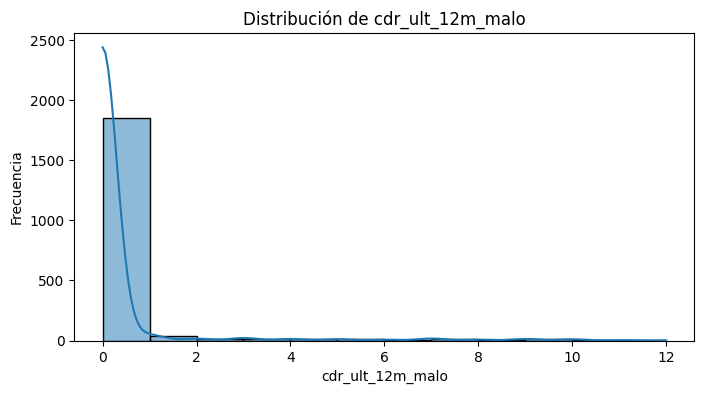

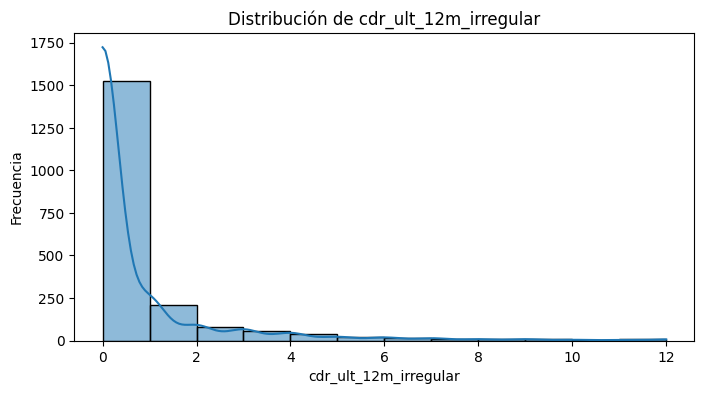

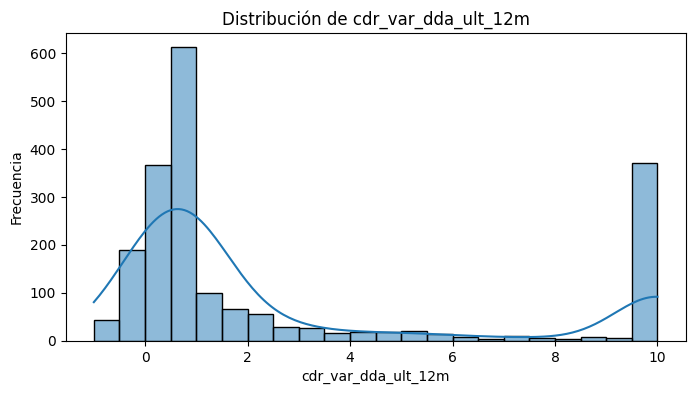

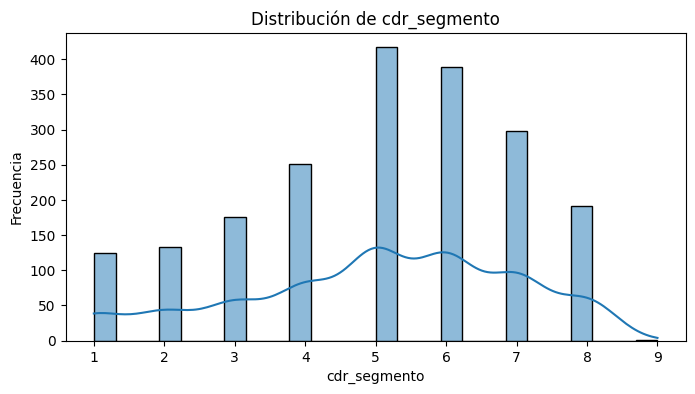

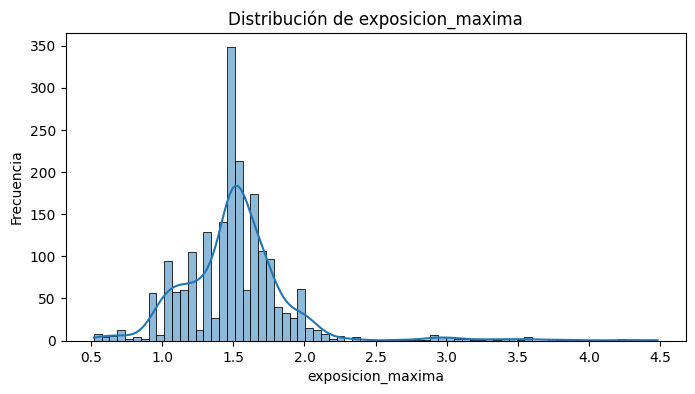

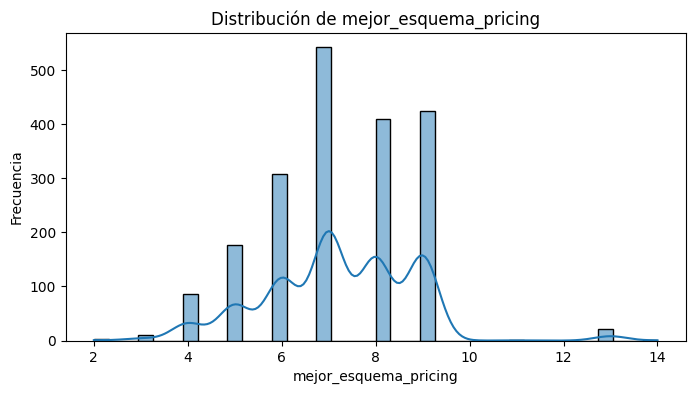

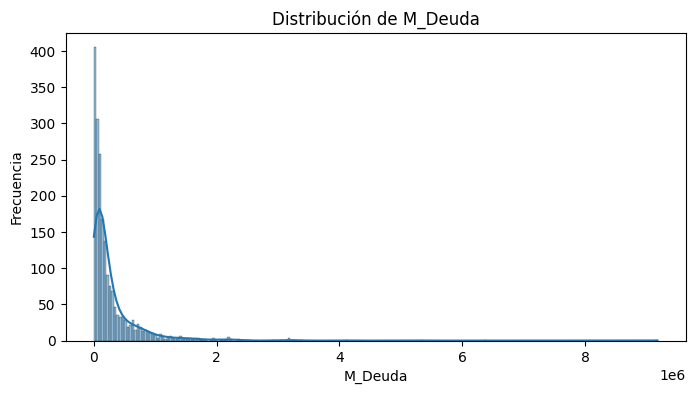

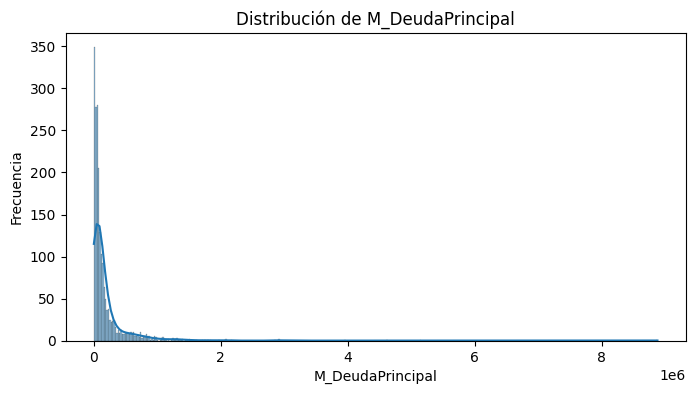

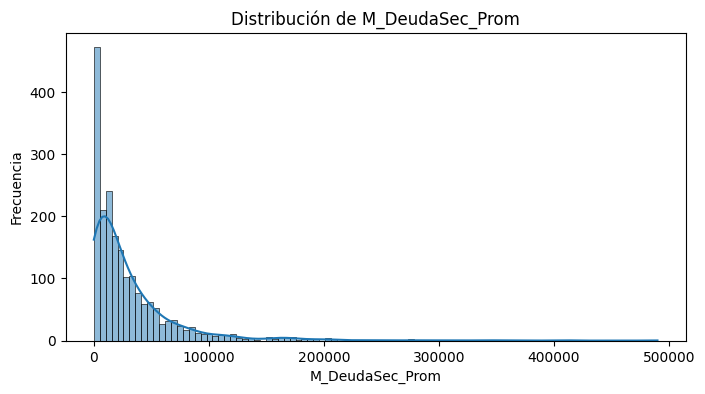

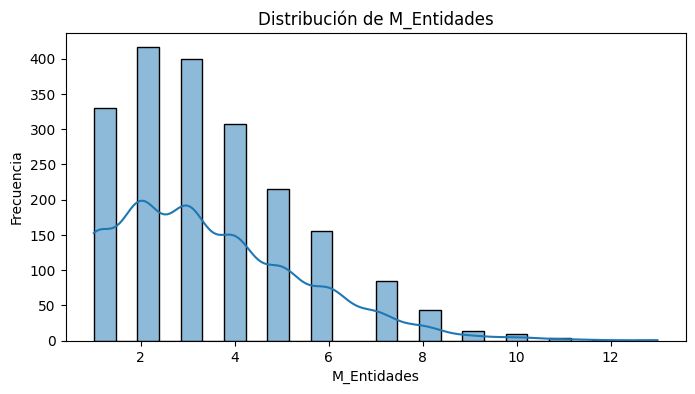

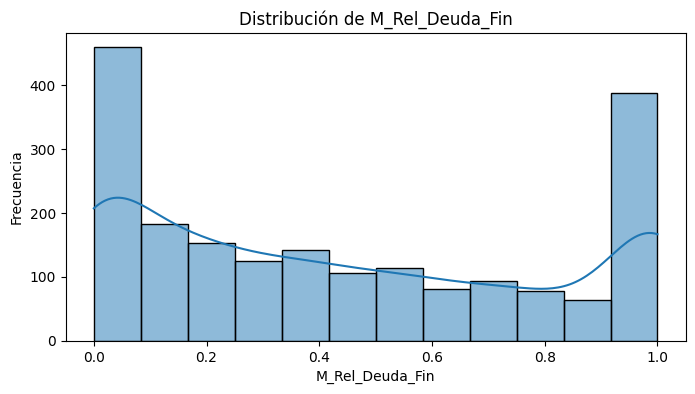

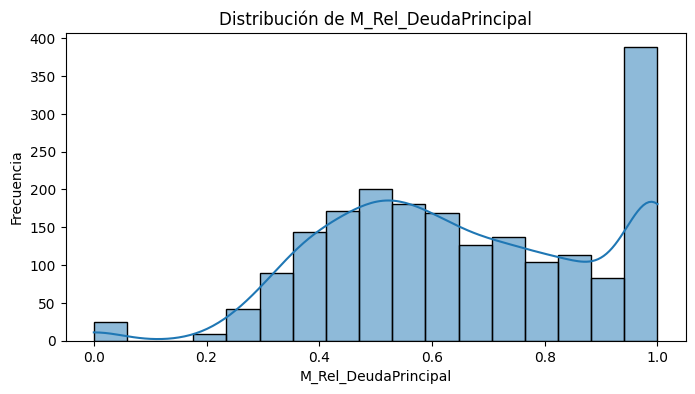

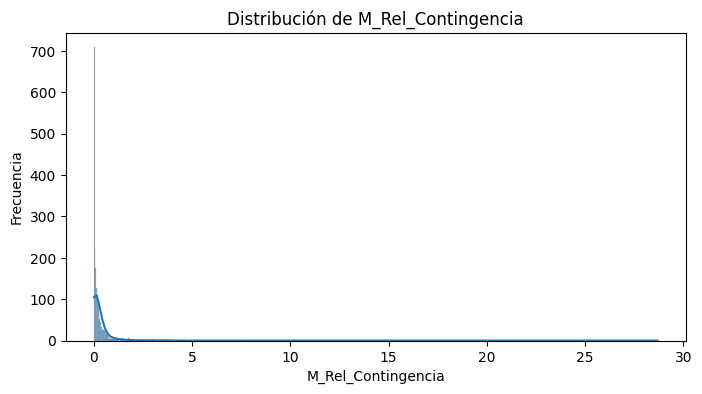

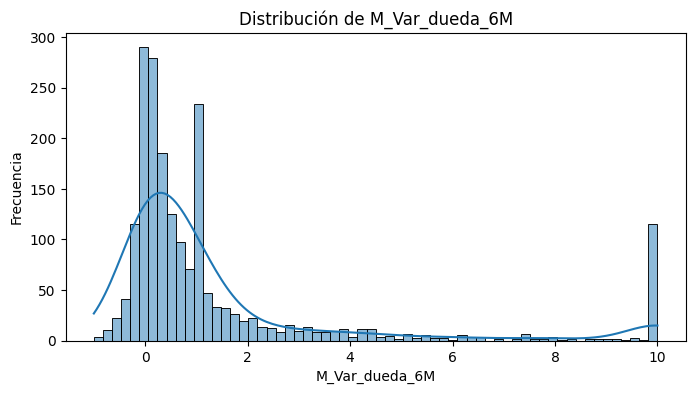

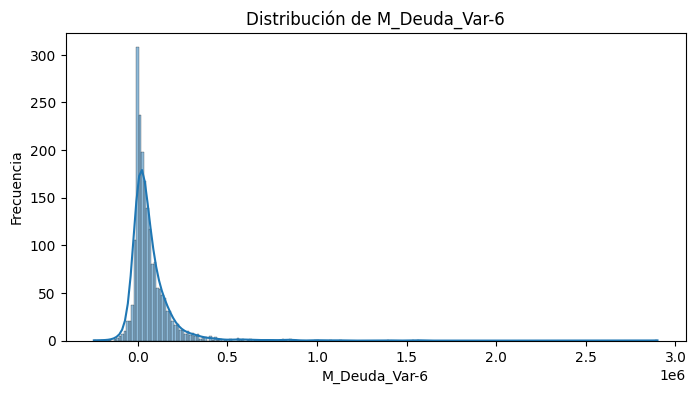

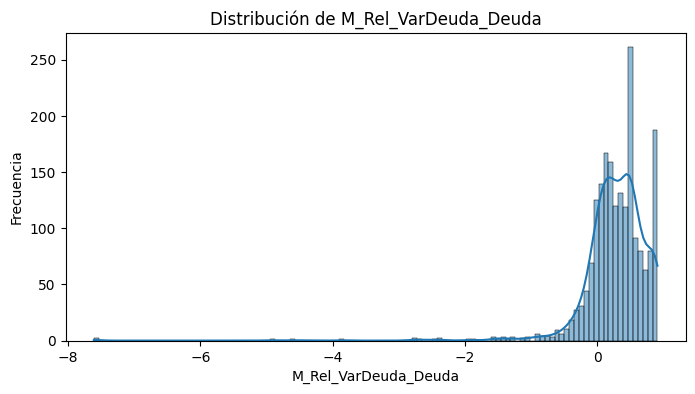

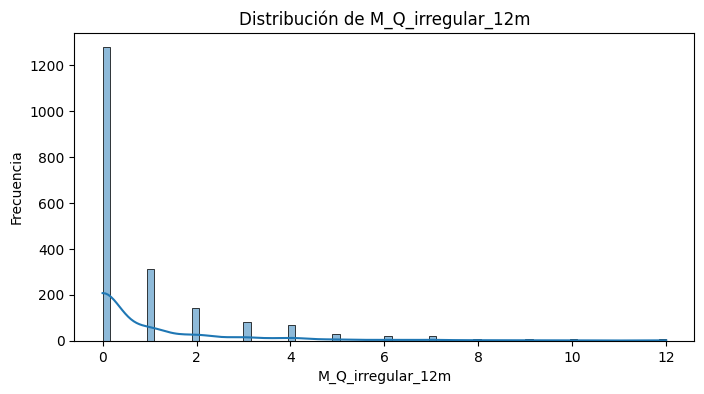

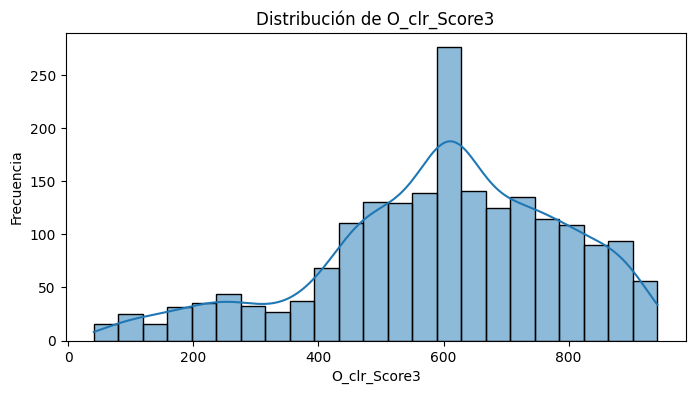

In [370]:
# Paso 2: Analizar la distribución de cada variable numérica
# Visualizar la distribución de cada columna numérica usando histogramas
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [371]:
# Aplicar la técnica de escalado adecuada
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Define columns for standardization and normalization based on visual inspection of histograms
# This is a subjective assessment based on typical data distributions and common practices.
# You might adjust this based on your specific observations and domain knowledge.

# Assuming most distributions are not perfectly normal,
# applying StandardScaler to most numerical columns.
cols_for_standardization = [
    'ingreso_estimado', 'ingreso_declarado', 'scoring', 'cdr_max_contingencia_ui',
    'cdr_sum_deudas_ui', 'cdr_ult_6m_1c', 'cdr_ult_6m_no_info', 'cdr_ult_6m_malo',
    'cdr_ult_6m_irregular', 'cdr_var_dda_ult_6m', 'cdr_ult_12m_1c', 'cdr_ult_12m_no_info',
    'cdr_ult_12m_malo', 'cdr_ult_12m_irregular', 'cdr_var_dda_ult_12m',
    'exposicion_maxima', 'mejor_esquema_pricing', 'tasa', 'M_Deuda',
    'M_DeudaPrincipal', 'M_DeudaSec_Prom', 'M_Entidades', 'M_Rel_Deuda_Fin',
    'M_Rel_DeudaPrincipal', 'M_Rel_Contingencia', 'M_Var_dueda_6M', 'M_Deuda_Var-6',
    'M_Rel_VarDeuda_Deuda', 'M_Q_irregular_12m', 'O_clr_Score3'
]

# Columns that might benefit from MinMaxScaler (e.g., if bounded or more uniform after capping)
# This is an example and might need adjustment based on visual analysis.
cols_for_normalization = [
    'cdr_segmento' # Example: if segment values are in a defined range and distribution is somewhat uniform
]


# Apply Standardization
for col in cols_for_standardization:
    if col in df_encoded.columns: # Apply to df_encoded
        df_encoded[col] = scaler_standard.fit_transform(df_encoded[[col]]) # Apply to df_encoded
        print(f"Estandarizada columna: {col}")
    else:
        print(f"Columna no encontrada para estandarización: {col}")

# Apply Normalization
for col in cols_for_normalization:
     if col in df_encoded.columns: # Apply to df_encoded
        df_encoded[col] = scaler_minmax.fit_transform(df_encoded[[col]]) # Apply to df_encoded
        print(f"Normalizada columna: {col}")
     else:
        print(f"Columna no encontrada para normalización: {col}")

print("\nEscalado de variables numéricas completado en df_encoded.")

Estandarizada columna: ingreso_estimado
Estandarizada columna: ingreso_declarado
Estandarizada columna: scoring
Estandarizada columna: cdr_max_contingencia_ui
Estandarizada columna: cdr_sum_deudas_ui
Estandarizada columna: cdr_ult_6m_1c
Estandarizada columna: cdr_ult_6m_no_info
Estandarizada columna: cdr_ult_6m_malo
Estandarizada columna: cdr_ult_6m_irregular
Estandarizada columna: cdr_var_dda_ult_6m
Estandarizada columna: cdr_ult_12m_1c
Estandarizada columna: cdr_ult_12m_no_info
Estandarizada columna: cdr_ult_12m_malo
Estandarizada columna: cdr_ult_12m_irregular
Estandarizada columna: cdr_var_dda_ult_12m
Estandarizada columna: exposicion_maxima
Estandarizada columna: mejor_esquema_pricing
Columna no encontrada para estandarización: tasa
Estandarizada columna: M_Deuda
Estandarizada columna: M_DeudaPrincipal
Estandarizada columna: M_DeudaSec_Prom
Estandarizada columna: M_Entidades
Estandarizada columna: M_Rel_Deuda_Fin
Estandarizada columna: M_Rel_DeudaPrincipal
Estandarizada columna: M

In [372]:
# Verificar las estadísticas descriptivas de las variables escaladas
# Mostrar las estadísticas descriptivas de las columnas numéricas después del escalado
print("\nEstadísticas descriptivas de las variables numéricas después del escalado:")
display(df.select_dtypes(include=[np.number]).describe())

# Paso 6: Finish task: Resumir los pasos de preprocesamiento de datos realizados.
print("\n--- Resumen de los pasos de preprocesamiento de datos completados ---")
print("1. Carga de datos de múltiples fuentes.")
print("2. Fusión de DataFrames.")
print("3. Identificación y eliminación de columnas con alto porcentaje de valores faltantes.")
print("4. Identificación y manejo de valores faltantes en columnas seleccionadas (imputación con mediana o llenado con 0).")
print("5. Reorganización y agrupación de categorías en variables nominales (ej. dispositivo_marca, cargo, email_dominio).")
print("6. Creación de una nueva variable combinada ('relacion_educacion_combinada').")
print("7. Agrupación de categorías de baja frecuencia en la variable combinada.")
print("8. Identificación y eliminación de columnas con un único valor.")
print("9. Conversión de variables con 4 o menos valores únicos a tipo categórico.")
print("10. Recategorización de variables binarias seleccionadas (0 o 1).")
print("11. Identificación y conversión de variables 'object' restantes a tipo categórico.")
print("12. Aplicación de IQR-based capping para manejar valores atípicos en variables numéricas.")
print("13. Aplicación de escalado (StandardScaler o MinMaxScaler) a variables numéricas basado en su distribución.")

print("\nEl DataFrame está ahora preprocesado y listo para la selección de características y el modelado.")


Estadísticas descriptivas de las variables numéricas después del escalado:


,ingreso_estimado,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_Q_irregular_12m,O_clr_Score3
count,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00,1982.00
mean,32212.18,40063.43,502.04,4910.07,25643.25,5.40,0.18,0.07,0.31,1.64,10.22,0.65,0.29,0.62,2.78,5.03,1.52,7.22,285329.54,183662.35,30744.17,3.45,0.44,0.66,inf,1.45,70850.23,0.29,0.91,596.69
std,17192.19,34069.37,98.68,7569.08,29011.57,1.23,0.75,0.47,0.88,3.17,2.68,2.00,1.38,1.62,3.75,1.94,0.40,1.57,488142.99,385257.55,43248.78,1.98,0.37,0.24,NaN,2.61,142387.04,0.52,1.79,192.89
min,9684.01,30.00,290.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.82,0.00,0.00,0.00,0.00,-1.00,1.00,0.52,2.00,0.00,0.00,0.00,1.00,-0.00,0.00,0.00,-1.00,-245439.00,-7.61,0.00,41.00
25%,20438.97,24069.50,423.00,223.91,6115.75,5.00,0.00,0.00,0.00,0.07,10.00,0.00,0.00,0.00,0.30,4.00,1.32,6.00,53248.00,32236.25,5927.25,2.00,0.10,0.48,0.01,0.07,5211.50,0.08,0.00,483.00
50%,26809.72,32000.00,492.00,1808.31,15883.69,6.00,0.00,0.00,0.00,0.32,11.00,0.00,0.00,0.00,0.97,5.00,1.50,7.00,126796.50,75318.50,17077.50,3.00,0.37,0.64,0.09,0.47,36533.00,0.32,0.00,612.00
75%,38534.79,46000.00,571.00,6408.65,34703.96,6.00,0.00,0.00,0.00,1.00,12.00,0.00,0.00,0.00,3.54,6.00,1.67,8.00,311363.50,170912.25,38614.00,5.00,0.78,0.87,0.27,1.19,93186.00,0.54,1.00,736.00
max,143284.07,560000.00,792.00,60405.89,243862.94,6.00,6.00,6.00,6.00,10.00,12.00,12.00,12.00,12.00,10.00,9.00,4.48,14.00,9180499.00,8878233.00,490136.00,13.00,1.00,1.00,inf,10.00,2899726.00,0.91,12.00,942.00



--- Resumen de los pasos de preprocesamiento de datos completados ---
1. Carga de datos de múltiples fuentes.
2. Fusión de DataFrames.
3. Identificación y eliminación de columnas con alto porcentaje de valores faltantes.
4. Identificación y manejo de valores faltantes en columnas seleccionadas (imputación con mediana o llenado con 0).
5. Reorganización y agrupación de categorías en variables nominales (ej. dispositivo_marca, cargo, email_dominio).
6. Creación de una nueva variable combinada ('relacion_educacion_combinada').
7. Agrupación de categorías de baja frecuencia en la variable combinada.
8. Identificación y eliminación de columnas con un único valor.
9. Conversión de variables con 4 o menos valores únicos a tipo categórico.
10. Recategorización de variables binarias seleccionadas (0 o 1).
11. Identificación y conversión de variables 'object' restantes a tipo categórico.
12. Aplicación de IQR-based capping para manejar valores atípicos en variables numéricas.
13. Aplicación de 

In [373]:
display(df_encoded.head())

,ingreso_estimado,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_sum_deudas_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_var_dda_ult_6m,cdr_ult_12m_1c,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_Deuda,M_DeudaPrincipal,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Rel_VarDeuda_Deuda,M_Q_irregular_12m,O_clr_Score3,genero_masculino,nivel_educativo_Educación Terciaria,nivel_educativo_Primaria,nivel_educativo_Secundaria - Bachillerato,nivel_educativo_Secundaria - Ciclo Básico,relacion_laboral_emp_publico,relacion_laboral_indep_con_local,relacion_laboral_indep_sin_local,relacion_laboral_jubilado,relacion_laboral_otros,cargo_BPS / AFAP,cargo_Comerciante,cargo_Empleo doméstico / Limpiador,cargo_Otros,cargo_Vendedor / Auxiliar Comercio o Servicios,tiene_tel_fijo_1.0,cel_carrier_CLARO,cel_carrier_MOVISTAR,navegador_familia_Instagram,navegador_familia_Web,dispositivo_marca_Apple,dispositivo_familia_230,dispositivo_familia_231,dispositivo_familia_K,dispositivo_familia_Mot,dispositivo_familia_NUM,dispositivo_familia_Oth,dispositivo_familia_Sam,dispositivo_familia_iPh,sist_op_familia_iOS,departamento_MONTEVIDEO,cdr_tiene_brou_1.0,cdr_tiene_banco_privado_1.0,cdr_tiene_oca_1.0,cdr_tiene_financiera_1.0,cdr_ult_3m_1c_1,cdr_ult_3m_no_info_1,cdr_ult_3m_malo_1,cdr_ult_3m_irregular_1,M_TieneBco_1,M_TieneFin_1,M_1PEORCATBCU6M_2A,M_1PEORCATBCU6M_No1C2A,M_Malos_1,M_Situacion-6CDR_Inestable,O_clr_Cancelaciones_1.0,O_clr_Consultas_1,O_clr_Incumplimientos_1.0,O_quincena_2.0,O_Hora_Nocturno,O_Hora_Vespertino1,O_Hora_Vespertino2,edad_grouped_Joven,edad_grouped_Joven2,edad_grouped_Jubilado,relacion_educacion_combinada_emp_privado_Educación Terciaria,relacion_educacion_combinada_emp_privado_Primaria,relacion_educacion_combinada_emp_privado_Secundaria - Bachillerato,relacion_educacion_combinada_emp_privado_Secundaria - Ciclo Básico,relacion_educacion_combinada_emp_publico_Educación Terciaria,relacion_educacion_combinada_emp_publico_Secundaria - Bachillerato,relacion_educacion_combinada_emp_publico_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_con_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_con_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_sin_local_Primaria,relacion_educacion_combinada_indep_sin_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_sin_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_jubilado_Primaria,relacion_educacion_combinada_jubilado_Secundaria - Bachillerato,relacion_educacion_combinada_jubilado_Secundaria - Ciclo Básico,relacion_educacion_combinada_otros_Primaria,relacion_educacion_combinada_otros_Secundaria - Ciclo Básico
0,-0.72,-0.92,-1.01,-0.65,-0.29,0.55,0.00,0.00,0.00,-0.39,0.24,0.00,0.00,0.00,-0.47,0.62,-0.02,2.55,-0.35,-0.60,-0.56,2.85,0.10,-1.26,0.02,-0.46,-0.26,-0.13,-0.67,-2.08,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1.03,1.25,0.06,0.29,2.38,0.55,0.00,0.00,0.00,-0.39,0.24,0.00,0.00,0.00,-0.47,0.75,-1.97,2.55,2.13,2.11,1.74,2.85,-0.35,-0.50,-0.50,-0.45,2.31,-0.11,1.50,-2.01,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,

In [374]:
df_encoded.info('fpd1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 102 columns):
 #    Column                                                                  Dtype  
---   ------                                                                  -----  
 0    ingreso_estimado                                                        float64
 1    ingreso_declarado                                                       float64
 2    scoring                                                                 float64
 3    cdr_max_contingencia_ui                                                 float64
 4    cdr_sum_deudas_ui                                                       float64
 5    cdr_ult_6m_1c                                                           float64
 6    cdr_ult_6m_no_info                                                      float64
 7    cdr_ult_6m_malo                                                         float64
 8    cdr_ult_6m_irregular      


Top 20 most correlated variable pairs in df_encoded:


,Variable_1,Variable_2,Correlation
5045,dispositivo_familia_iPh,sist_op_familia_iOS,1.00
5140,sist_op_familia_iOS,dispositivo_familia_iPh,1.00
5132,sist_op_familia_iOS,dispositivo_marca_Apple,0.99
4277,dispositivo_marca_Apple,sist_op_familia_iOS,0.99
5036,dispositivo_familia_iPh,dispositivo_marca_Apple,0.99
4276,dispositivo_marca_Apple,dispositivo_familia_iPh,0.99
1165,M_Deuda,M_DeudaPrincipal,0.94
1260,M_DeudaPrincipal,M_Deuda,0.94
1845,M_Var_dueda_6M,M_Rel_VarDeuda_Deuda,0.91
2035,M_Rel_VarDeuda_Deuda,M_Var_dueda_6M,0.91


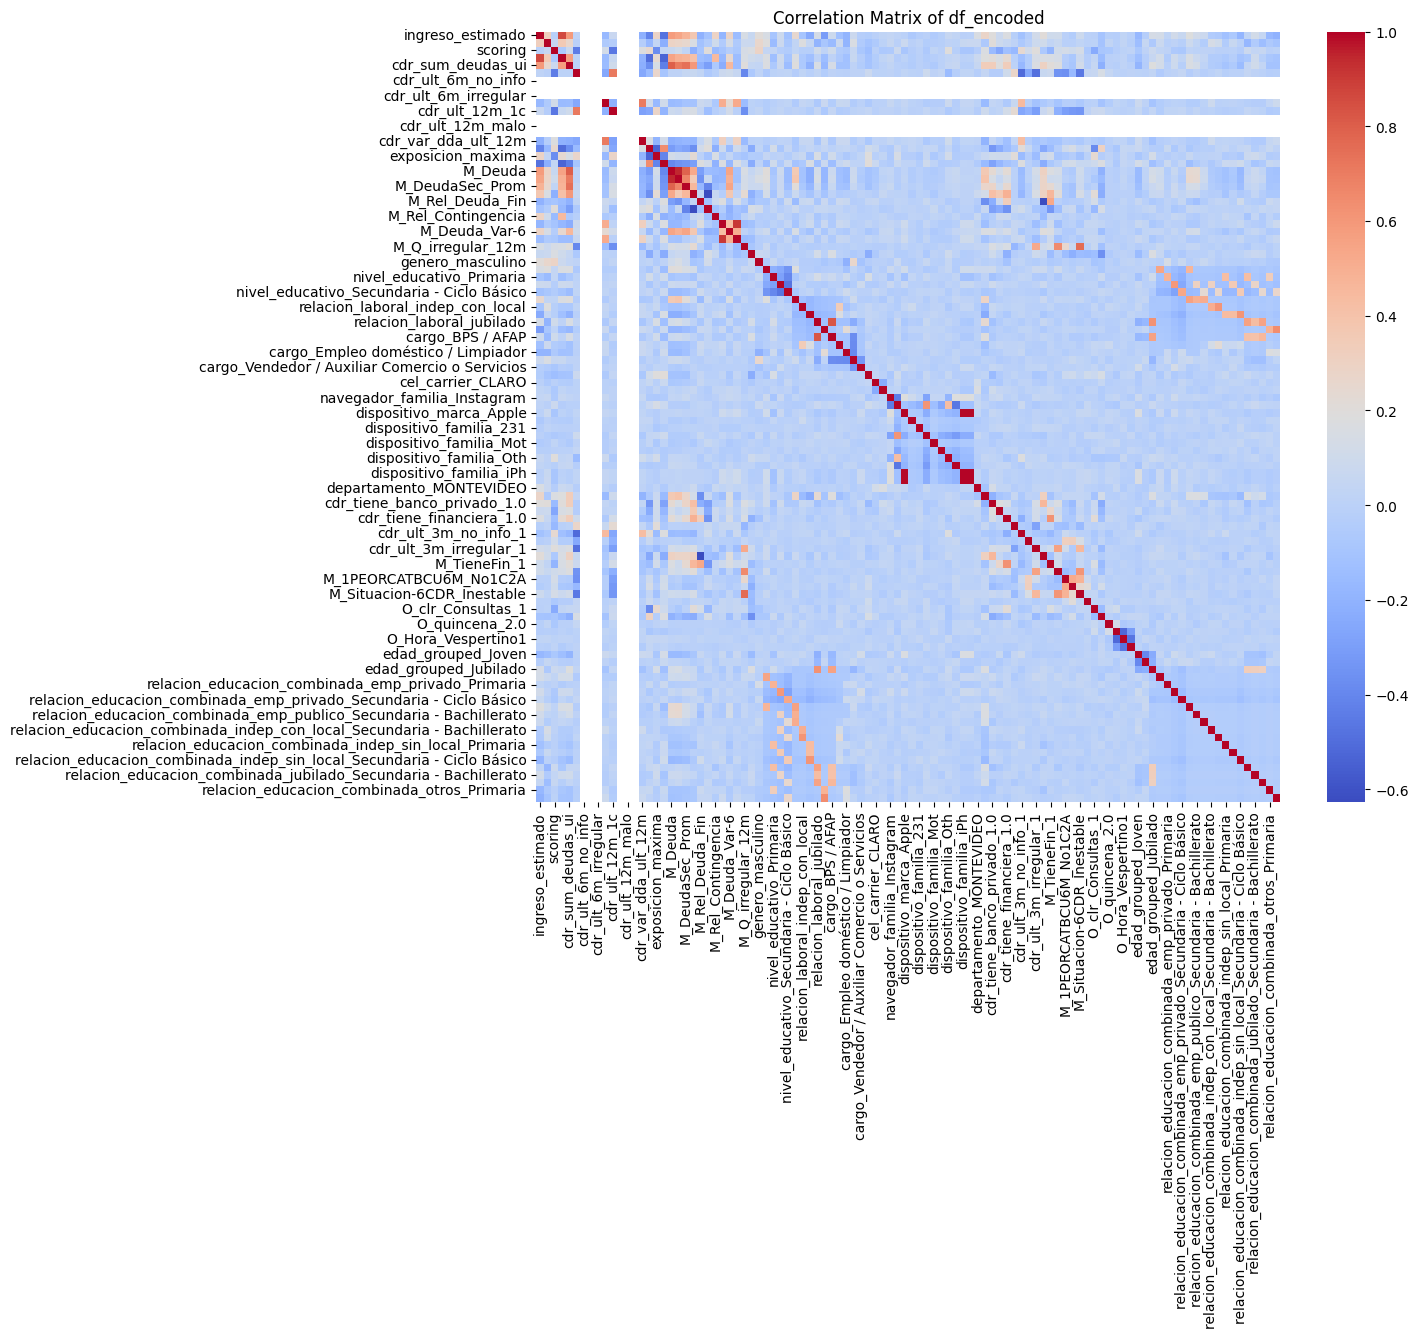

In [375]:
# Chequear las variables más correlacionadas del df_encoded y mostrar

# Calculate the correlation matrix for the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Display the correlation matrix (optional, can be large)
# print("\nCorrelation Matrix:")
# display(correlation_matrix)

# Find the absolute value of the correlation matrix to identify strong relationships regardless of direction
abs_correlation_matrix = correlation_matrix.abs()

# Stack the absolute correlation matrix and reset index to get a DataFrame of pairs
stacked_corr = abs_correlation_matrix.stack().reset_index()

# Rename columns
stacked_corr.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Remove self-correlations (where Variable_1 is the same as Variable_2)
stacked_corr = stacked_corr[stacked_corr['Variable_1'] != stacked_corr['Variable_2']]

# Sort by absolute correlation in descending order
most_correlated_pairs = stacked_corr.sort_values(by='Correlation', ascending=False)

# Display the top N most correlated pairs (adjust N as needed)
N = 20
print(f"\nTop {N} most correlated variable pairs in df_encoded:")
display(most_correlated_pairs.head(N))

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of df_encoded')
plt.show()


In [376]:
# Quitar las variables más correlacionadas, las que superen el 70%, mostrar cuales son y luego elimiar del dataset

# Find highly correlated pairs above the threshold (70%)
threshold = 0.70
high_corr_pairs = most_correlated_pairs[most_correlated_pairs['Correlation'] > threshold]

# Print the highly correlated pairs
print(f"\nVariables with correlation greater than {threshold * 100}%:")
display(high_corr_pairs)

# Identify variables to drop based on high correlation
# This is a common strategy: keep one variable from each highly correlated pair.
# A more advanced approach might consider Variance Inflation Factor (VIF) or domain knowledge.
# For simplicity here, we'll drop one variable from each pair.
# We'll use a set to keep track of variables already marked for dropping to avoid dropping both from a pair.

variables_to_drop_corr = set()

for index, row in high_corr_pairs.iterrows():
    var1 = row['Variable_1']
    var2 = row['Variable_2']

    # Decide which variable to drop. A simple approach is to drop one arbitrarily.
    # You might choose based on domain knowledge, completeness, or VIF.
    # Here, we'll drop the second variable in the pair if neither has been marked for dropping yet.
    if var1 not in variables_to_drop_corr and var2 not in variables_to_drop_corr:
        variables_to_drop_corr.add(var2)
        print(f"Marked '{var2}' for dropping due to high correlation with '{var1}' ({row['Correlation']:.2f})")

# Convert the set to a list
variables_to_drop_corr_list = list(variables_to_drop_corr)

# Print the list of variables to be dropped
print("\nList of variables to be dropped due to high correlation:")
print(variables_to_drop_corr_list)

# Drop the identified variables from the DataFrame
df_encoded_dropped_corr = df_encoded.drop(columns=variables_to_drop_corr_list, errors='ignore')

print(f"\nShape of the DataFrame before dropping highly correlated variables: {df_encoded.shape}")
print(f"Shape of the DataFrame after dropping highly correlated variables: {df_encoded_dropped_corr.shape}")

print("\nColumns remaining after dropping highly correlated variables:")
print(df_encoded_dropped_corr.columns.tolist())


Variables with correlation greater than 70.0%:


,Variable_1,Variable_2,Correlation
5045,dispositivo_familia_iPh,sist_op_familia_iOS,1.00
5140,sist_op_familia_iOS,dispositivo_familia_iPh,1.00
5132,sist_op_familia_iOS,dispositivo_marca_Apple,0.99
4277,dispositivo_marca_Apple,sist_op_familia_iOS,0.99
5036,dispositivo_familia_iPh,dispositivo_marca_Apple,0.99
4276,dispositivo_marca_Apple,dispositivo_familia_iPh,0.99
1165,M_Deuda,M_DeudaPrincipal,0.94
1260,M_DeudaPrincipal,M_Deuda,0.94
1845,M_Var_dueda_6M,M_Rel_VarDeuda_Deuda,0.91
2035,M_Rel_VarDeuda_Deuda,M_Var_dueda_6M,0.91


Marked 'sist_op_familia_iOS' for dropping due to high correlation with 'dispositivo_familia_iPh' (1.00)
Marked 'dispositivo_marca_Apple' for dropping due to high correlation with 'dispositivo_familia_iPh' (0.99)
Marked 'M_DeudaPrincipal' for dropping due to high correlation with 'M_Deuda' (0.94)
Marked 'M_Rel_VarDeuda_Deuda' for dropping due to high correlation with 'M_Var_dueda_6M' (0.91)
Marked 'ingreso_estimado' for dropping due to high correlation with 'cdr_max_contingencia_ui' (0.86)
Marked 'cargo_BPS / AFAP' for dropping due to high correlation with 'relacion_laboral_jubilado' (0.83)
Marked 'cdr_sum_deudas_ui' for dropping due to high correlation with 'M_Deuda' (0.80)
Marked 'M_Deuda' for dropping due to high correlation with 'M_DeudaSec_Prom' (0.79)
Marked 'M_Situacion-6CDR_Inestable' for dropping due to high correlation with 'M_Q_irregular_12m' (0.75)
Marked 'cdr_ult_12m_1c' for dropping due to high correlation with 'cdr_ult_6m_1c' (0.71)
Marked 'cdr_var_dda_ult_6m' for droppin

---
---
---

##ÁRBOL DE DECISIÓN

In [398]:
df_encoded_dropped_corr.sample()

,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Q_irregular_12m,O_clr_Score3,genero_masculino,nivel_educativo_Educación Terciaria,nivel_educativo_Primaria,nivel_educativo_Secundaria - Bachillerato,nivel_educativo_Secundaria - Ciclo Básico,relacion_laboral_emp_publico,relacion_laboral_indep_con_local,relacion_laboral_indep_sin_local,relacion_laboral_jubilado,relacion_laboral_otros,cargo_Comerciante,cargo_Empleo doméstico / Limpiador,cargo_Otros,cargo_Vendedor / Auxiliar Comercio o Servicios,tiene_tel_fijo_1.0,cel_carrier_CLARO,cel_carrier_MOVISTAR,navegador_familia_Instagram,navegador_familia_Web,dispositivo_familia_230,dispositivo_familia_231,dispositivo_familia_K,dispositivo_familia_Mot,dispositivo_familia_NUM,dispositivo_familia_Oth,dispositivo_familia_Sam,dispositivo_familia_iPh,departamento_MONTEVIDEO,cdr_tiene_brou_1.0,cdr_tiene_banco_privado_1.0,cdr_tiene_oca_1.0,cdr_tiene_financiera_1.0,cdr_ult_3m_1c_1,cdr_ult_3m_no_info_1,cdr_ult_3m_malo_1,cdr_ult_3m_irregular_1,M_TieneBco_1,M_TieneFin_1,M_1PEORCATBCU6M_2A,M_1PEORCATBCU6M_No1C2A,M_Malos_1,O_clr_Cancelaciones_1.0,O_clr_Consultas_1,O_clr_Incumplimientos_1.0,O_quincena_2.0,O_Hora_Nocturno,O_Hora_Vespertino1,O_Hora_Vespertino2,edad_grouped_Joven,edad_grouped_Joven2,edad_grouped_Jubilado,relacion_educacion_combinada_emp_privado_Educación Terciaria,relacion_educacion_combinada_emp_privado_Primaria,relacion_educacion_combinada_emp_privado_Secundaria - Bachillerato,relacion_educacion_combinada_emp_privado_Secundaria - Ciclo Básico,relacion_educacion_combinada_emp_publico_Educación Terciaria,relacion_educacion_combinada_emp_publico_Secundaria - Bachillerato,relacion_educacion_combinada_emp_publico_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_con_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_con_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_sin_local_Primaria,relacion_educacion_combinada_indep_sin_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_sin_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_jubilado_Primaria,relacion_educacion_combinada_jubilado_Secundaria - Bachillerato,relacion_educacion_combinada_jubilado_Secundaria - Ciclo Básico,relacion_educacion_combinada_otros_Primaria,relacion_educacion_combinada_otros_Secundaria - Ciclo Básico,target
1503,-0.92,1.27,-0.82,-0.62,0.00,0.00,0.00,0.00,0.00,0.00,-0.75,0.88,-1.60,-0.13,-0.73,-0.74,-0.06,-0.33,2.21,0.26,-0.66,1.50,-0.39,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1


In [377]:
df_encoded_dropped_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 91 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ingreso_declarado                                                       1982 non-null   float64
 1   scoring                                                                 1982 non-null   float64
 2   cdr_max_contingencia_ui                                                 1982 non-null   float64
 3   cdr_ult_6m_1c                                                           1982 non-null   float64
 4   cdr_ult_6m_no_info                                                      1982 non-null   float64
 5   cdr_ult_6m_malo                                                         1982 non-null   float64
 6   cdr_ult_6m_irregular                                                    1982 non

In [380]:
# prompt: anexar a df_encoded_dropped_corr, target

df_encoded_dropped_corr['target'] = target

print("\nShape of the DataFrame after appending the 'target' column:")
print(df_encoded_dropped_corr.shape)

print("\nFirst 5 rows of the DataFrame with the 'target' column:")
display(df_encoded_dropped_corr.head())

print("\nInfo about the DataFrame after appending 'target':")
df_encoded_dropped_corr.info()


Shape of the DataFrame after appending the 'target' column:
(1982, 92)

First 5 rows of the DataFrame with the 'target' column:


,ingreso_declarado,scoring,cdr_max_contingencia_ui,cdr_ult_6m_1c,cdr_ult_6m_no_info,cdr_ult_6m_malo,cdr_ult_6m_irregular,cdr_ult_12m_no_info,cdr_ult_12m_malo,cdr_ult_12m_irregular,cdr_var_dda_ult_12m,cdr_segmento,exposicion_maxima,mejor_esquema_pricing,M_DeudaSec_Prom,M_Entidades,M_Rel_Deuda_Fin,M_Rel_DeudaPrincipal,M_Rel_Contingencia,M_Var_dueda_6M,M_Deuda_Var-6,M_Q_irregular_12m,O_clr_Score3,genero_masculino,nivel_educativo_Educación Terciaria,nivel_educativo_Primaria,nivel_educativo_Secundaria - Bachillerato,nivel_educativo_Secundaria - Ciclo Básico,relacion_laboral_emp_publico,relacion_laboral_indep_con_local,relacion_laboral_indep_sin_local,relacion_laboral_jubilado,relacion_laboral_otros,cargo_Comerciante,cargo_Empleo doméstico / Limpiador,cargo_Otros,cargo_Vendedor / Auxiliar Comercio o Servicios,tiene_tel_fijo_1.0,cel_carrier_CLARO,cel_carrier_MOVISTAR,navegador_familia_Instagram,navegador_familia_Web,dispositivo_familia_230,dispositivo_familia_231,dispositivo_familia_K,dispositivo_familia_Mot,dispositivo_familia_NUM,dispositivo_familia_Oth,dispositivo_familia_Sam,dispositivo_familia_iPh,departamento_MONTEVIDEO,cdr_tiene_brou_1.0,cdr_tiene_banco_privado_1.0,cdr_tiene_oca_1.0,cdr_tiene_financiera_1.0,cdr_ult_3m_1c_1,cdr_ult_3m_no_info_1,cdr_ult_3m_malo_1,cdr_ult_3m_irregular_1,M_TieneBco_1,M_TieneFin_1,M_1PEORCATBCU6M_2A,M_1PEORCATBCU6M_No1C2A,M_Malos_1,O_clr_Cancelaciones_1.0,O_clr_Consultas_1,O_clr_Incumplimientos_1.0,O_quincena_2.0,O_Hora_Nocturno,O_Hora_Vespertino1,O_Hora_Vespertino2,edad_grouped_Joven,edad_grouped_Joven2,edad_grouped_Jubilado,relacion_educacion_combinada_emp_privado_Educación Terciaria,relacion_educacion_combinada_emp_privado_Primaria,relacion_educacion_combinada_emp_privado_Secundaria - Bachillerato,relacion_educacion_combinada_emp_privado_Secundaria - Ciclo Básico,relacion_educacion_combinada_emp_publico_Educación Terciaria,relacion_educacion_combinada_emp_publico_Secundaria - Bachillerato,relacion_educacion_combinada_emp_publico_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_con_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_con_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_indep_sin_local_Primaria,relacion_educacion_combinada_indep_sin_local_Secundaria - Bachillerato,relacion_educacion_combinada_indep_sin_local_Secundaria - Ciclo Básico,relacion_educacion_combinada_jubilado_Primaria,relacion_educacion_combinada_jubilado_Secundaria - Bachillerato,relacion_educacion_combinada_jubilado_Secundaria - Ciclo Básico,relacion_educacion_combinada_otros_Primaria,relacion_educacion_combinada_otros_Secundaria - Ciclo Básico,target
0,-0.92,-1.01,-0.65,0.55,0.00,0.00,0.00,0.00,0.00,0.00,-0.47,0.62,-0.02,2.55,-0.56,2.85,0.10,-1.26,0.02,-0.46,-0.26,-0.67,-2.08,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
1,1.25,0.06,0.29,0.55,0.00,0.00,0.00,0.00,0.00,0.00,-0.47,0.75,-1.97,2.55,1.74,2.85,-0.35,-0.50,-0.50,-0.45,2.31,1.50,-2.01,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,True,True,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
2,-0.38,-1.01,-0.59,0.55,0.00,0.00,0.00,0.00,0.00,0.00,-0.47,0.62,-0.02,2.55,-0.39,-0.74,0.67,0.11,-0.36,0.15,-0.44,-0.67,0.07,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,True,Fa


Info about the DataFrame after appending 'target':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 92 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   ingreso_declarado                                                       1982 non-null   float64 
 1   scoring                                                                 1982 non-null   float64 
 2   cdr_max_contingencia_ui                                                 1982 non-null   float64 
 3   cdr_ult_6m_1c                                                           1982 non-null   float64 
 4   cdr_ult_6m_no_info                                                      1982 non-null   float64 
 5   cdr_ult_6m_malo                                                         1982 non-null   float64 
 6   cdr_ult_6m_irregular

In [382]:
from sklearn.model_selection import train_test_split

X = df_encoded_dropped_corr.drop(columns=['target'])
y = df_encoded_dropped_corr['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1585, 91)
Shape of X_test: (397, 91)
Shape of y_train: (1585,)
Shape of y_test: (397,)


In [388]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier with default parameters
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [389]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([1156,  429]))

In [394]:
# Segmentar los datos en conjuntos de entrenamiento y prueba
# X serán las características (todas las columnas del DataFrame codificado)
# y será la variable objetivo (la columna 'fpd' que separamos anteriormente)
X = df_encoded
y = target # Usamos la variable 'target' que ya contiene 'fpd'

# Dividir los datos. Un 80% para entrenamiento y un 20% para prueba es una división común.
# stratify=y se usa para asegurar que la proporción de la variable objetivo ('fpd')
# sea la misma en los conjuntos de entrenamiento y prueba que en el DataFrame original.
# random_state se usa para asegurar que la división sea la misma cada vez que se ejecuta el código.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Datos segmentados para evaluación del modelo:")
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

# Mostrar la distribución de la variable objetivo en los conjuntos de entrenamiento y prueba
print("\nDistribución de 'fpd' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de 'fpd' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Datos segmentados para evaluación del modelo:
Dimensiones de X_train: (1585, 102)
Dimensiones de X_test: (397, 102)
Dimensiones de y_train: (1585,)
Dimensiones de y_test: (397,)

Distribución de 'fpd' en el conjunto de entrenamiento:
fpd
0   0.73
1   0.27
Name: proportion, dtype: float64

Distribución de 'fpd' en el conjunto de prueba:
fpd
0   0.73
1   0.27
Name: proportion, dtype: float64


Modelo DecisionTreeClassifier entrenado con todos los datos preprocesados.

Reporte de Clasificación en el conjunto de prueba (Modelo con todos los datos):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       290
           1       0.46      0.46      0.46       107

    accuracy                           0.71       397
   macro avg       0.63      0.63      0.63       397
weighted avg       0.71      0.71      0.71       397

cv_scores.shape =  (7,)
F-scores for each fold: [0.38938053 0.48       0.42105263 0.42016807 0.38655462 0.47058824
 0.45528455]
Mean F-score: 0.431861234252525
Standard deviation of F-scores: 0.0347986628575445

Matriz de Confusión en el conjunto de prueba (Modelo con todos los datos):


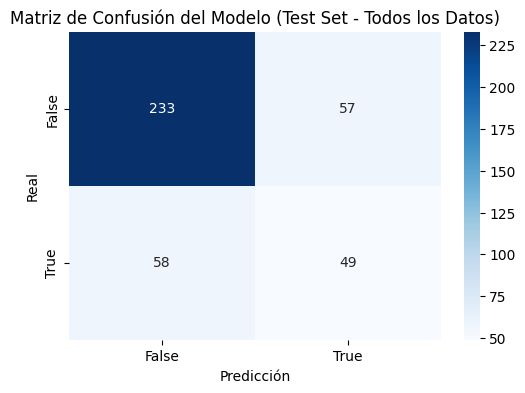


Importancia de las características en el modelo entrenado:
                                  Característica  Importancia
27                          M_Rel_VarDeuda_Deuda         0.09
64                      cdr_tiene_financiera_1.0         0.07
24                            M_Rel_Contingencia         0.06
62                   cdr_tiene_banco_privado_1.0         0.04
4                              cdr_sum_deudas_ui         0.04
15                                  cdr_segmento         0.04
29                                  O_clr_Score3         0.04
0                               ingreso_estimado         0.04
23                          M_Rel_DeudaPrincipal         0.03
26                                 M_Deuda_Var-6         0.03
16                             exposicion_maxima         0.03
19                              M_DeudaPrincipal         0.02
3                        cdr_max_contingencia_ui         0.02
22                               M_Rel_Deuda_Fin         0.02
10        

/tmp/ipython-input-397-1284883958.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=feature_importance_df_full.head(20), palette='viridis')


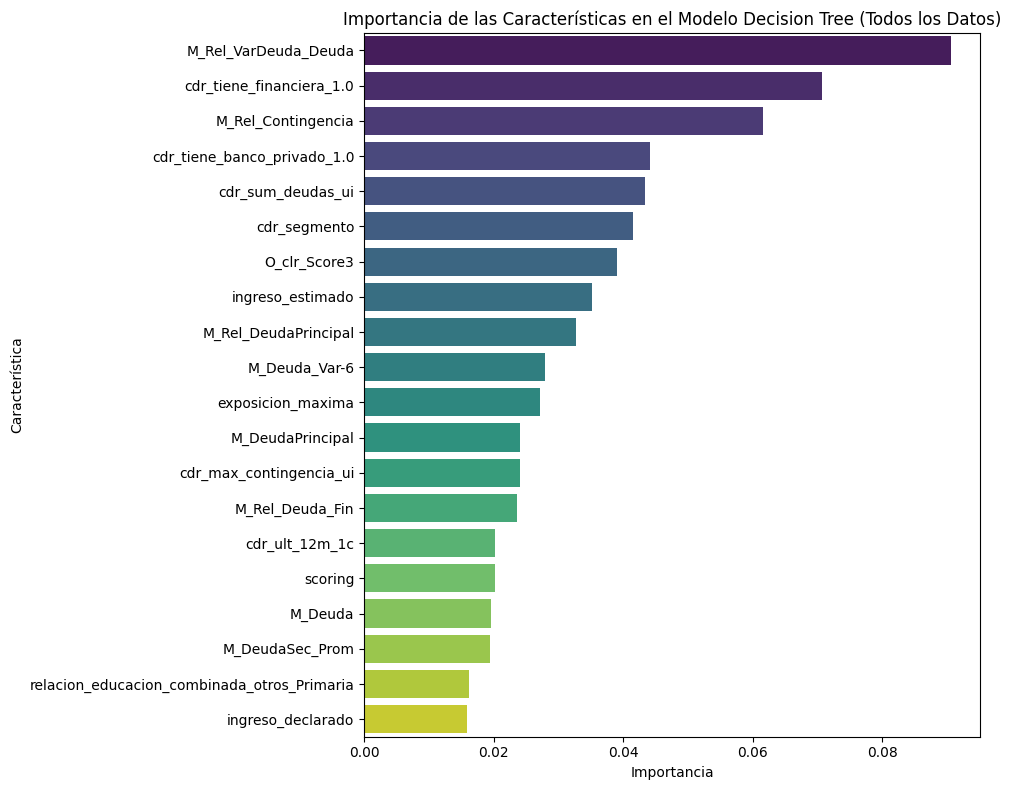

In [397]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
# Entrenar los datos de la celda anterior en  un modelo de DecisionTreeClassifier

# Entrenar un modelo DecisionTreeClassifier con los datos preprocesados

# Inicializar y entrenar el modelo de Decision Tree Classifier
# Puedes ajustar los hiperparámetros como criterion, max_depth, min_samples_split, etc.
# Aquí usamos parámetros por defecto para empezar.
model_full_data = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento completo (X_train, y_train)
model_full_data.fit(X_train, y_train)

print("Modelo DecisionTreeClassifier entrenado con todos los datos preprocesados.")

# Evaluación del modelo en el conjunto de prueba
y_pred_full_data = model_full_data.predict(X_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación en el conjunto de prueba (Modelo con todos los datos):")
print(classification_report(y_test, y_pred_full_data))

cv_scores = cross_val_score(model, X_train, y_train, cv=7, scoring="f1")

print("cv_scores.shape = ", cv_scores.shape)
print("F-scores for each fold:", cv_scores)
print("Mean F-score:", cv_scores.mean())
print("Standard deviation of F-scores:", cv_scores.std())

# Mostrar la matriz de confusión
print("\nMatriz de Confusión en el conjunto de prueba (Modelo con todos los datos):")
cm_full_data = confusion_matrix(y_test, y_pred_full_data)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_full_data, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Modelo (Test Set - Todos los Datos)')
plt.show()

# Opcional: Visualizar la importancia de las características
print("\nImportancia de las características en el modelo entrenado:")
feature_importances_full = model_full_data.feature_importances_

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df_full = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': feature_importances_full
})

# Ordenar por importancia descendente
feature_importance_df_full = feature_importance_df_full.sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df_full.head(20)) # Muestra las 20 características más importantes

# Visualizar la importancia de las características (las 20 principales)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df_full.head(20), palette='viridis')
plt.title('Importancia de las Características en el Modelo Decision Tree (Todos los Datos)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

Número de componentes principales necesarios para captar > 95% de la varianza: 48


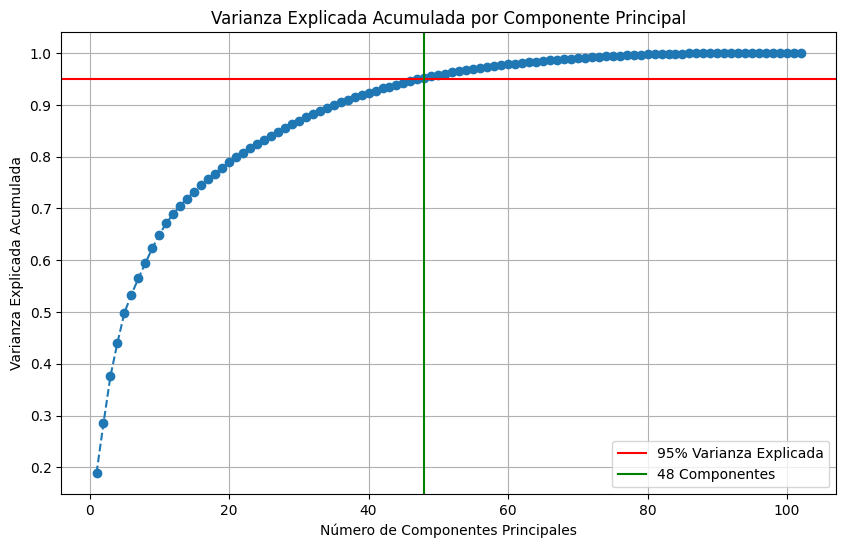


Varianza explicada por los primeros 48 componentes:
[0.18850617 0.0961606  0.091511   0.06417777 0.05806186 0.03515462
 0.03120676 0.02967271 0.02863527 0.02617553 0.02213792 0.01804768
 0.01605413 0.01373063 0.01314473 0.01221438 0.01155173 0.0114025
 0.01084449 0.01054212 0.01000151 0.00907787 0.00867192 0.00833065
 0.00794052 0.00778398 0.00760151 0.00722836 0.00714487 0.00687932
 0.00653709 0.00638469 0.00630224 0.00577328 0.00538433 0.0050466
 0.00495964 0.00468193 0.00453623 0.00431033 0.00426676 0.00408557
 0.00383934 0.00362754 0.00353393 0.00324987 0.00315722 0.00308762]

Varianza acumulada explicada por los primeros 48 componentes:


np.float64(0.9523573387232834)

In [399]:
# prompt: Cuantos componenes me quedan en el modelo anterior, si aplico un PCA con el objetivo de captar > del 95% de la varianza?

from sklearn.decomposition import PCA

# Assuming df_encoded is your preprocessed DataFrame after scaling and encoding
# X is already defined as df_encoded

# Initialize PCA
# We don't specify n_components initially to analyze the explained variance
pca = PCA()

# Fit PCA to the scaled and encoded training data (X_train)
# It's crucial to fit PCA only on the training data to avoid data leakage
pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain > 95% of variance
# We use np.argmax which returns the index of the first True value
# Adding 1 because indices are 0-based, and we want the count of components
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Número de componentes principales necesarios para captar > 95% de la varianza: {n_components_95}")

# Optional: Plot the explained variance ratio to visualize
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza Explicada')
plt.axvline(x=n_components_95, color='g', linestyle='-', label=f'{n_components_95} Componentes')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Display the explained variance for the required number of components
print(f"\nVarianza explicada por los primeros {n_components_95} componentes:")
print(pca.explained_variance_ratio_[:n_components_95])
print(f"\nVarianza acumulada explicada por los primeros {n_components_95} componentes:")
cumulative_variance_ratio[n_components_95 - 1]


In [400]:
# After scaling is applied to df_encoded (which is used for X_train)
# Select numerical columns after scaling
numeric_cols_scaled = X_train.select_dtypes(include=np.number).columns.tolist()

# Calculate variance for each numerical column
variances_after_scaling = X_train[numeric_cols_scaled].var().sort_values(ascending=False)

print("\nVarianza de las características numéricas después del escalado:")
print(variances_after_scaling.head(20)) # Display top 20 variances



Varianza de las características numéricas después del escalado:
O_clr_Score3              1.04
scoring                   1.01
exposicion_maxima         1.01
M_DeudaPrincipal          1.01
M_Var_dueda_6M            1.01
M_Rel_VarDeuda_Deuda      1.01
M_Deuda                   1.01
M_DeudaSec_Prom           1.01
mejor_esquema_pricing     1.01
M_Deuda_Var-6             1.01
M_Rel_Deuda_Fin           1.00
cdr_ult_6m_1c             1.00
cdr_var_dda_ult_6m        1.00
cdr_var_dda_ult_12m       1.00
cdr_ult_12m_1c            1.00
M_Rel_Contingencia        1.00
M_Rel_DeudaPrincipal      1.00
M_Q_irregular_12m         0.99
ingreso_declarado         0.99
cdr_max_contingencia_ui   0.99
dtype: float64


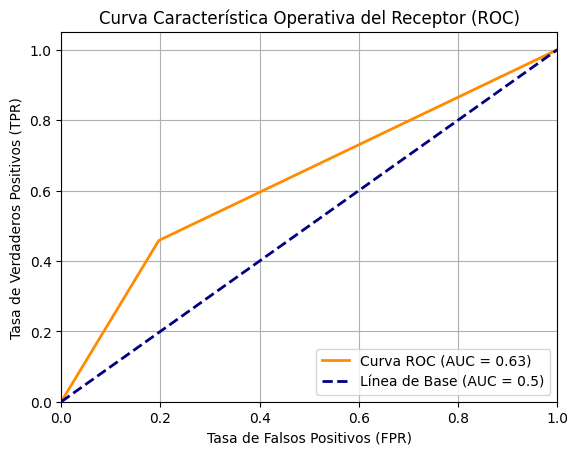


Área Bajo la Curva (AUC): 0.63


In [401]:
#Curva roc al modelo

from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva (clase 1)
# El método predict_proba devuelve las probabilidades para cada clase.
# Queremos la probabilidad de la clase 1 (el segundo elemento del array).
y_pred_proba = model_full_data.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el área bajo la curva (AUC)
# fpr: False Positive Rate
# tpr: True Positive Rate
# thresholds: Umbrales utilizados para calcular fpr y tpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de Base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nÁrea Bajo la Curva (AUC): {roc_auc:.2f}")

In [403]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions to sample from
param_distributions = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],  # Integer values from 2 to 15
    'min_samples_split': randint(low=2, high=30), # Integer values from 2 to 29
    'min_samples_leaf': randint(low=1, high=21) # Integer values from 1 to 20
}

# Define the number of iterations for the random search
n_iter_search = 12  # Number of parameter settings that are sampled.

print("Number of trees to fit:", n_iter_search * 7)

# Define the base model
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=tree,
                                   param_distributions=param_distributions,
                                   n_iter=n_iter_search,
                                   cv=7,  # Use 7-fold cross-validation
                                   scoring='f1', # Score using f1
                                   random_state=42, # For reproducibility
                                   n_jobs=-1) # Use all available cores

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation F1 score: {:.4f} ± {:.4f}".format(random_search.best_score_, random_search.cv_results_['std_test_score'][random_search.best_index_]))

Number of trees to fit: 84
Best parameters found: {'max_depth': 13, 'min_samples_leaf': 6, 'min_samples_split': 3}
Best cross-validation F1 score: 0.4595 ± 0.0469


Entrenando el modelo final con los mejores parámetros...
Modelo final entrenado.

Reporte de Clasificación en el conjunto de prueba (Modelo con mejores parámetros):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       290
           1       0.46      0.43      0.44       107

    accuracy                           0.71       397
   macro avg       0.63      0.62      0.62       397
weighted avg       0.70      0.71      0.71       397


Matriz de Confusión en el conjunto de prueba (Modelo con mejores parámetros):


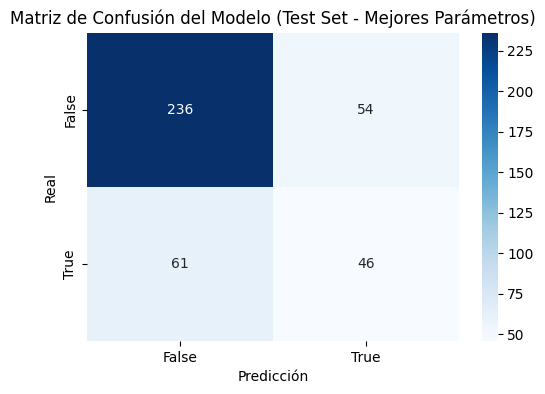

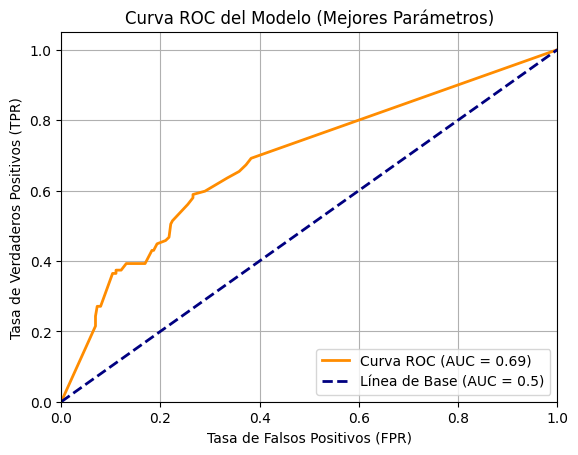


Área Bajo la Curva (AUC) del Modelo con mejores parámetros: 0.69

Importancia de las características en el modelo entrenado (Mejores Parámetros):
                 Característica  Importancia
64     cdr_tiene_financiera_1.0         0.09
15                 cdr_segmento         0.08
27         M_Rel_VarDeuda_Deuda         0.07
4             cdr_sum_deudas_ui         0.06
29                 O_clr_Score3         0.06
22              M_Rel_Deuda_Fin         0.05
25               M_Var_dueda_6M         0.04
19             M_DeudaPrincipal         0.04
24           M_Rel_Contingencia         0.04
62  cdr_tiene_banco_privado_1.0         0.04
16            exposicion_maxima         0.03
30             genero_masculino         0.03
14          cdr_var_dda_ult_12m         0.03
0              ingreso_estimado         0.03
1             ingreso_declarado         0.03
23         M_Rel_DeudaPrincipal         0.03
20              M_DeudaSec_Prom         0.03
21                  M_Entidades         0.0

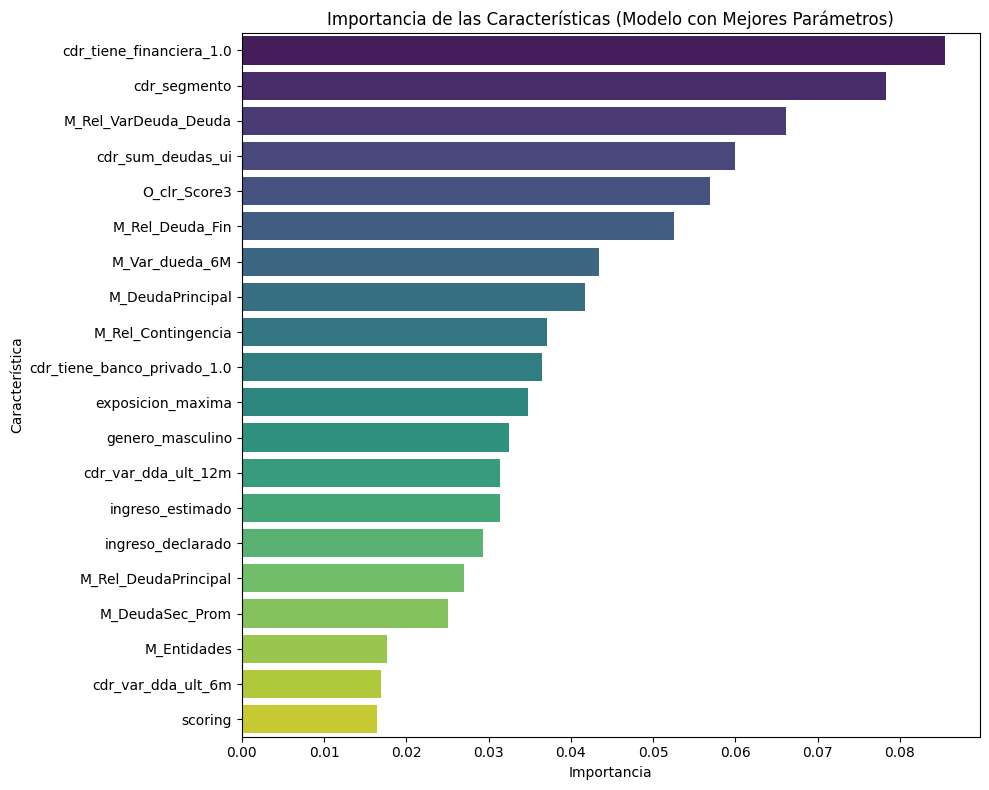

In [404]:
# Corremos el modelo con los mejores parametros del random search

# Entrenar el modelo con los mejores parámetros encontrados por RandomizedSearchCV

# Obtener los mejores parámetros del objeto random_search
best_params = random_search.best_params_

# Inicializar un nuevo modelo Decision Tree Classifier con los mejores parámetros
best_model = DecisionTreeClassifier(criterion="entropy", random_state=0, **best_params)

# Entrenar el modelo con los mejores parámetros en el conjunto de entrenamiento completo
print("Entrenando el modelo final con los mejores parámetros...")
best_model.fit(X_train, y_train)
print("Modelo final entrenado.")

# Evaluar el modelo entrenado en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Mostrar el reporte de clasificación para el modelo con mejores parámetros
print("\nReporte de Clasificación en el conjunto de prueba (Modelo con mejores parámetros):")
print(classification_report(y_test, y_pred_best))

# Mostrar la matriz de confusión para el modelo con mejores parámetros
print("\nMatriz de Confusión en el conjunto de prueba (Modelo con mejores parámetros):")
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Modelo (Test Set - Mejores Parámetros)')
plt.show()

# Calcular y graficar la curva ROC y el AUC para el modelo con mejores parámetros
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea de Base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo (Mejores Parámetros)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nÁrea Bajo la Curva (AUC) del Modelo con mejores parámetros: {roc_auc_best:.2f}")

# Opcional: Mostrar la importancia de las características para el modelo con mejores parámetros
print("\nImportancia de las características en el modelo entrenado (Mejores Parámetros):")
feature_importances_best = best_model.feature_importances_

feature_importance_df_best = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': feature_importances_best
})

feature_importance_df_best = feature_importance_df_best.sort_values(by='Importancia', ascending=False)

print(feature_importance_df_best.head(20))

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df_best.head(20), palette='viridis')
plt.title('Importancia de las Características (Modelo con Mejores Parámetros)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


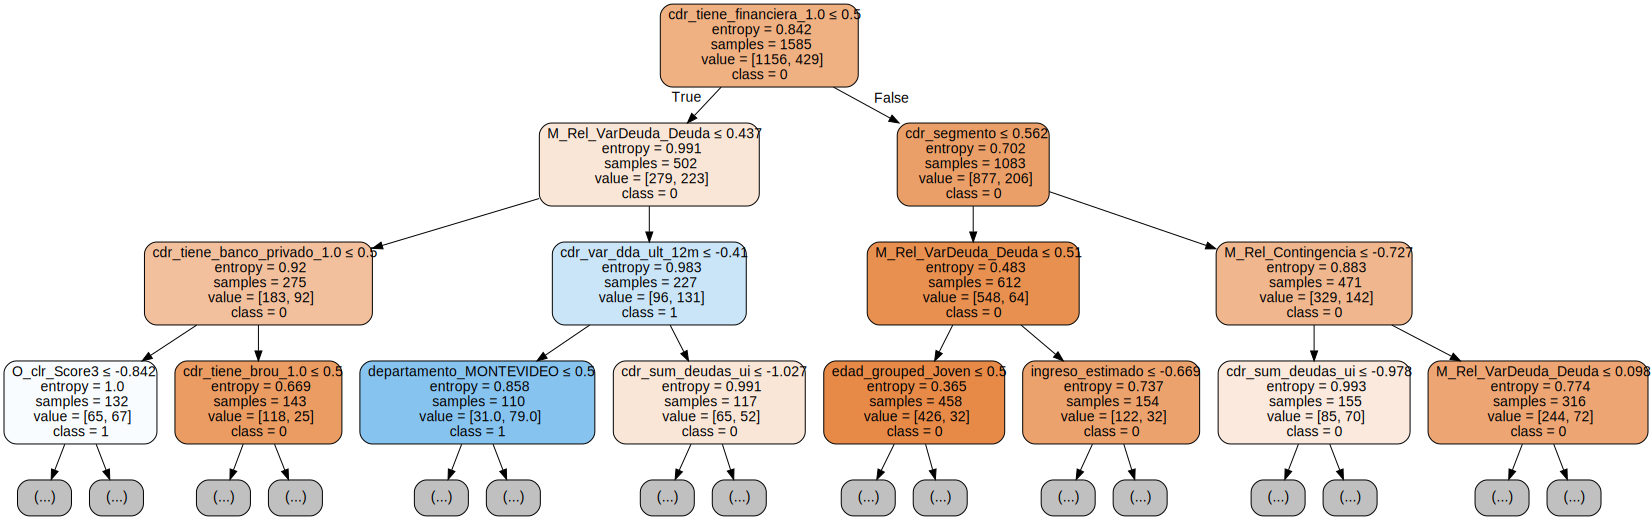

Visualización del árbol de decisión final (limitado a profundidad 3) generada.


In [405]:
# Vemos el árbol con mejores parametros, limitado a 3 de profundidad

!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format file
# You can adjust max_depth to limit the size of the visualization
dot_data = export_graphviz(best_model,
                           out_file=None,
                           feature_names=X_train.columns.tolist(),
                           class_names=[str(c) for c in best_model.classes_],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           proportion=False, # Set to True to show proportions instead of counts
                           impurity=True, # Set to False to hide impurity
                           max_depth=3) # Limit depth for better visualization

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph in the notebook
display(graph)

# Optionally, save the graph to a file (e.g., PDF or PNG)
# graph.render("decision_tree", view=True, format='png') # Saves as decision_tree.png and opens it

print("Visualización del árbol de decisión final (limitado a profundidad 3) generada.")
